<a href="https://colab.research.google.com/github/hkna00000/Apartment-RentingPrice-Predict/blob/main/IE224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/IE224/Housing Dataset.xlsx")
df

Diện tích  Số phòng ngủ  Số tầng                Tên dự án    Tên phường  \
0           94             2      NaN    Empire City Thủ Thiêm     Thủ Thiêm   
1           86             2      NaN    Empire City Thủ Thiêm     Thủ Thiêm   
2          130             3      NaN  The Metropole Thủ Thiêm     Thủ Thiêm   
3          130             3      NaN    Empire City Thủ Thiêm     Thủ Thiêm   
4          127             3     18.0    Empire City Thủ Thiêm     Thủ Thiêm   
..         ...           ...      ...                      ...           ...   
669         58             1      NaN                      NaN  Thạnh Mỹ Lợi   
670         25             1      NaN                      NaN  Thạnh Mỹ Lợi   
671         25             1      3.0                      NaN  Thạnh Mỹ Lợi   
672        202             4      NaN              Vista Verde  Thạnh Mỹ Lợi   
673         30             1      NaN                      NaN  Thạnh Mỹ Lợi   

    Tình trạng nội thất  Số phòng vệ sinh      Loại hình căn hộ  Ban công  \
0                Đầy Đủ                 2              Chung Cư      True   
1                Đầy Đủ                 2              Chung Cư      True   
2                Đầy Đủ                 2              Chung Cư      True   
3                Đầy Đủ                 2              Chung Cư      True   
4                Đầy Đủ                 2              Chung Cư      True   
..                  ...               ...                   ...       ...   
669              Đầy Đủ                 1              Chung Cư     False   
670              Đầy Đủ                 1  Căn Hộ Dịch Vụ, Mini      True   
671              Đầy Đủ                 1  Căn Hộ Dịch Vụ, Mini     False   
672             Chưa Có                 3              Chung Cư      True   
673              Đầy Đủ                 1                Duplex      True   

     Khu mua sắm  Trường học  Bệnh viện  Số ảnh  Giá cho thuê  
0           True       False      False       8      40000000  
1           True       False      False      12      38000000  
2           True       False      False      12      70000000  
3           True       False      False      10      44000000  
4           True       False      False       5      50000000  
..           ...         ...        ...     ...           ...  
669        False        True      False       9      14500000  
670         True        True       True       5       5000000  
671        False        True      False       5       4300000  
672         True        True      False       8      43000000  
673        False        True      False       6       7000000  

[674 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Diện tích            674 non-null    int64  
 1   Số phòng ngủ         674 non-null    int64  
 2   Số tầng              94 non-null     float64
 3   Tên dự án            498 non-null    object 
 4   Tên phường           674 non-null    object 
 5   Tình trạng nội thất  674 non-null    object 
 6   Số phòng vệ sinh     674 non-null    int64  
 7   Loại hình căn hộ     674 non-null    object 
 8   Ban công             674 non-null    bool   
 9   Khu mua sắm          674 non-null    bool   
 10  Trường học           674 non-null    bool   
 11  Bệnh viện            674 non-null    bool   
 12  Số ảnh               674 non-null    int64  
 13  Giá cho thuê         674 non-null    int64  
dtypes: bool(4), float64(1), int64(5), object(4)
memory usage: 55.4+ KB


## Xử lý missing data

<Axes: >

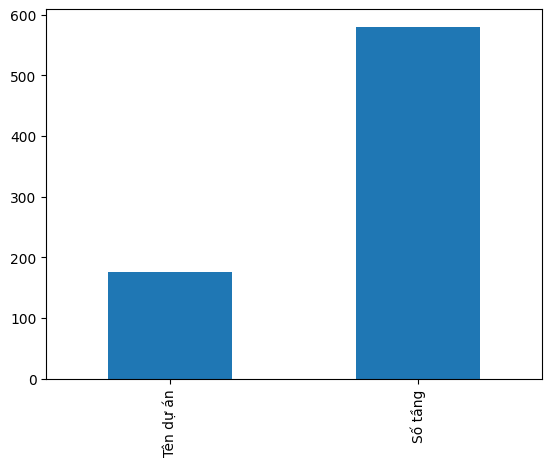

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

#### Cột số tầng

In [ ]:
df_no_nan = df.dropna(subset=['Số tầng'])
df_no_nan

Diện tích  Số phòng ngủ  Số tầng              Tên dự án    Tên phường  \
4          127             3     18.0  Empire City Thủ Thiêm     Thủ Thiêm   
10          64             1      5.0  Empire City Thủ Thiêm     Thủ Thiêm   
12          64             1      7.0  Empire City Thủ Thiêm     Thủ Thiêm   
13          91             2     26.0  Empire City Thủ Thiêm     Thủ Thiêm   
14          95             2     20.0  Empire City Thủ Thiêm     Thủ Thiêm   
..         ...           ...      ...                    ...           ...   
612         65             2      2.0                    NaN       Cát Lái   
656        173             3     16.0        Waterina Suites  Thạnh Mỹ Lợi   
657         30             1      5.0                    NaN  Thạnh Mỹ Lợi   
665        100             1      6.0                    NaN  Thạnh Mỹ Lợi   
671         25             1      3.0                    NaN  Thạnh Mỹ Lợi   

    Tình trạng nội thất  Số phòng vệ sinh      Loại hình căn hộ  Ban công  \
4                Đầy Đủ                 2              Chung Cư      True   
10               Đầy Đủ                 1              Chung Cư      True   
12             Một Phần                 1              Chung Cư      True   
13               Đầy Đủ                 2              Chung Cư      True   
14               Đầy Đủ                 2              Chung Cư      True   
..                  ...               ...                   ...       ...   
612              Đầy Đủ                 1  Căn Hộ Dịch Vụ, Mini      True   
656            Một Phần                 3              Chung Cư      True   
657              Đầy Đủ                 1  Căn Hộ Dịch Vụ, Mini     False   
665              Đầy Đủ                 1             Penthouse      True   
671              Đầy Đủ                 1  Căn Hộ Dịch Vụ, Mini     False   

     Khu mua sắm  Trường học  Bệnh viện  Số ảnh  Giá cho thuê  
4           True       False      False       5      50000000  
10          True       False      False       5      26000000  
12          True       False      False      12      21000000  
13          True       False      False      14      40000000  
14          True       False      False      13      26000000  
..           ...         ...        ...     ...           ...  
612         True        True       True      12       7500000  
656        False        True       True       8      40000000  
657         True        True      False      10       6700000  
665        False        True       True      12      25000000  
671        False        True      False       5       4300000  

[94 rows x 14 columns]

Số tầng correlation coefficient: 0.19915514992786348
P-Value: 0.054308225584634544


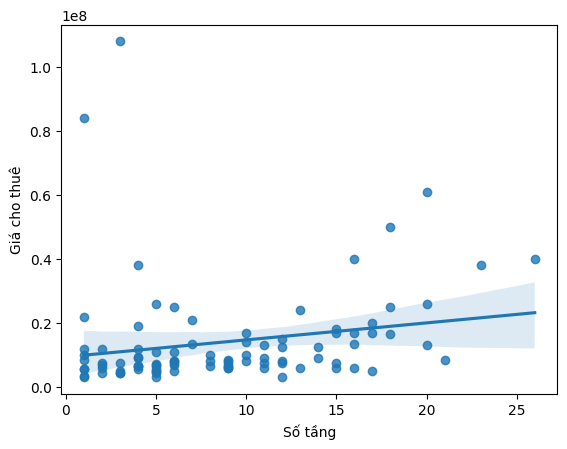

In [ ]:
from scipy import stats
r, p = stats.pearsonr(df_no_nan['Số tầng'], df_no_nan['Giá cho thuê']) #r: ảnh hưởng theo regplot, p_value
print('Số tầng', "correlation coefficient:", r)
print("P-Value:", p)
sns.regplot(x='Số tầng', y='Giá cho thuê', data=df_no_nan)
plt.show()

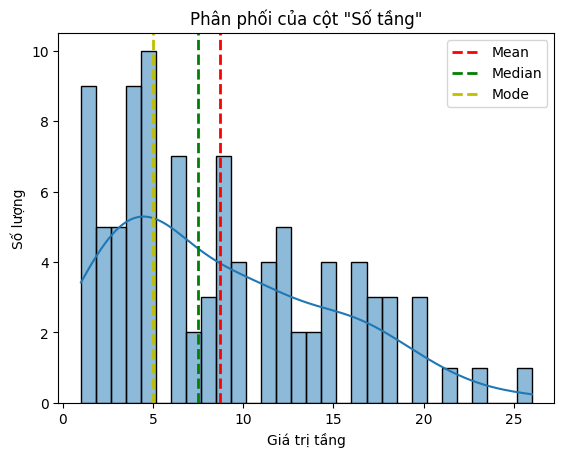

In [ ]:
mean = df_no_nan['Số tầng'].mean()
median = df_no_nan['Số tầng'].median()
mode = df_no_nan['Số tầng'].mode()
mode = mode[0]

# Vẽ biểu đồ phân phối
sns.histplot(df_no_nan['Số tầng'], kde=True, bins=30)
plt.title('Phân phối của cột "Số tầng"')
plt.xlabel('Giá trị tầng')
plt.ylabel('Số lượng')

# Đánh dấu mean, mode, median bằng đường thẳng dọc
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode, color='y', linestyle='dashed', linewidth=2, label='Mode')

plt.legend()
plt.show()

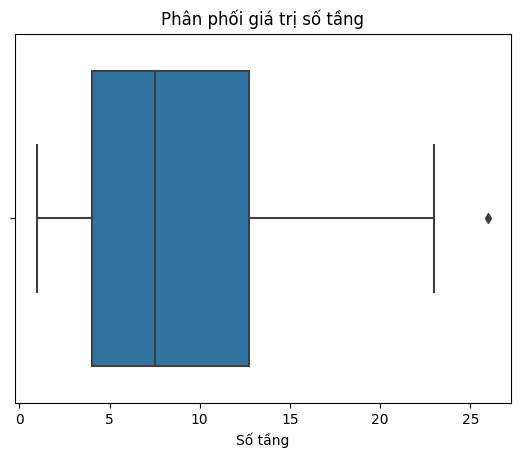

In [ ]:
sns.boxplot(x=df['Số tầng'])

# Thêm tiêu đề và mô tả
plt.title('Phân phối giá trị số tầng')
# plt.xlabel('Số tầng')
# plt.ylabel('Số lượng')

# Hiển thị đồ thị
plt.show()


Phân bố giá trị của cột số tầng là positive sknewed. Chỉ có 1 outlier và giá trị outlier đó không khác biệt quá lớn với các giá trị còn lại. Ta có thể điền các giá trị bị trống bằng phương pháp điền mean hoặc median. Nhưng nhìn chung, giá trị mean sẽ bị ảnh hưởng do outlier nên ta chọn phương pháp điền median thay thế cho các missing data của cột Số tầng.

In [ ]:
median_value = np.ceil(df_no_nan['Số tầng'].median())
median_value

8.0

Số tầng correlation coefficient: 0.0948809070940777
P-Value: 0.0137303870144294


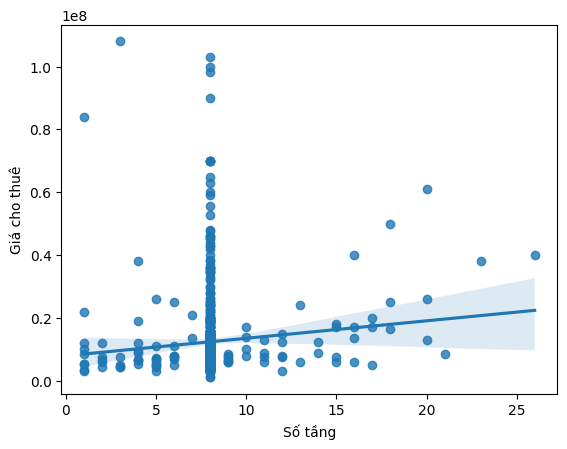

In [ ]:
df['Số tầng'].fillna(median_value, inplace=True)

r, p = stats.pearsonr(df['Số tầng'], df['Giá cho thuê']) #r: ảnh hưởng theo regplot, p_value
print('Số tầng', "correlation coefficient:", r)
print("P-Value:", p)
sns.regplot(x='Số tầng', y='Giá cho thuê', data=df)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Diện tích            674 non-null    int64  
 1   Số phòng ngủ         674 non-null    int64  
 2   Số tầng              674 non-null    float64
 3   Tên dự án            498 non-null    object 
 4   Tên phường           674 non-null    object 
 5   Tình trạng nội thất  674 non-null    object 
 6   Số phòng vệ sinh     674 non-null    int64  
 7   Loại hình căn hộ     674 non-null    object 
 8   Ban công             674 non-null    bool   
 9   Khu mua sắm          674 non-null    bool   
 10  Trường học           674 non-null    bool   
 11  Bệnh viện            674 non-null    bool   
 12  Số ảnh               674 non-null    int64  
 13  Giá cho thuê         674 non-null    int64  
dtypes: bool(4), float64(1), int64(5), object(4)
memory usage: 55.4+ KB


### Cột tên dự án
Đối với các missing data của cột Tên dự án, các missing data mang ý nghĩa là dự án đó không có tên. Chính vì vậy ta không thể thay giá trị mode vào missing data. Nhóm chọn cách điền giá trị None vào những missing data

In [ ]:
df['Tên dự án'].fillna('None', inplace=True)
df

Diện tích  Số phòng ngủ  Số tầng                Tên dự án    Tên phường  \
0           94             2      8.0    Empire City Thủ Thiêm     Thủ Thiêm   
1           86             2      8.0    Empire City Thủ Thiêm     Thủ Thiêm   
2          130             3      8.0  The Metropole Thủ Thiêm     Thủ Thiêm   
3          130             3      8.0    Empire City Thủ Thiêm     Thủ Thiêm   
4          127             3     18.0    Empire City Thủ Thiêm     Thủ Thiêm   
..         ...           ...      ...                      ...           ...   
669         58             1      8.0                     None  Thạnh Mỹ Lợi   
670         25             1      8.0                     None  Thạnh Mỹ Lợi   
671         25             1      3.0                     None  Thạnh Mỹ Lợi   
672        202             4      8.0              Vista Verde  Thạnh Mỹ Lợi   
673         30             1      8.0                     None  Thạnh Mỹ Lợi   

    Tình trạng nội thất  Số phòng vệ sinh      Loại hình căn hộ  Ban công  \
0                Đầy Đủ                 2              Chung Cư      True   
1                Đầy Đủ                 2              Chung Cư      True   
2                Đầy Đủ                 2              Chung Cư      True   
3                Đầy Đủ                 2              Chung Cư      True   
4                Đầy Đủ                 2              Chung Cư      True   
..                  ...               ...                   ...       ...   
669              Đầy Đủ                 1              Chung Cư     False   
670              Đầy Đủ                 1  Căn Hộ Dịch Vụ, Mini      True   
671              Đầy Đủ                 1  Căn Hộ Dịch Vụ, Mini     False   
672             Chưa Có                 3              Chung Cư      True   
673              Đầy Đủ                 1                Duplex      True   

     Khu mua sắm  Trường học  Bệnh viện  Số ảnh  Giá cho thuê  
0           True       False      False       8      40000000  
1           True       False      False      12      38000000  
2           True       False      False      12      70000000  
3           True       False      False      10      44000000  
4           True       False      False       5      50000000  
..           ...         ...        ...     ...           ...  
669        False        True      False       9      14500000  
670         True        True       True       5       5000000  
671        False        True      False       5       4300000  
672         True        True      False       8      43000000  
673        False        True      False       6       7000000  

[674 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Diện tích            674 non-null    int64  
 1   Số phòng ngủ         674 non-null    int64  
 2   Số tầng              674 non-null    float64
 3   Tên dự án            674 non-null    object 
 4   Tên phường           674 non-null    object 
 5   Tình trạng nội thất  674 non-null    object 
 6   Số phòng vệ sinh     674 non-null    int64  
 7   Loại hình căn hộ     674 non-null    object 
 8   Ban công             674 non-null    bool   
 9   Khu mua sắm          674 non-null    bool   
 10  Trường học           674 non-null    bool   
 11  Bệnh viện            674 non-null    bool   
 12  Số ảnh               674 non-null    int64  
 13  Giá cho thuê         674 non-null    int64  
dtypes: bool(4), float64(1), int64(5), object(4)
memory usage: 55.4+ KB


## Xử lý outlier

In [ ]:
numeric_features = list(df.select_dtypes(include=['int', 'float']).columns)
categorical_features = list(df.select_dtypes(include=['object','bool']).columns)

In [ ]:
print("Cột số:\n",numeric_features)
print("Cột phân loại:\n", categorical_features)

Cột số:
 ['Diện tích', 'Số phòng ngủ', 'Số tầng', 'Số phòng vệ sinh', 'Số ảnh', 'Giá cho thuê']
Cột phân loại:
 ['Tên dự án', 'Tên phường', 'Tình trạng nội thất', 'Loại hình căn hộ', 'Ban công', 'Khu mua sắm', 'Trường học', 'Bệnh viện']


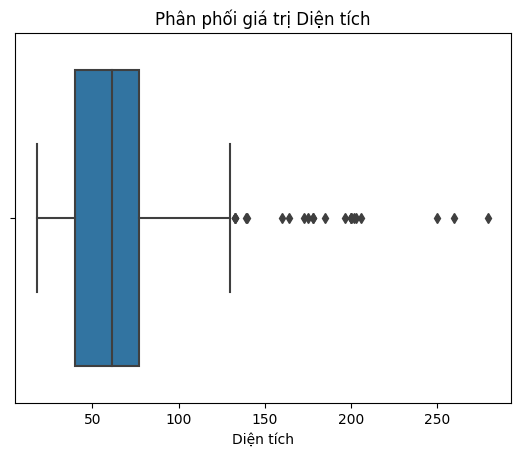

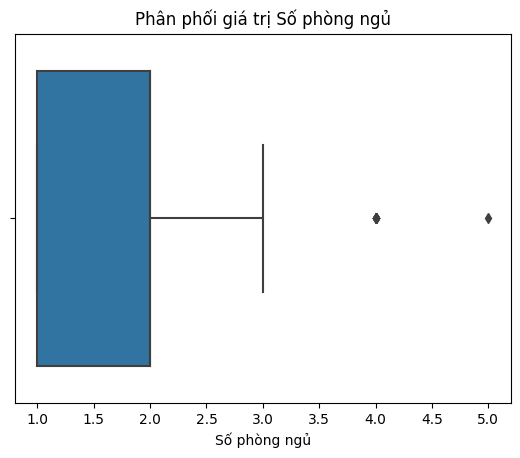

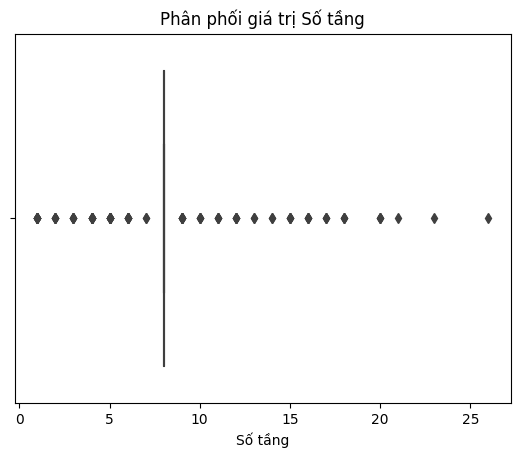

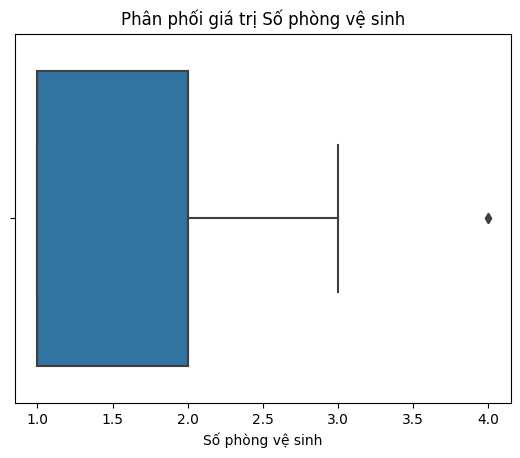

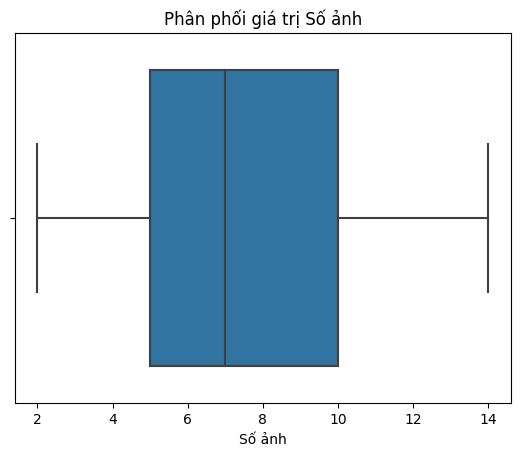

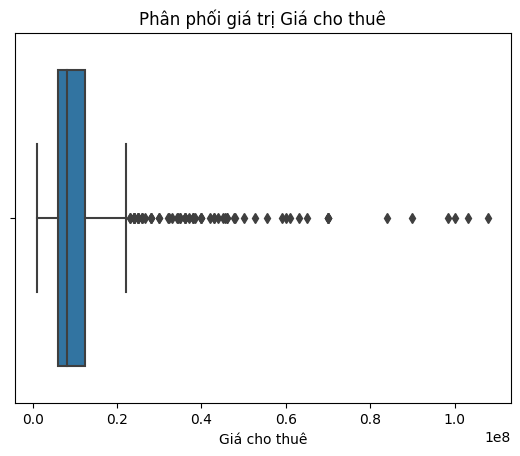

In [ ]:
for col in numeric_features:
    sns.boxplot(x=df[col])
    plt.title(f'Phân phối giá trị {col}')
    plt.show()

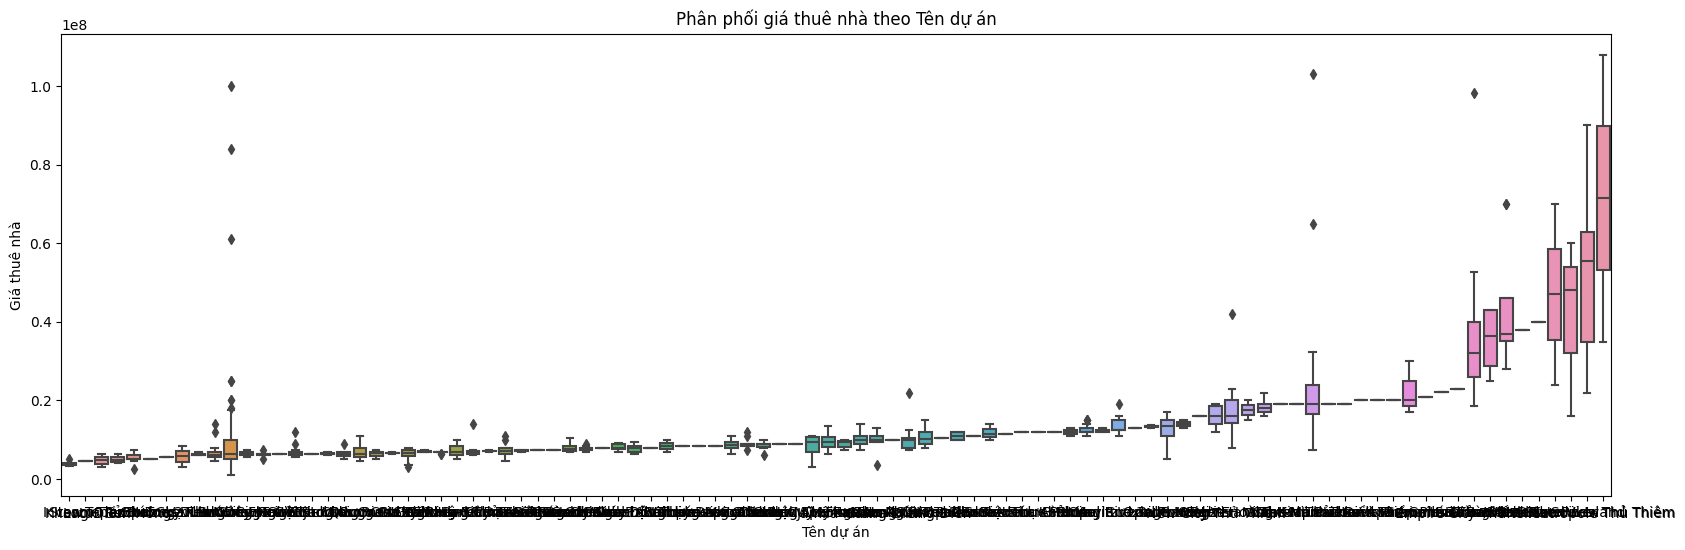

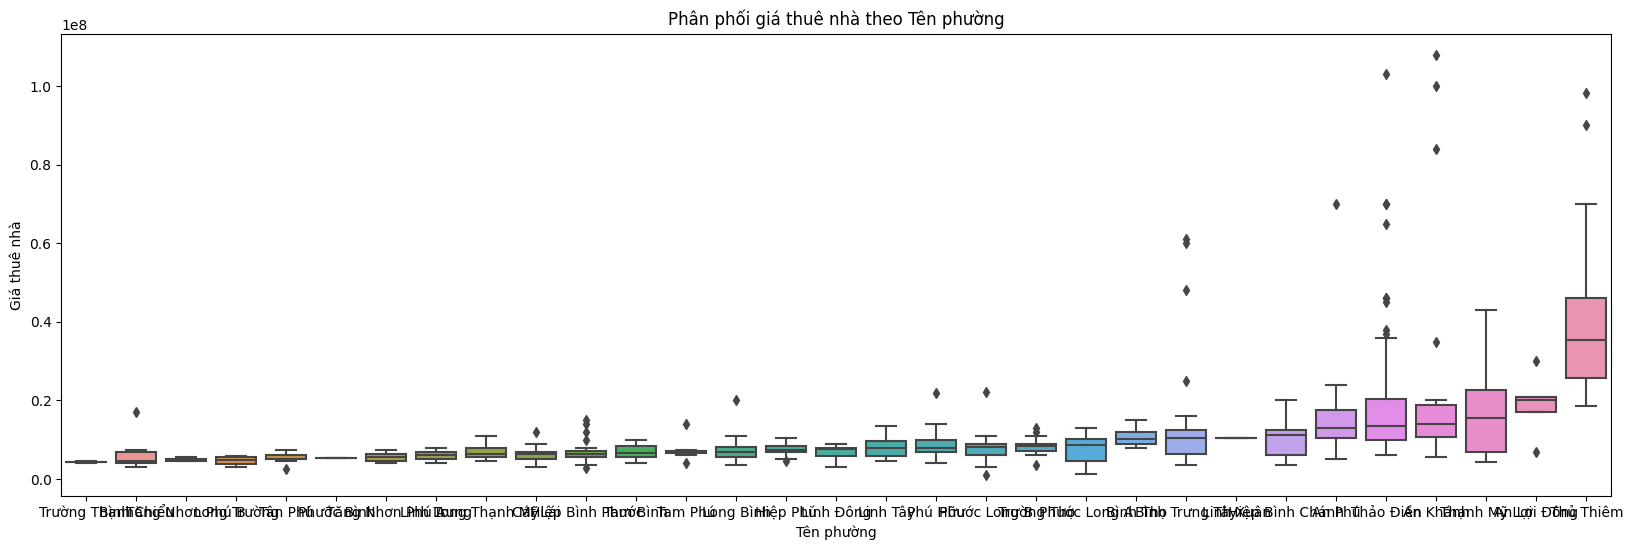

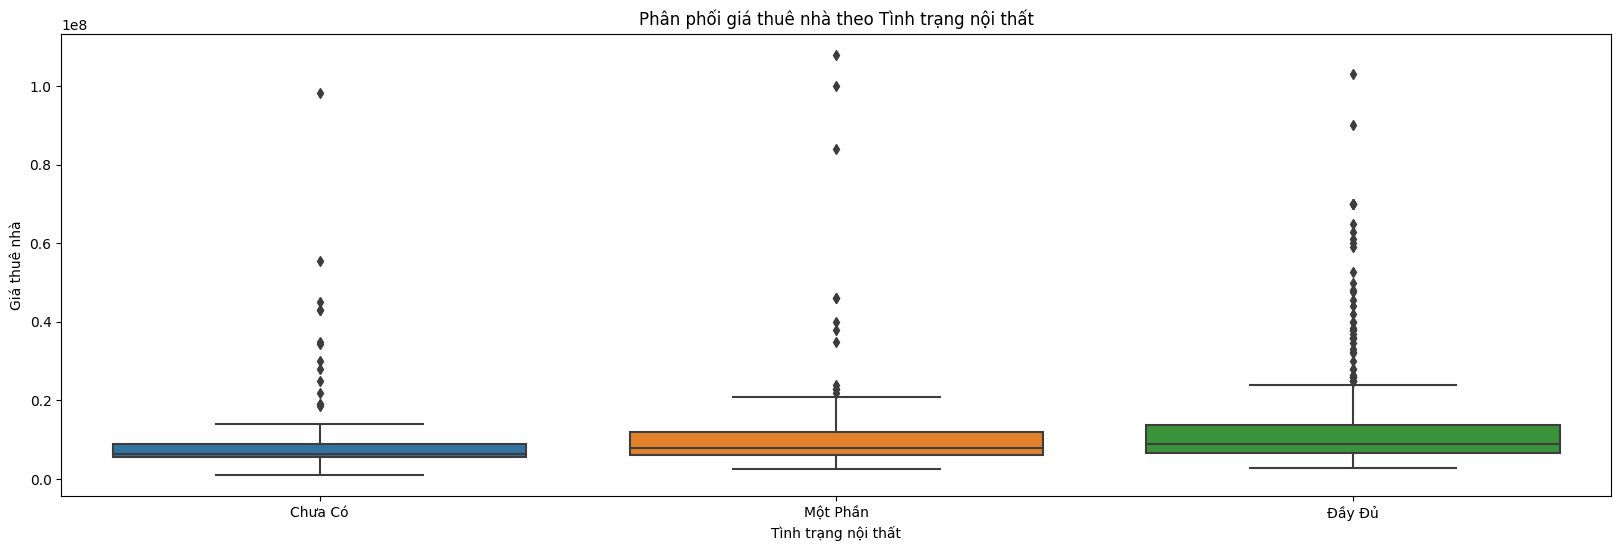

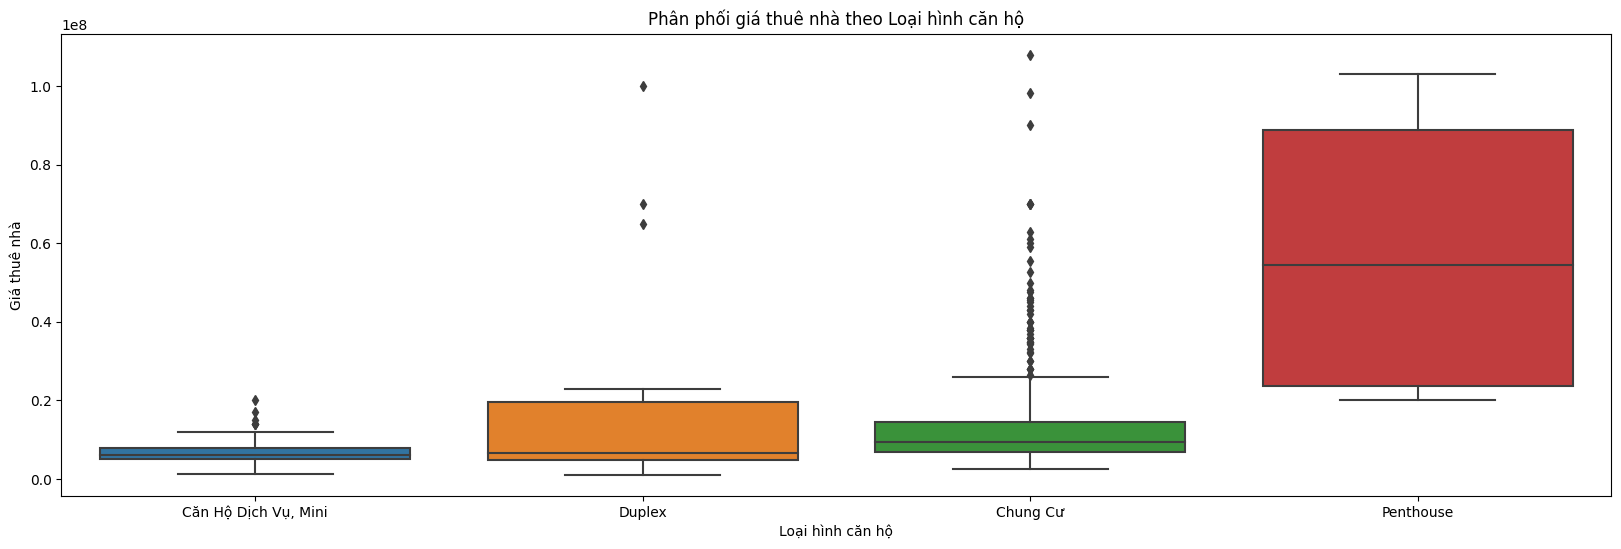

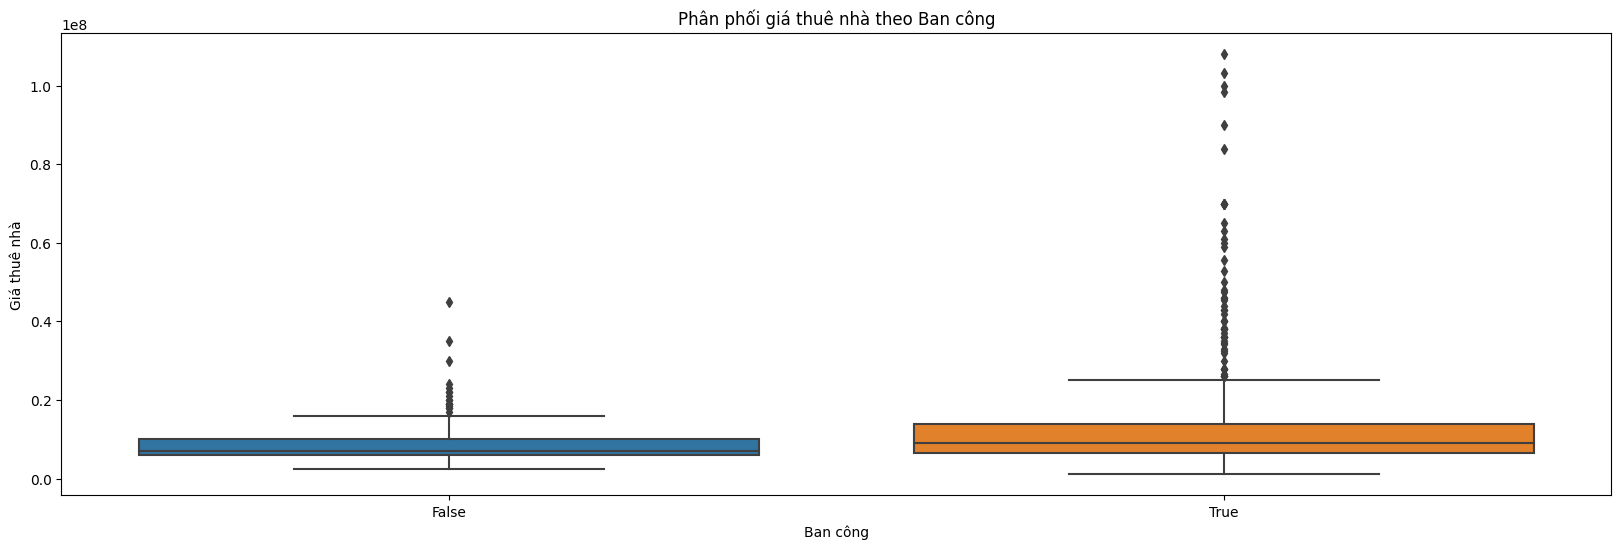

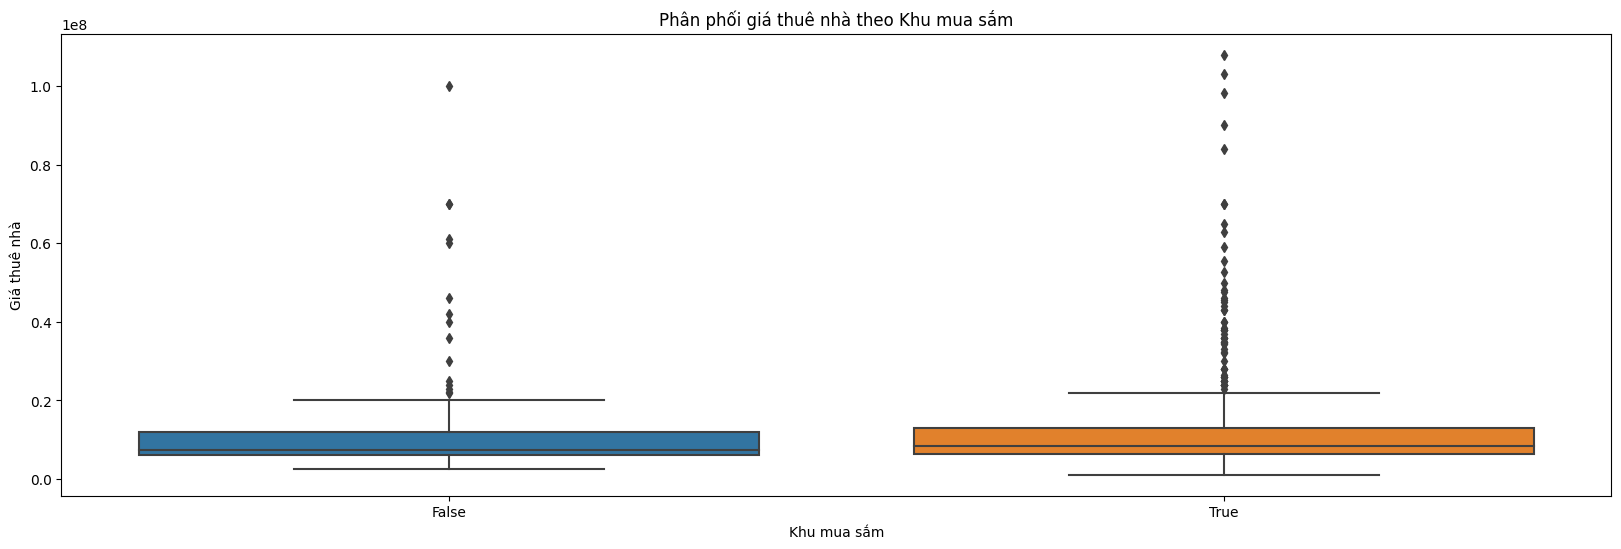

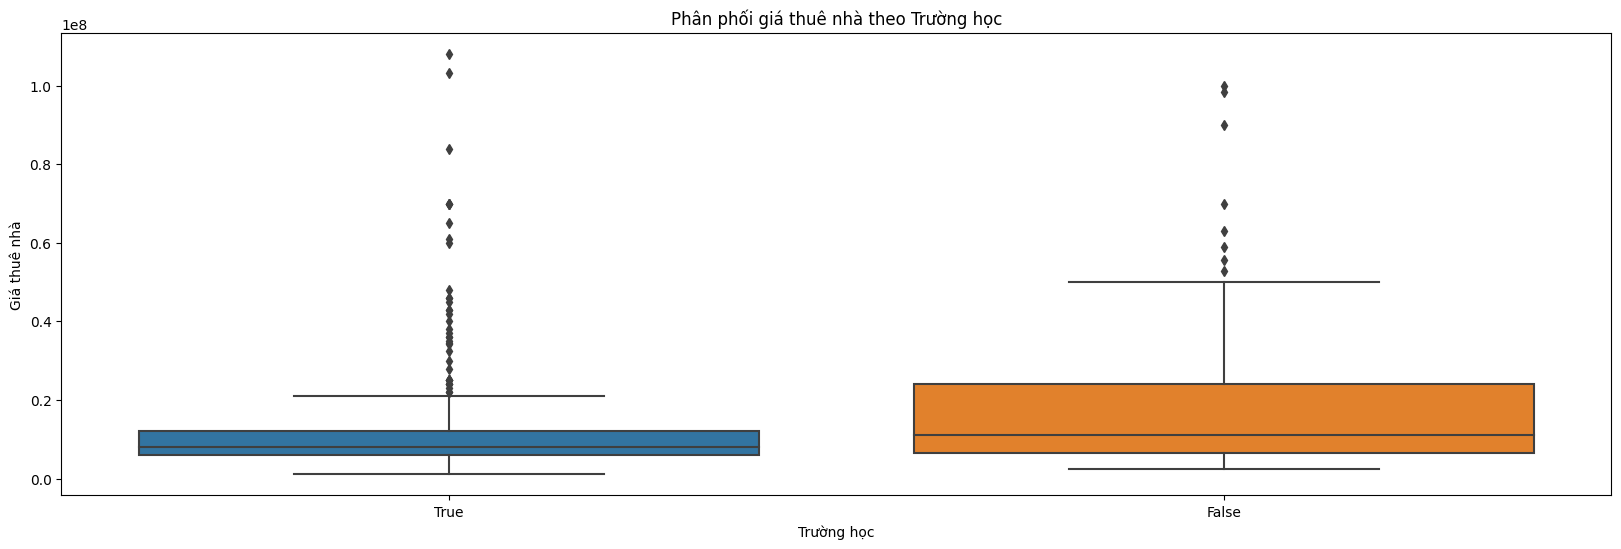

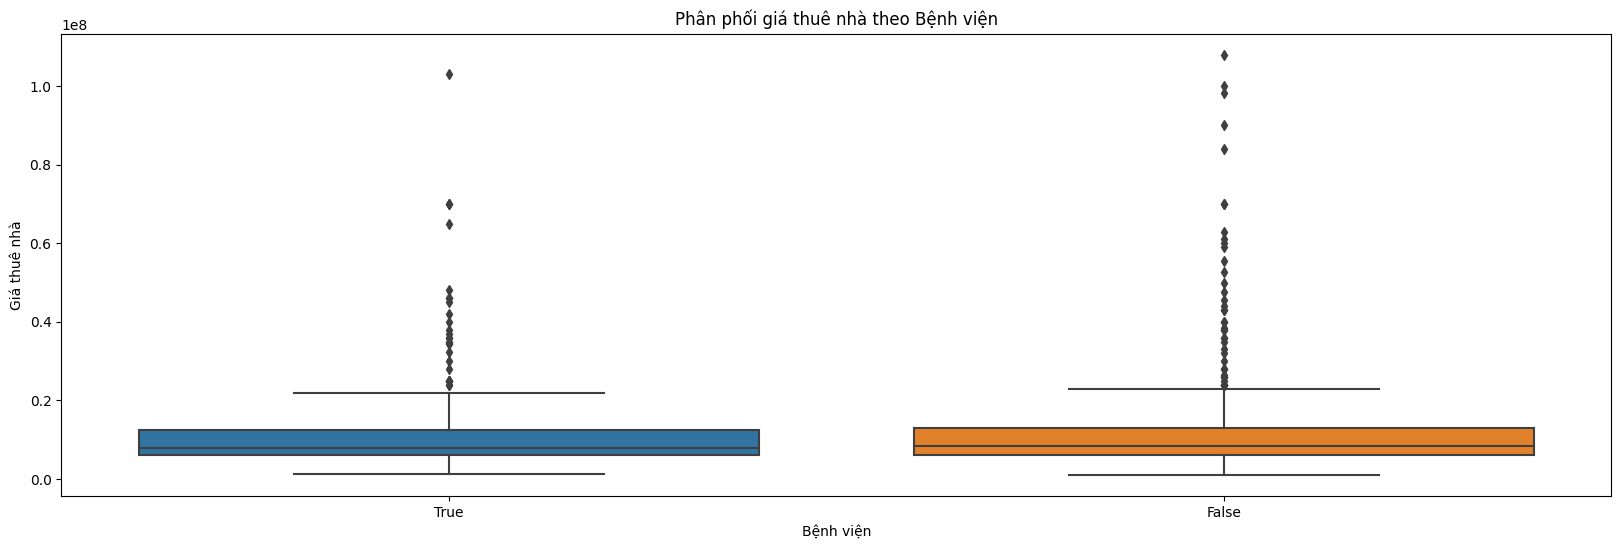

In [ ]:
for category in categorical_features:
    order = df.groupby(category)['Giá cho thuê'].median().sort_values().index
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=category, y='Giá cho thuê', data=df, order = order)
    plt.title(f'Phân phối giá thuê nhà theo {category}')
    plt.xlabel(category)
    plt.ylabel('Giá thuê nhà')
    plt.show()

Vẽ boxplot cho các biến số và biến phân loại, ta thấy bộ dữ liệu có khá nhiều outlier. Cần loại bỏ outlier để kết quả phân tích được chính xác hơn

#### Xử lý cột Loại hình căn hộ


Để giới hạn đề tài, nhóm chỉ xem xét và xây dựng mô hình với 2 loại hình căn hộ là Chung Cư và Căn Hộ Dịch Vụ. Các loại hình căn hộ như Duplex và Penthouse không phổ biến và giá cho thuê chênh lệch khá nhiều tạo nhiễu cho bộ dữ liệu nên sẽ bị loại bỏ.

In [ ]:
condition = (df['Loại hình căn hộ'] =='Duplex')
df=df[~condition]
condition = (df['Loại hình căn hộ'] =='Penthouse')
df=df[~condition]
df.shape

(652, 14)

#### Bỏ outlier của cột tên phường


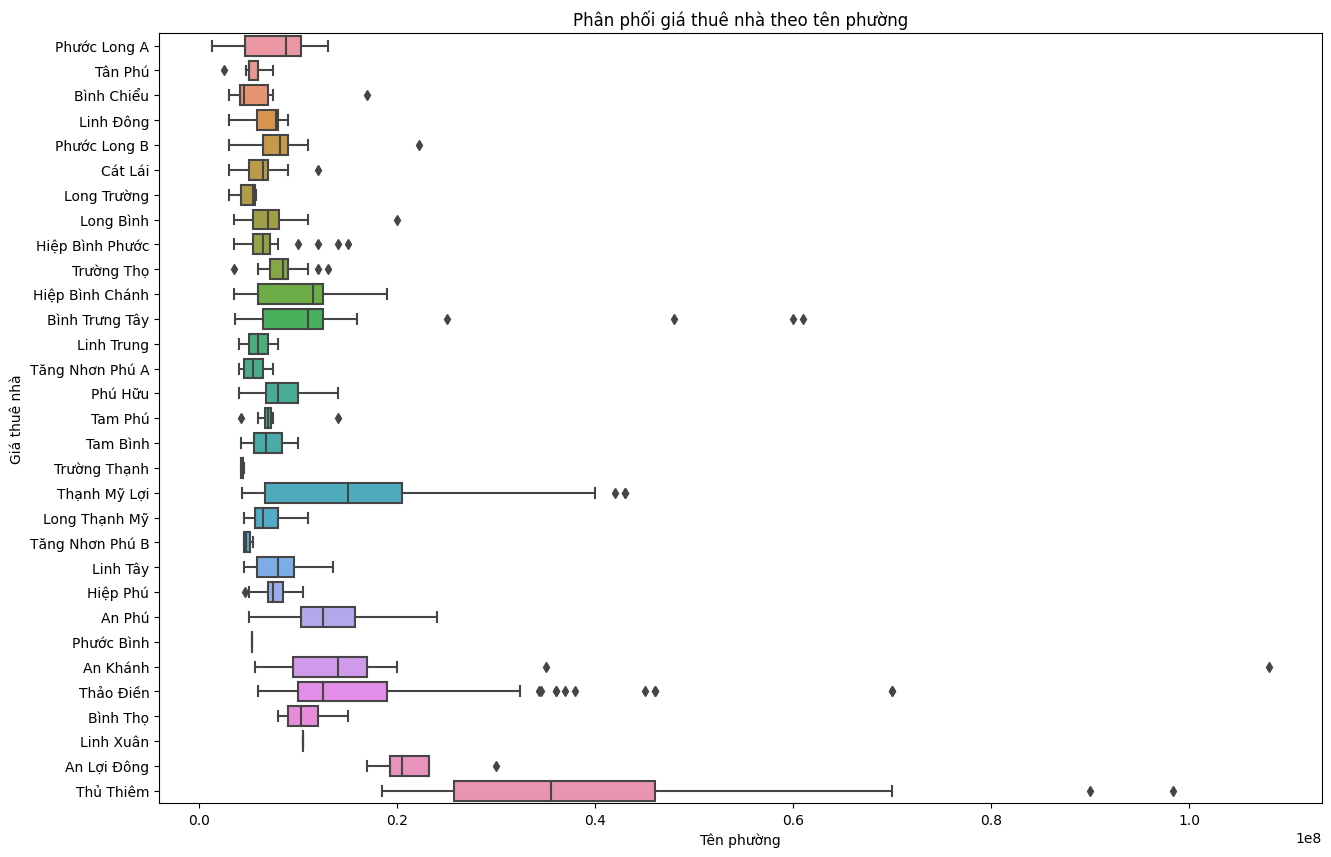

In [ ]:
# dữ liệu gốc
order = df.groupby('Tên phường')['Giá cho thuê'].min().sort_values().index
plt.figure(figsize=(15, 10))
sns.boxplot(y='Tên phường', x='Giá cho thuê', data=df, order = order, orient='h')
plt.title('Phân phối giá thuê nhà theo tên phường')
plt.xlabel('Tên phường')
plt.ylabel('Giá thuê nhà')
plt.show()

Quan sát boxplot phân bố giá thuê nhà từng phường của cột Tên phường, ta thấy tồn tại khá nhiều outlier. Những outlier này là các giá trị thiểu số và nhóm cần dự đoán giá cho thuê nhà của các căn hộ phổ biến trong khu vực. Vì vậy nhóm sẽ loại bỏ bớt outlier theo từng phường.

In [ ]:
df_temp=df.copy()
# Tính toán IQR và ngưỡng cắt tỉa cho mỗi nhóm tên phường
def remove_outliers(group):
    Q1 = group["Giá cho thuê"].quantile(0.25)
    Q3 = group["Giá cho thuê"].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    return group[(group["Giá cho thuê"] >= lower_threshold) & (group["Giá cho thuê"] <= upper_threshold)]

# Áp dụng phương thức groupby và loại bỏ outliers cho mỗi nhóm
df_temp = df_temp.groupby("Tên phường").apply(remove_outliers).reset_index(drop=True)

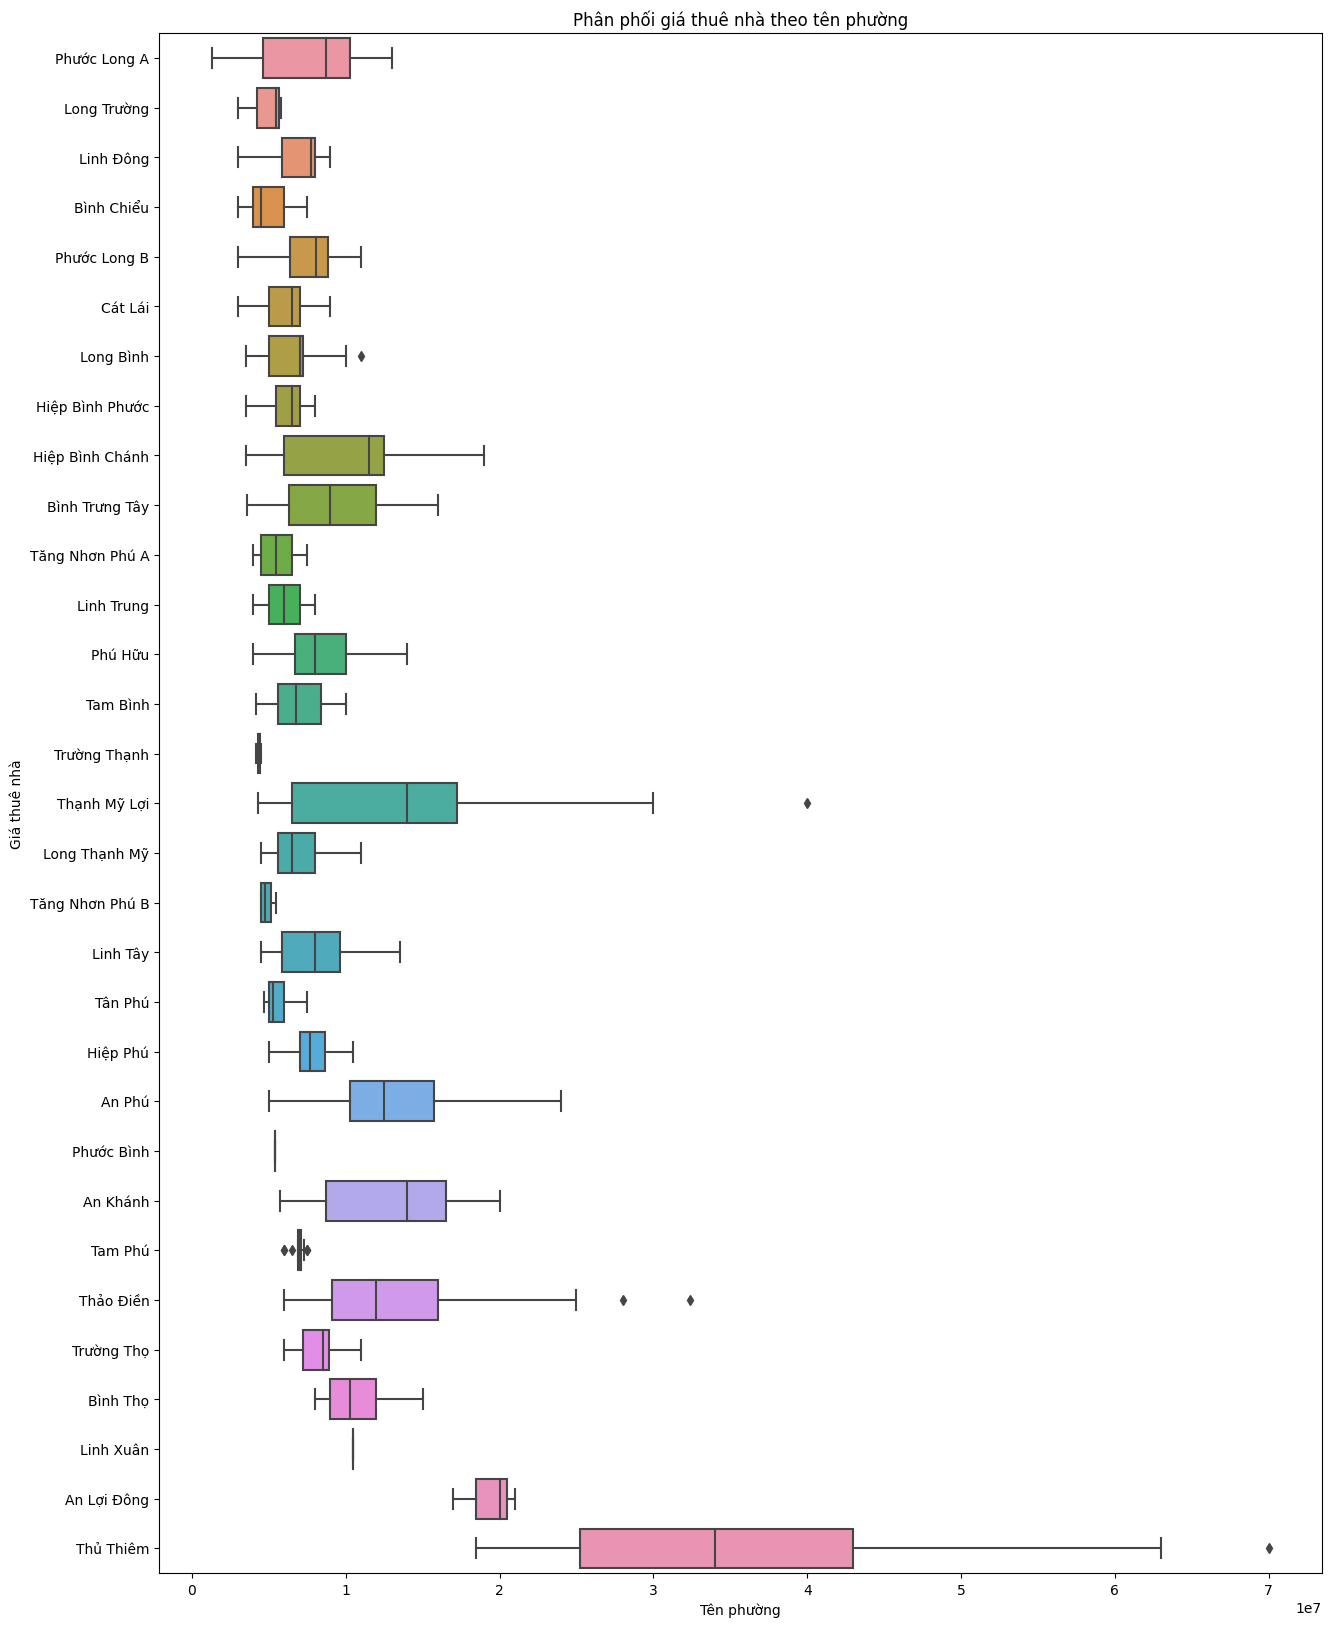

In [ ]:
order = df_temp.groupby('Tên phường')['Giá cho thuê'].min().sort_values().index
plt.figure(figsize=(15, 20))
sns.boxplot(y='Tên phường', x='Giá cho thuê', data=df_temp, order = order, orient='h')
plt.title('Phân phối giá thuê nhà theo tên phường')
plt.xlabel('Tên phường')
plt.ylabel('Giá thuê nhà')
plt.show()

In [ ]:
# Tiếp tục loại bỏ outlier lần 2
df_temp = df_temp.groupby("Tên phường").apply(remove_outliers).reset_index(drop=True)
df_temp.shape

(604, 14)

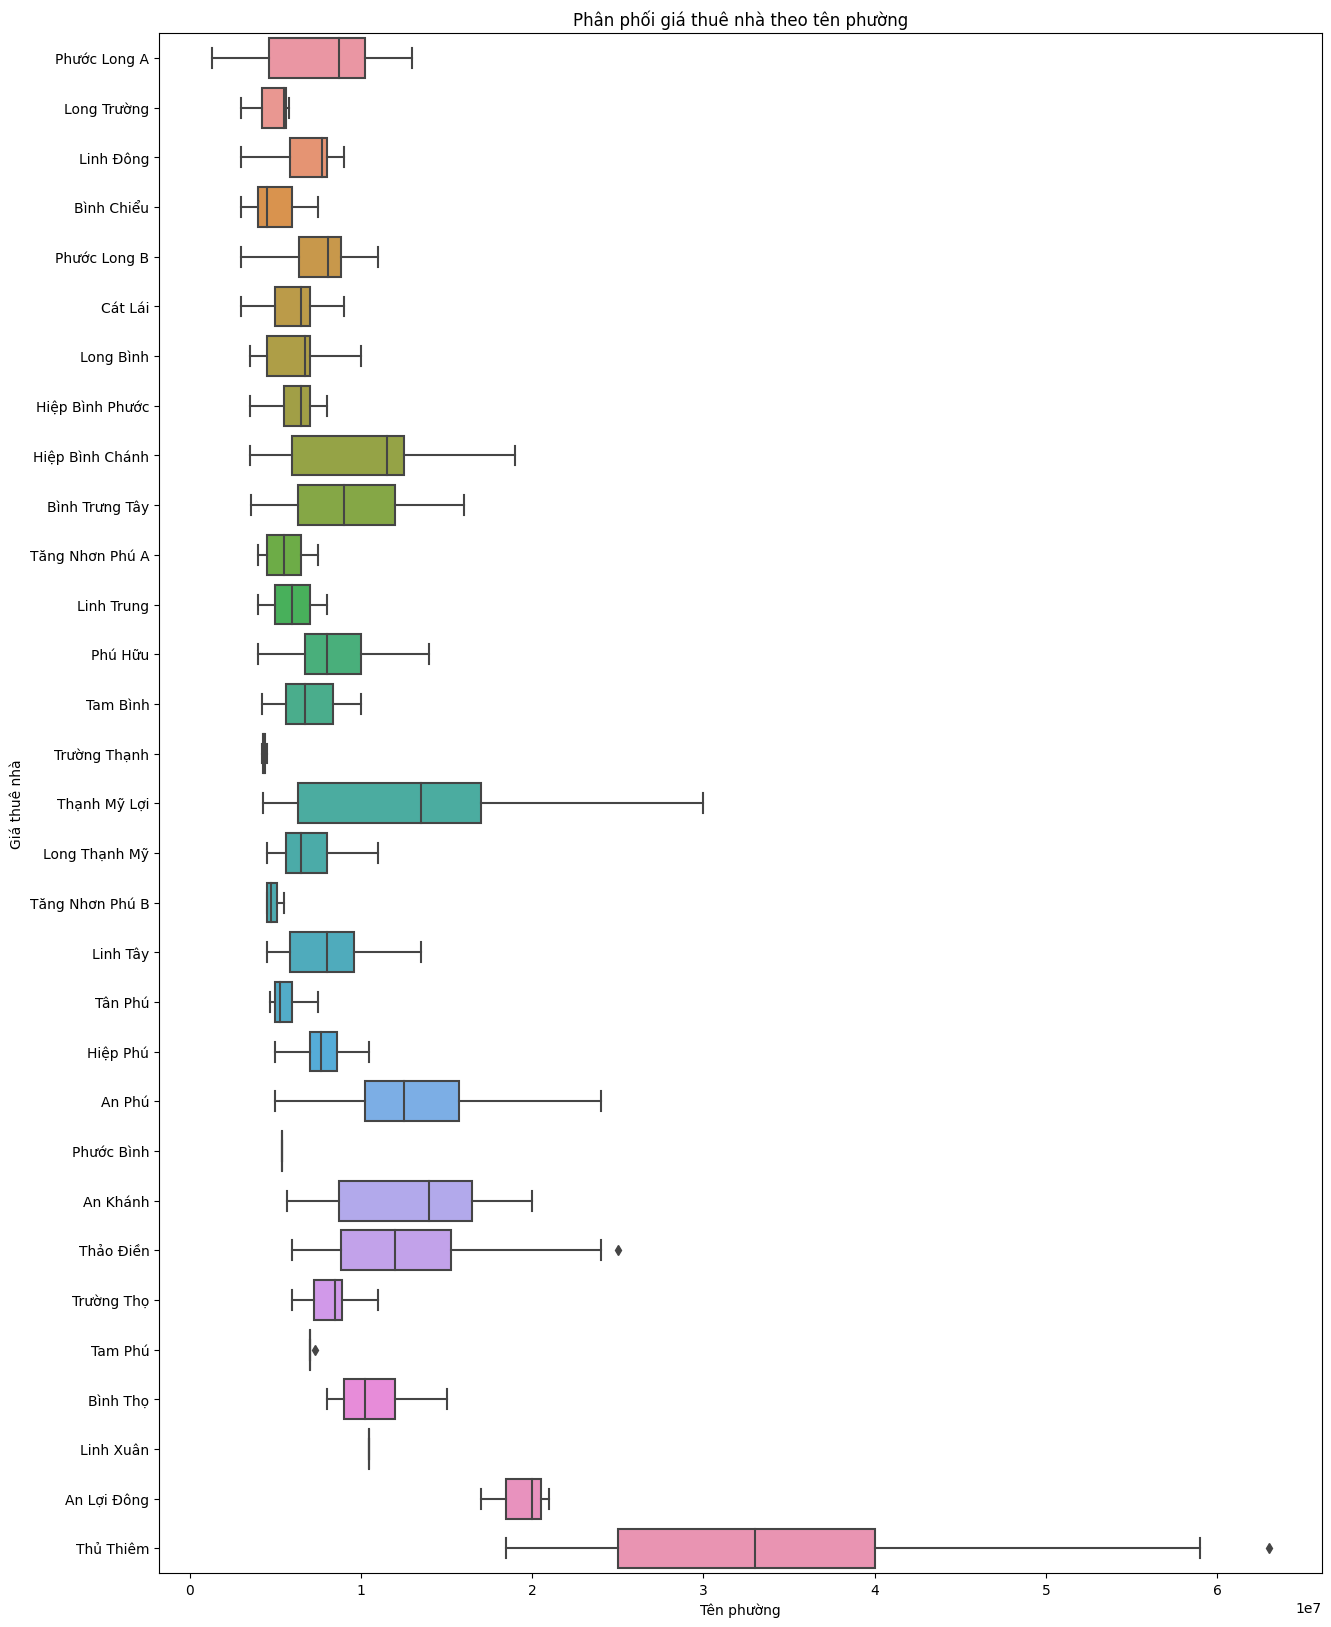

In [ ]:
order = df_temp.groupby('Tên phường')['Giá cho thuê'].min().sort_values().index
plt.figure(figsize=(15, 20))
sns.boxplot(y='Tên phường', x='Giá cho thuê', data=df_temp, order = order, orient='h')
plt.title('Phân phối giá thuê nhà theo tên phường')
plt.xlabel('Tên phường')
plt.ylabel('Giá thuê nhà')
plt.show()

Sau khi loại bỏ outlier 2 lần cho giá thuê nhà của từng phường, ta thấy outlier đã giảm đi đáng kể và ta chấp nhận kết quả này.

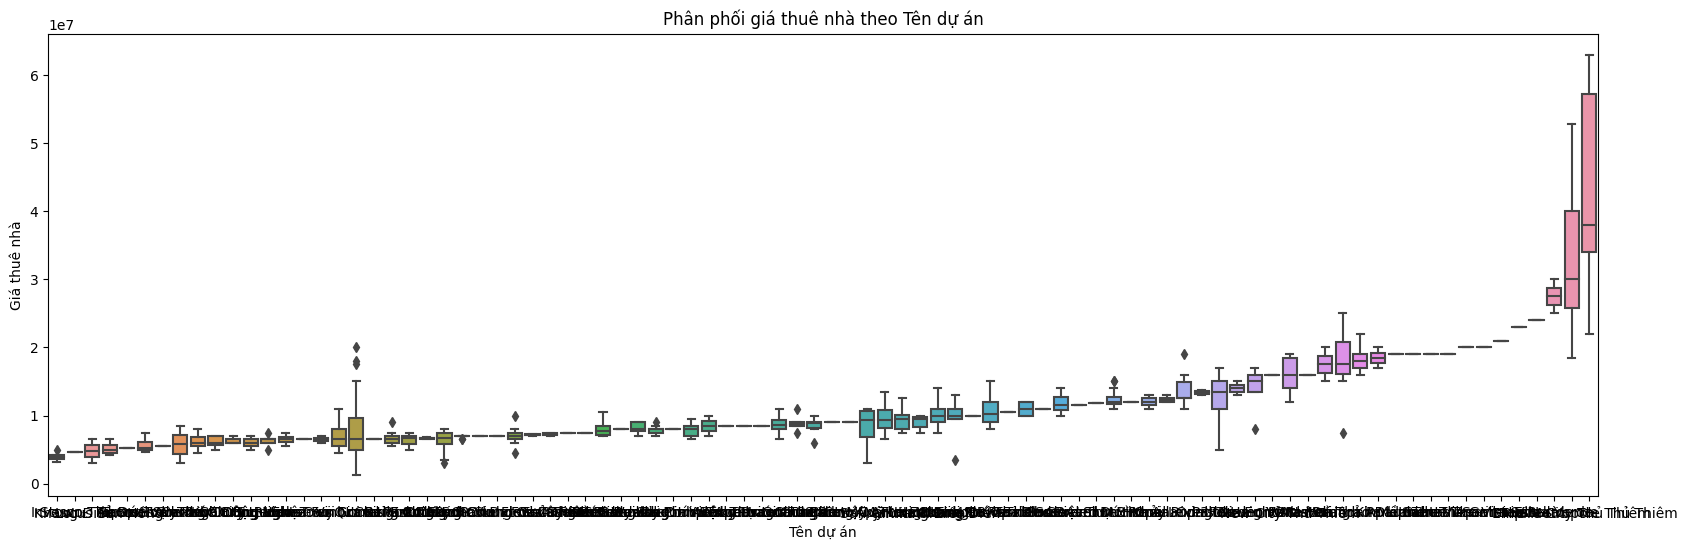

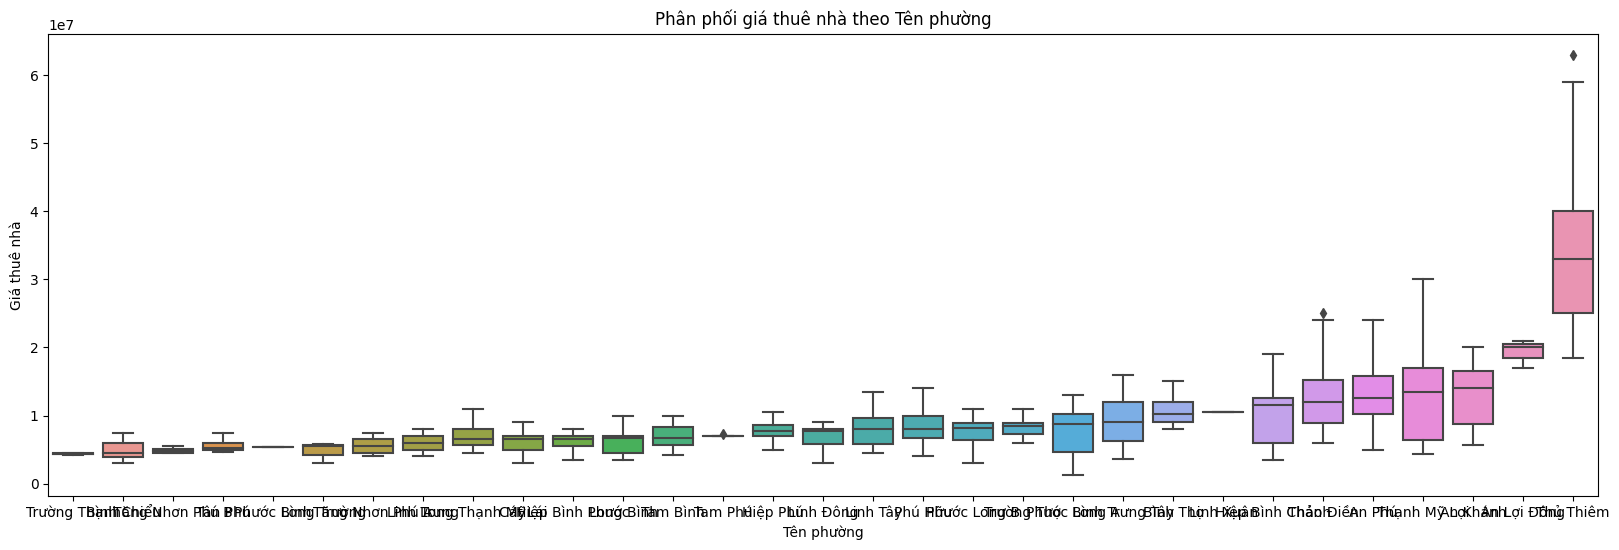

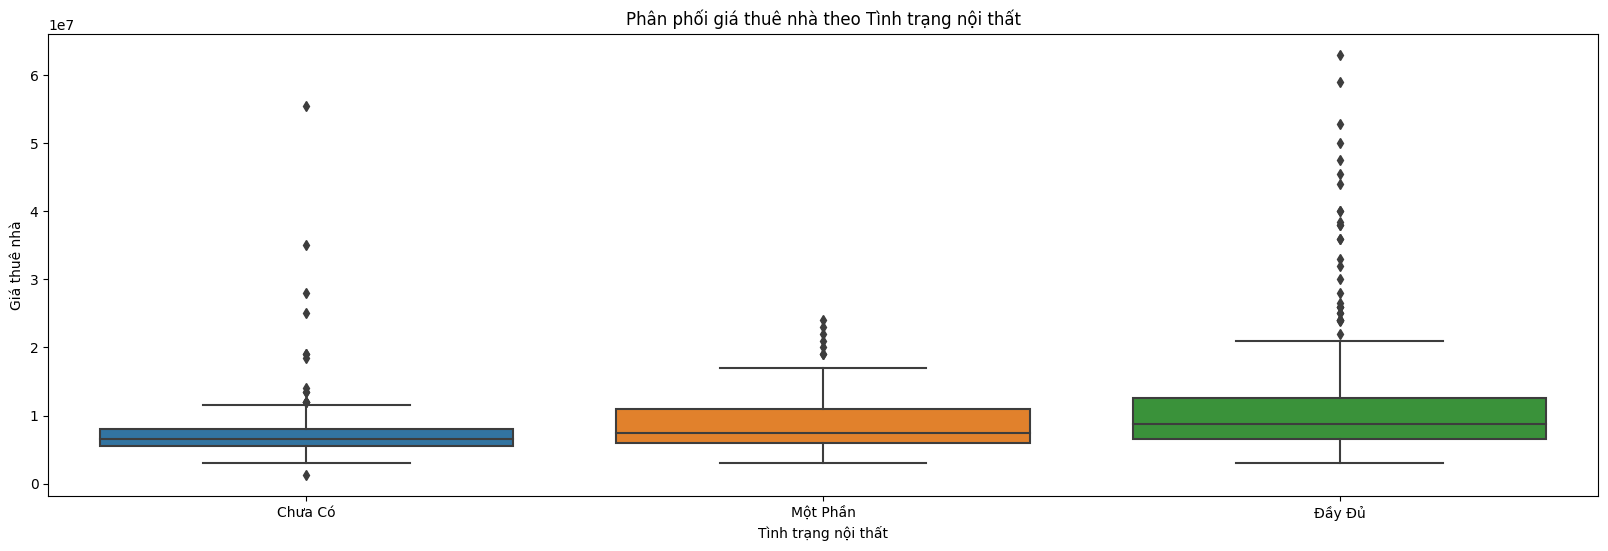

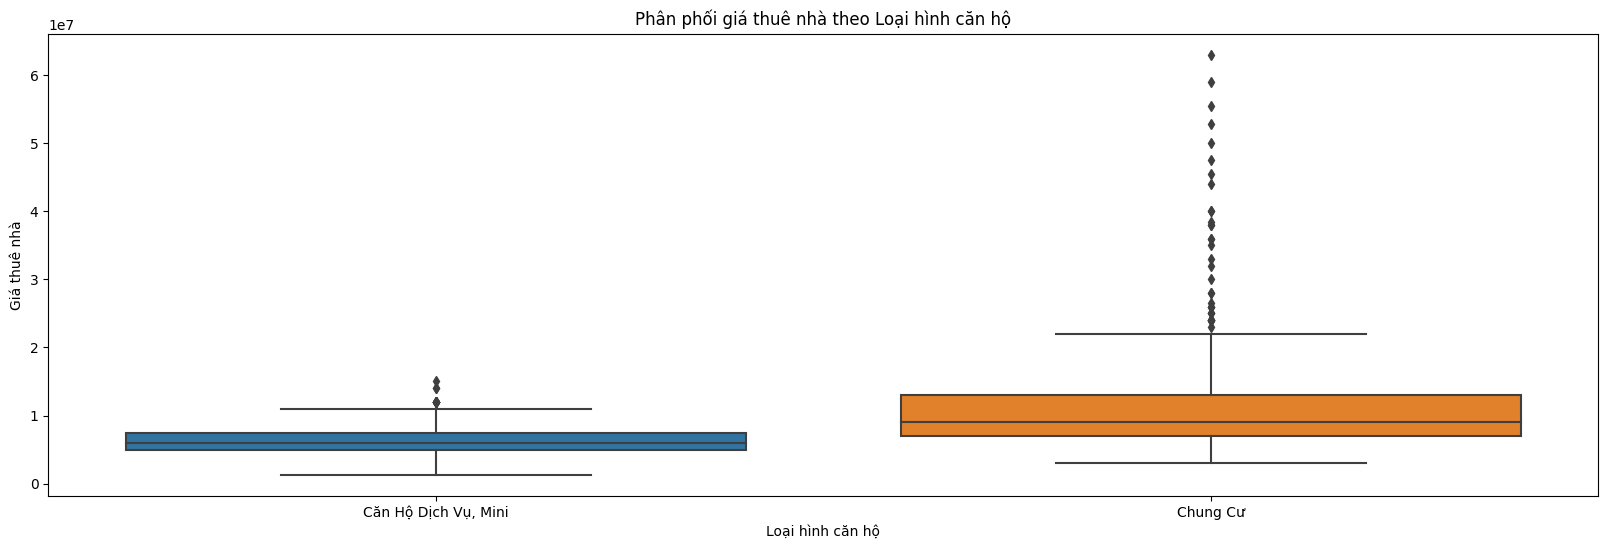

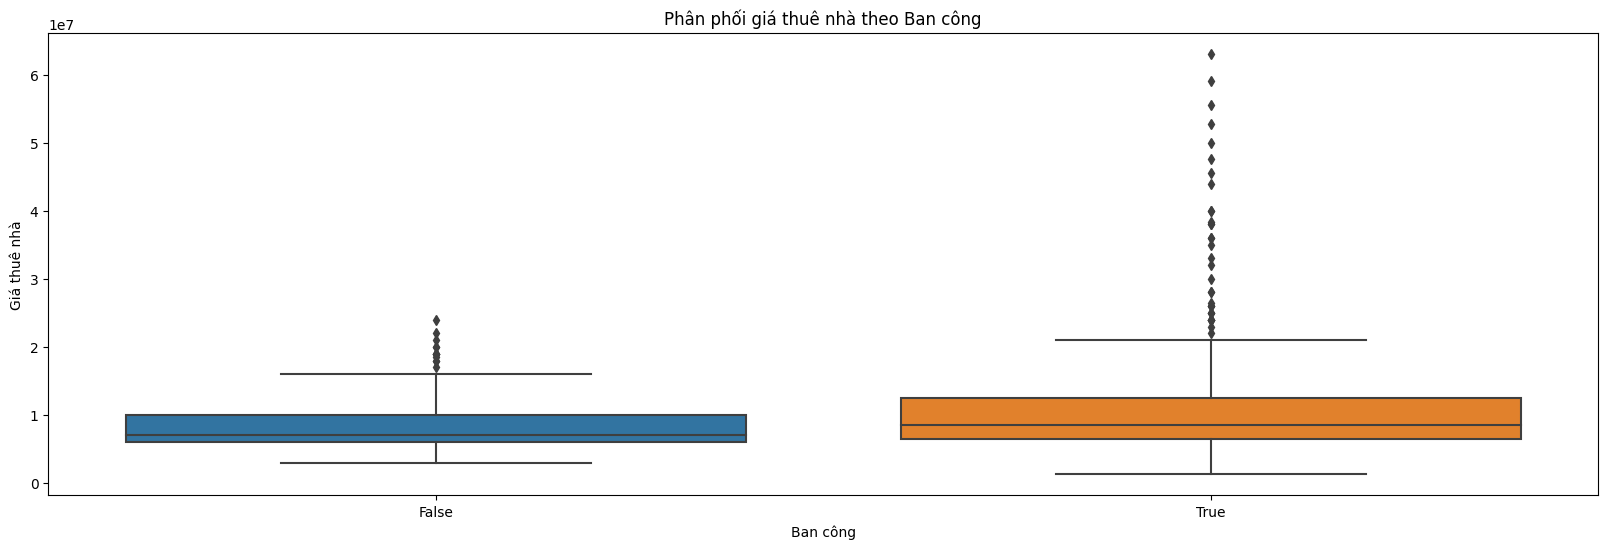

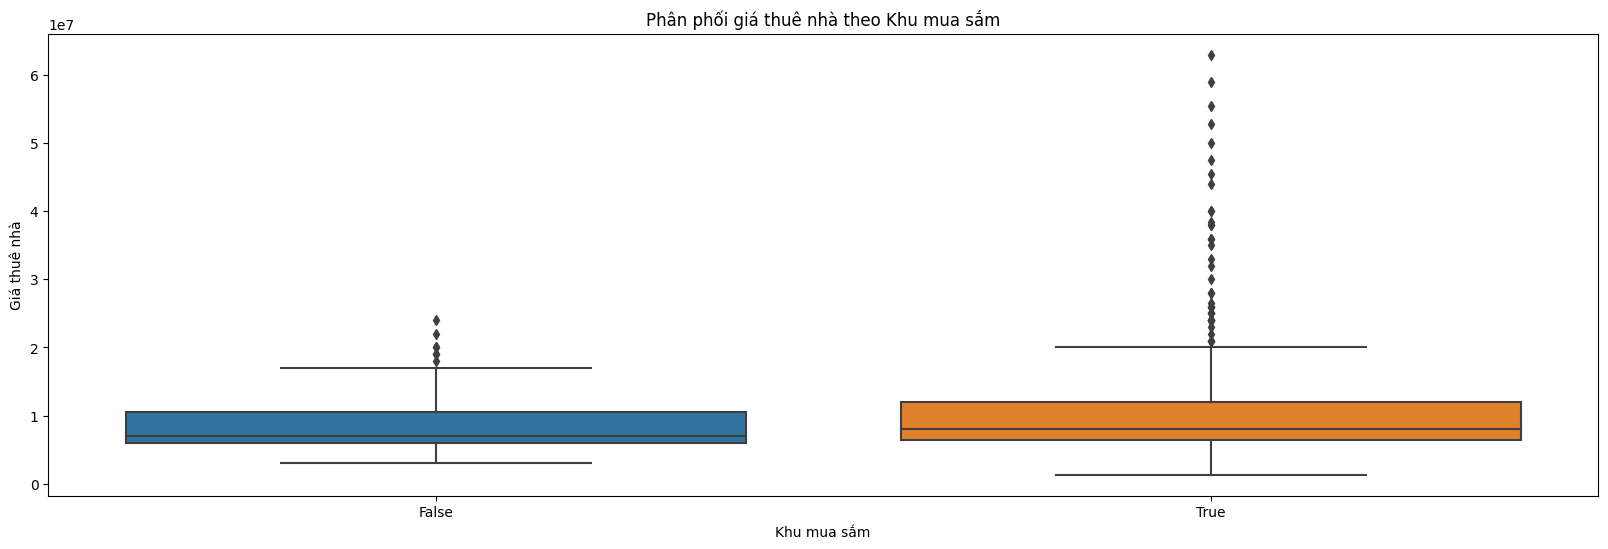

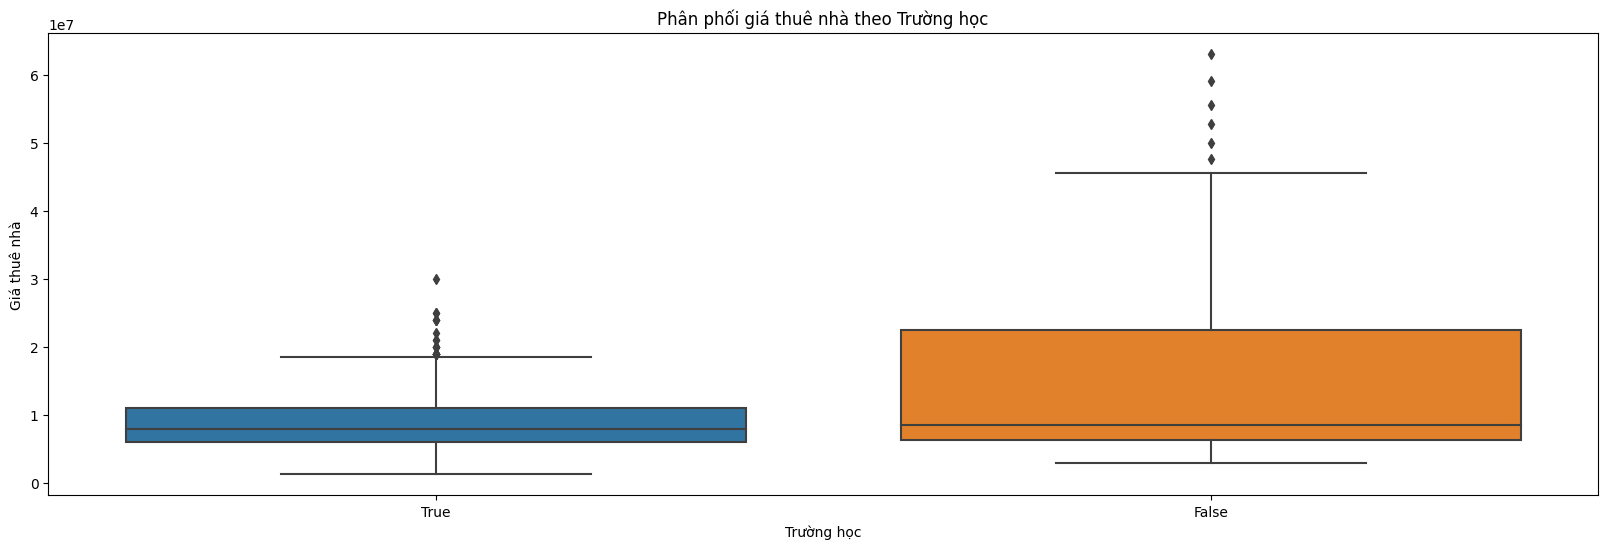

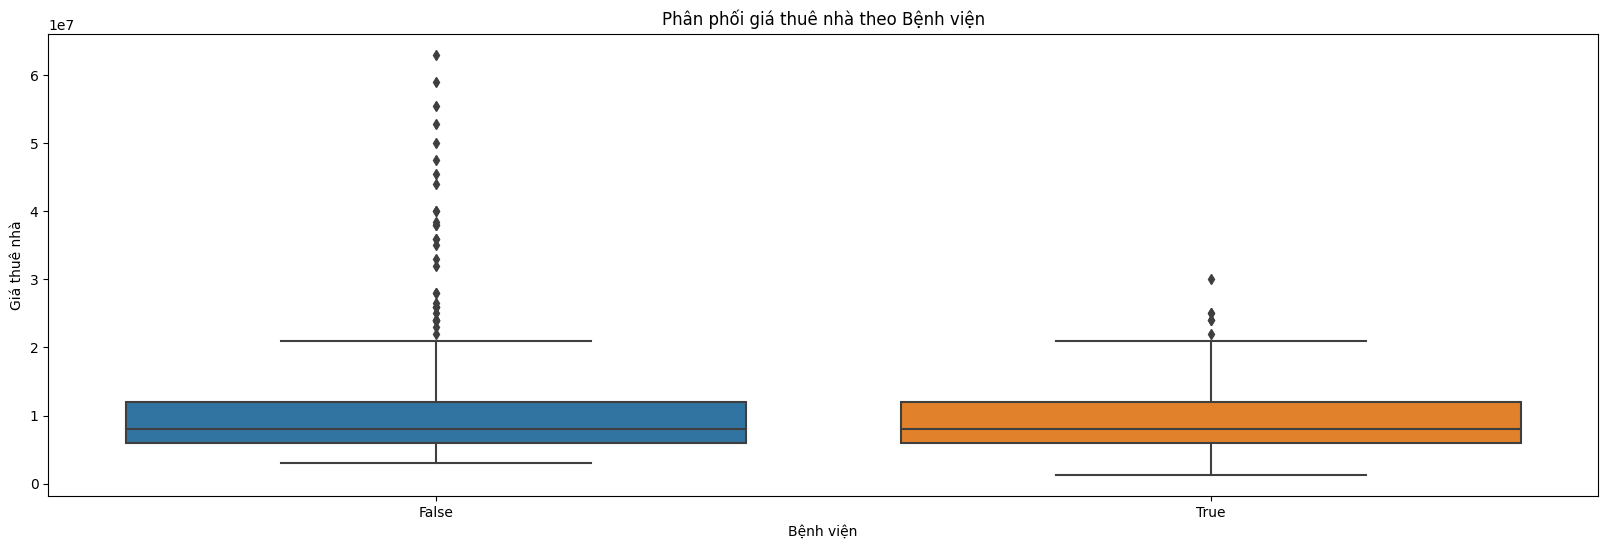

In [ ]:
for category in categorical_features:
    order = df_temp.groupby(category)['Giá cho thuê'].median().sort_values().index
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=category, y='Giá cho thuê', data=df_temp, order = order)
    plt.title(f'Phân phối giá thuê nhà theo {category}')
    plt.xlabel(category)
    plt.ylabel('Giá thuê nhà')
    plt.show()

#### Loại bỏ outlier của cột tên dự án

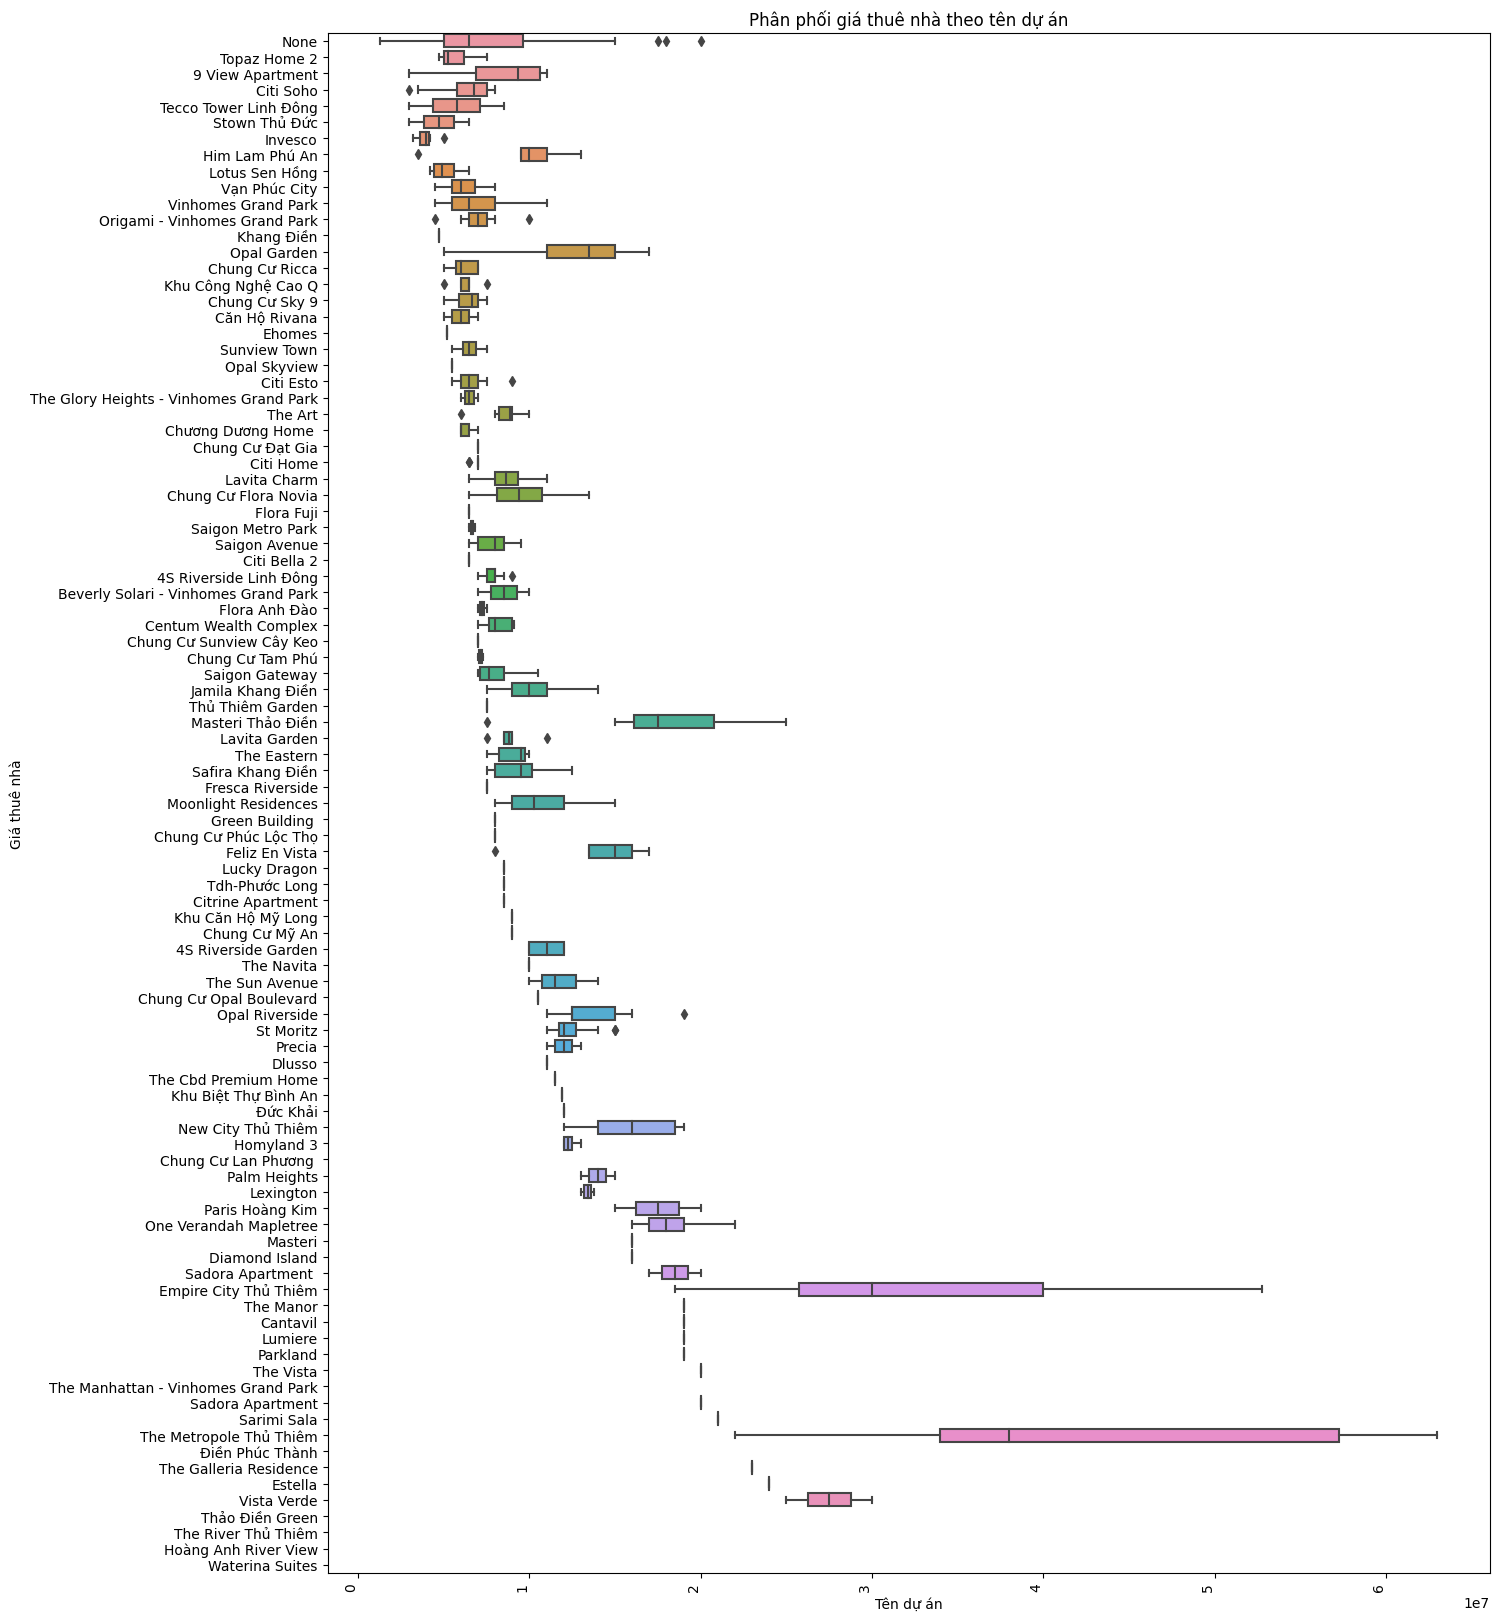

In [ ]:
# dữ liệu df_temp
order = df.groupby('Tên dự án')['Giá cho thuê'].min().sort_values().index
plt.figure(figsize=(15, 20))
sns.boxplot(y='Tên dự án', x='Giá cho thuê', data=df_temp, order = order, orient='h')
plt.title('Phân phối giá thuê nhà theo tên dự án')
plt.xlabel('Tên dự án')
plt.ylabel('Giá thuê nhà')
plt.xticks(rotation=90, ha='right')  # Để tránh chồng chéo tên dự án
plt.show()

Tương tự với việc xét giá thuê nhà ở từng phường, tại cụ thể từng dự án, ta thấy vẫn tồn tại các outlier. Vì vậy nhóm loại bỏ các outlier theo từng dự án để giúp kết quả phân tích chính xác hơn

In [ ]:
# Áp dụng phương thức groupby và loại bỏ outliers cho mỗi nhóm
df_temp = df_temp.groupby("Tên dự án").apply(remove_outliers).reset_index(drop=True)
df_temp.shape

(582, 14)

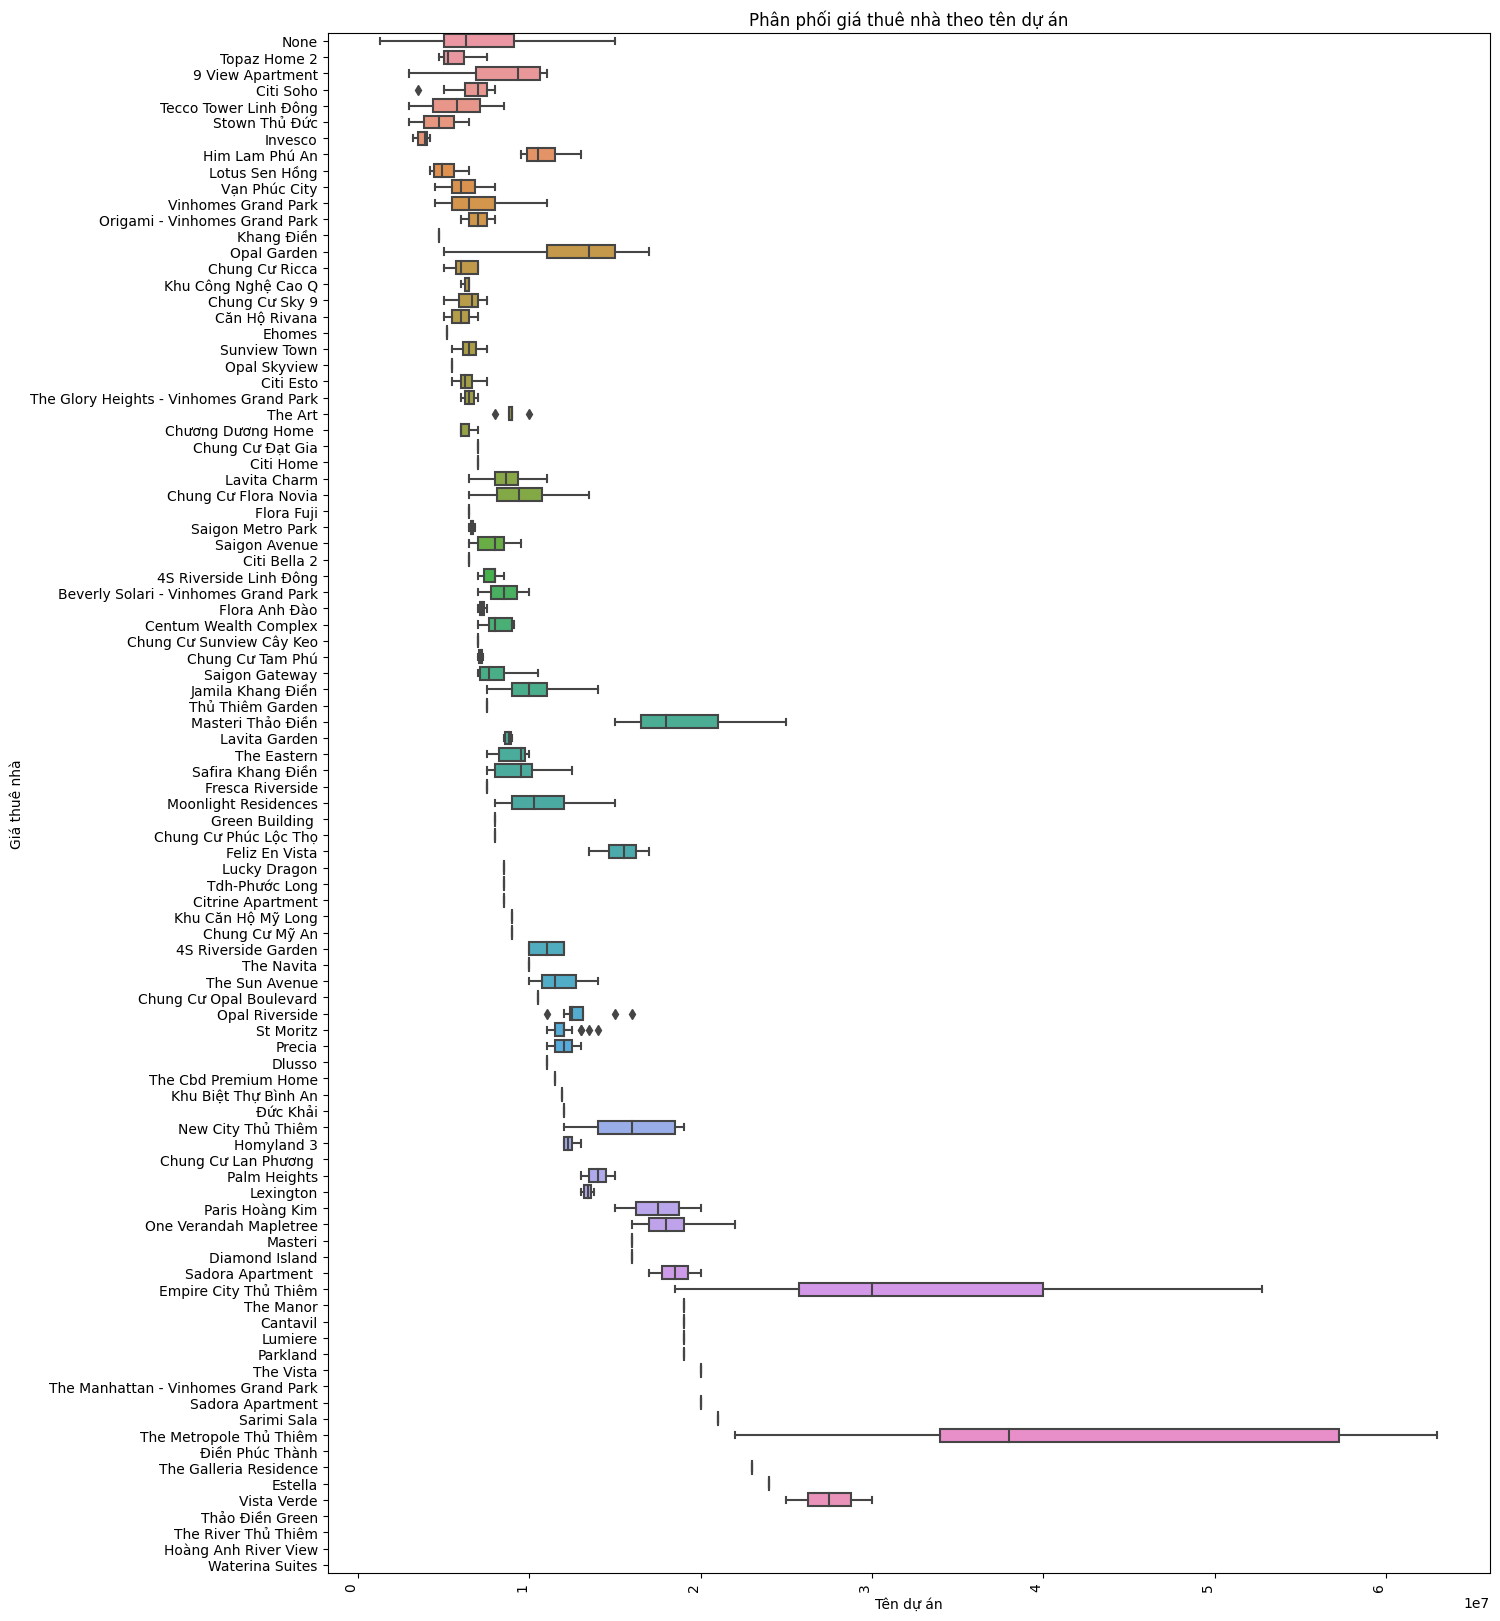

In [ ]:
order = df.groupby('Tên dự án')['Giá cho thuê'].min().sort_values().index
plt.figure(figsize=(15, 20))
sns.boxplot(y='Tên dự án', x='Giá cho thuê', data=df_temp, order = order, orient='h')
plt.title('Phân phối giá thuê nhà theo tên dự án')
plt.xlabel('Tên dự án')
plt.ylabel('Giá thuê nhà')
plt.xticks(rotation=90, ha='right')  # Để tránh chồng chéo tên dự án
plt.show()

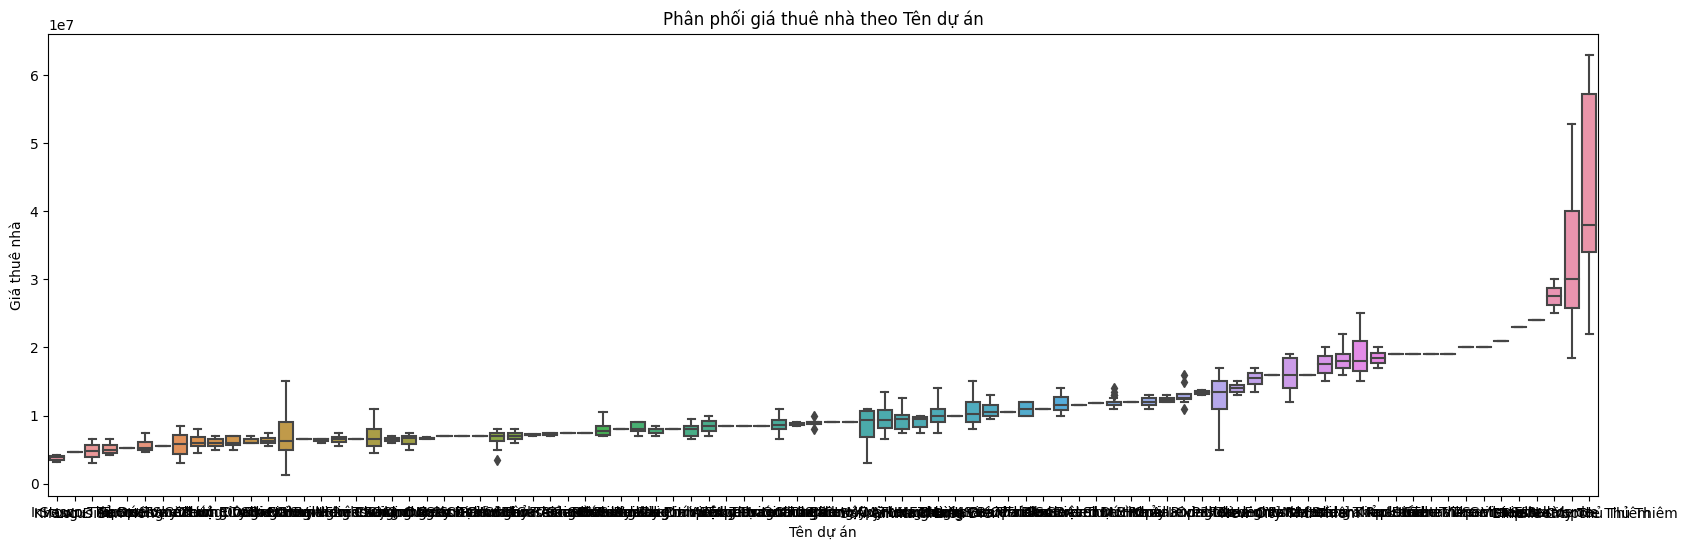

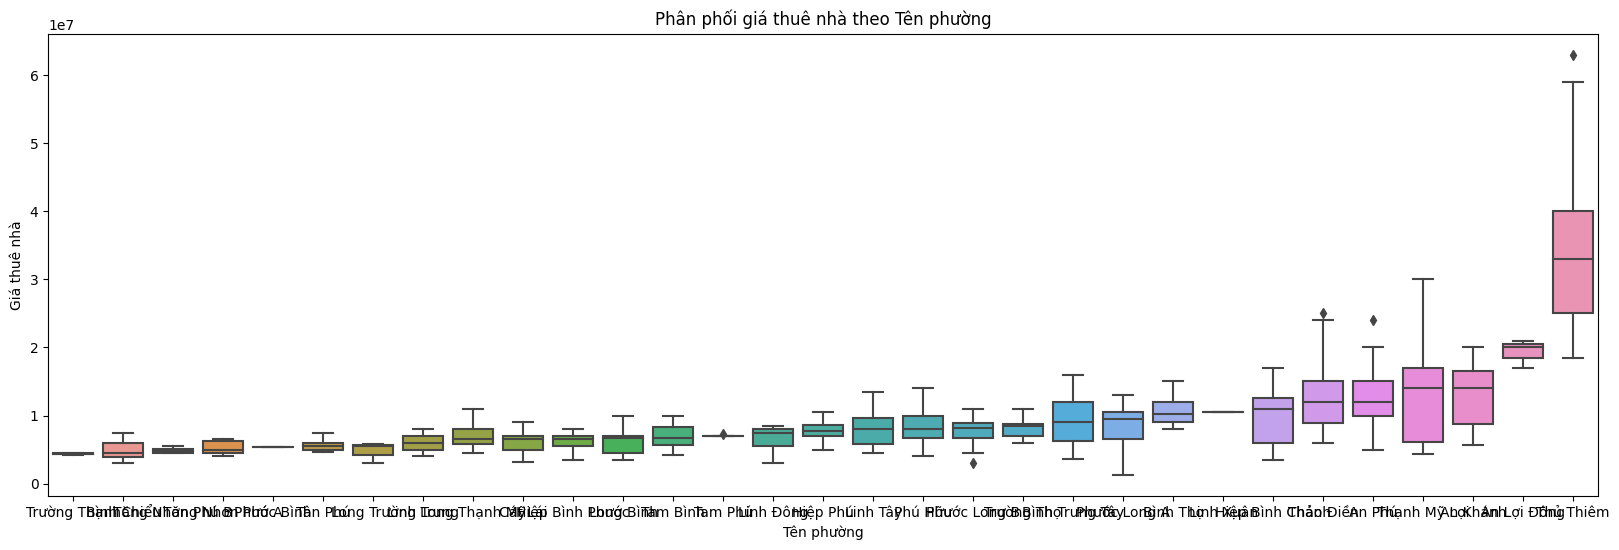

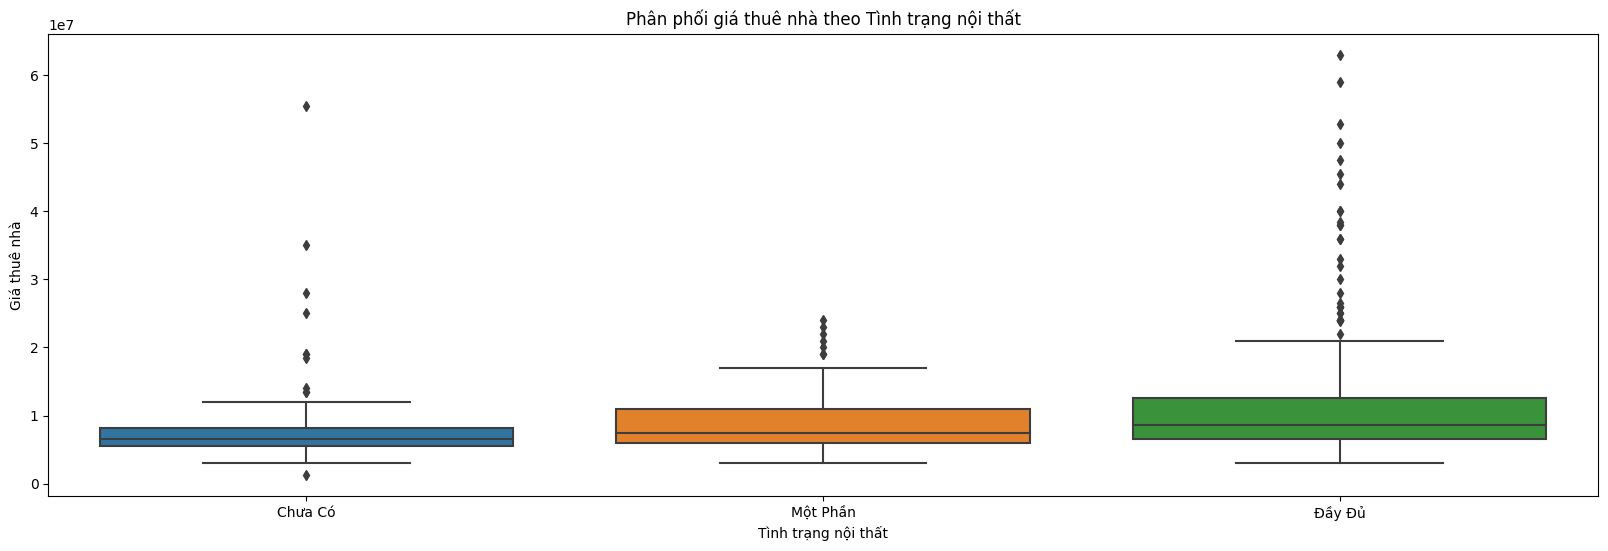

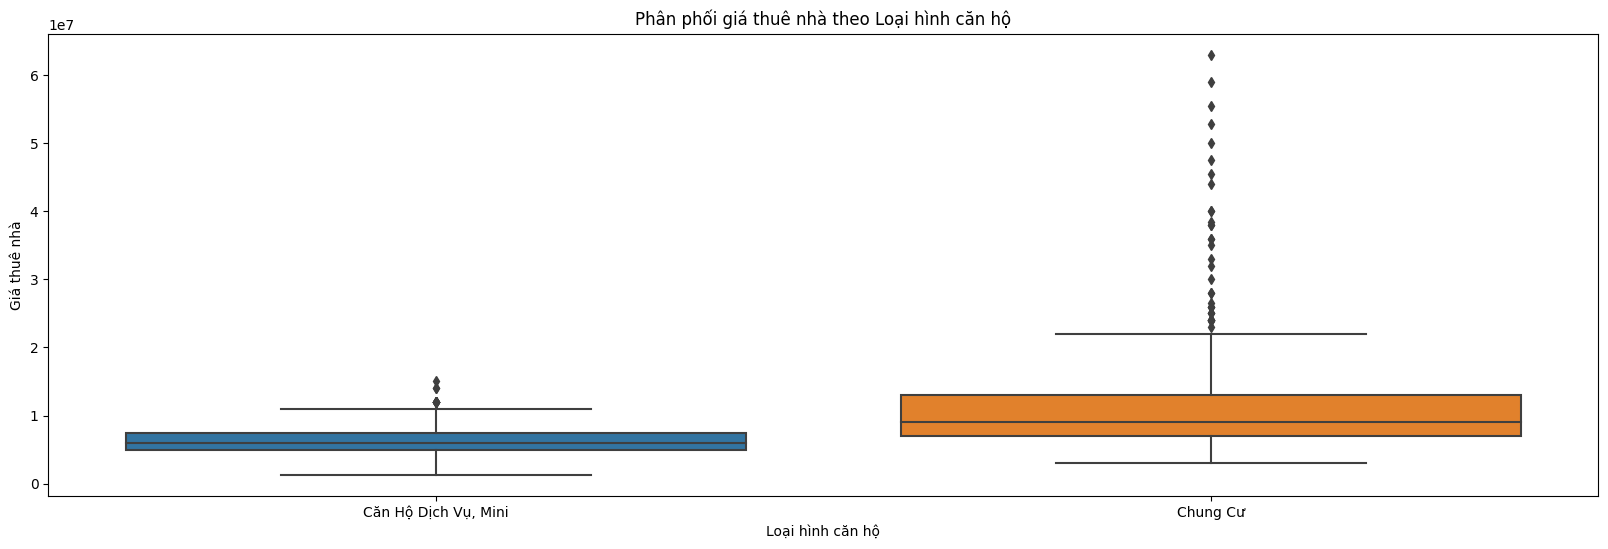

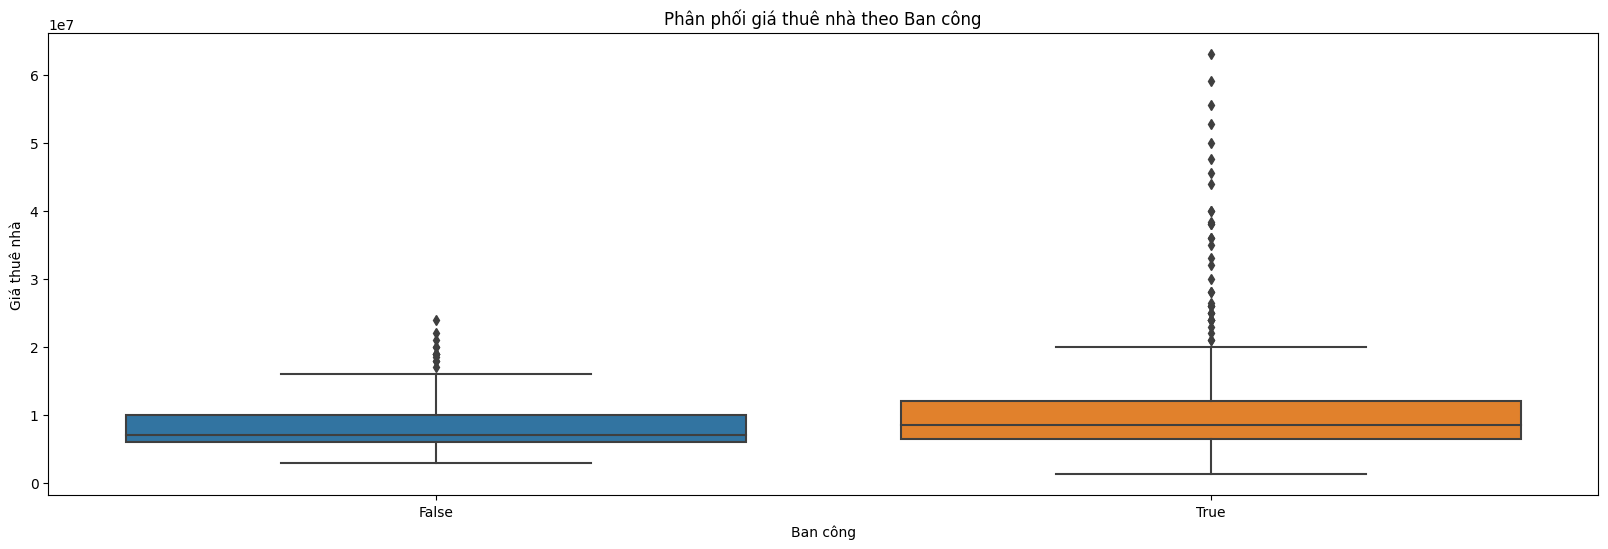

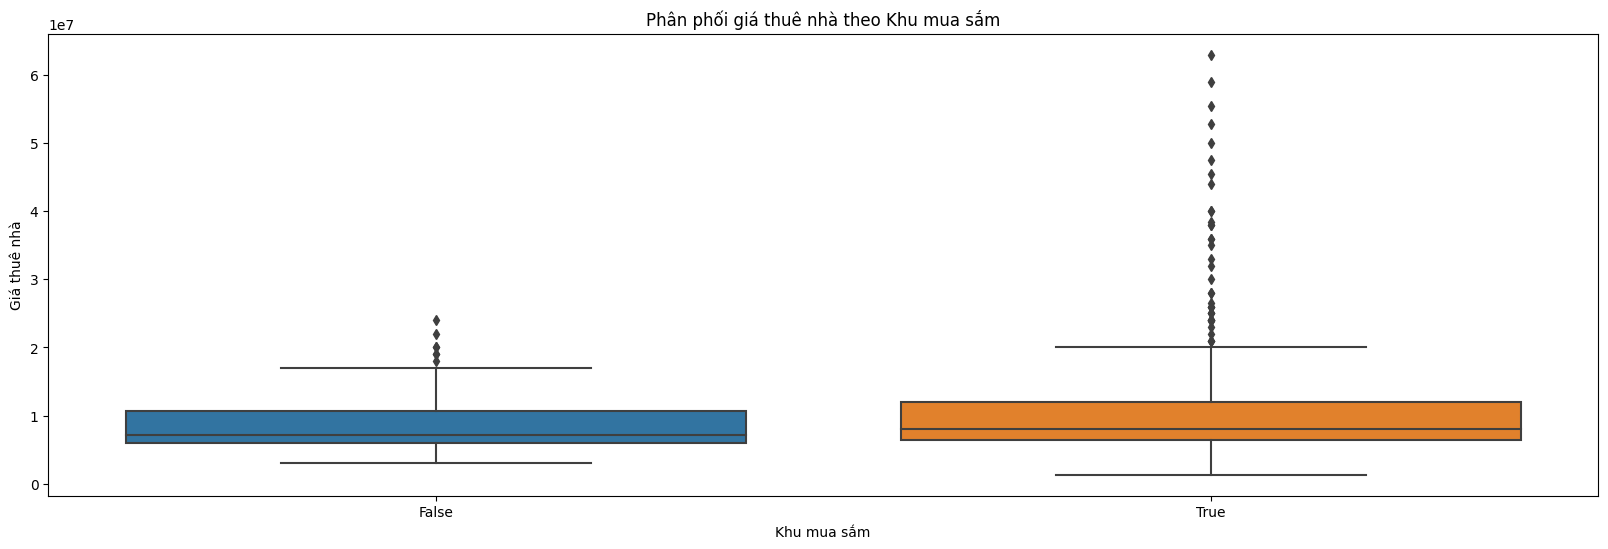

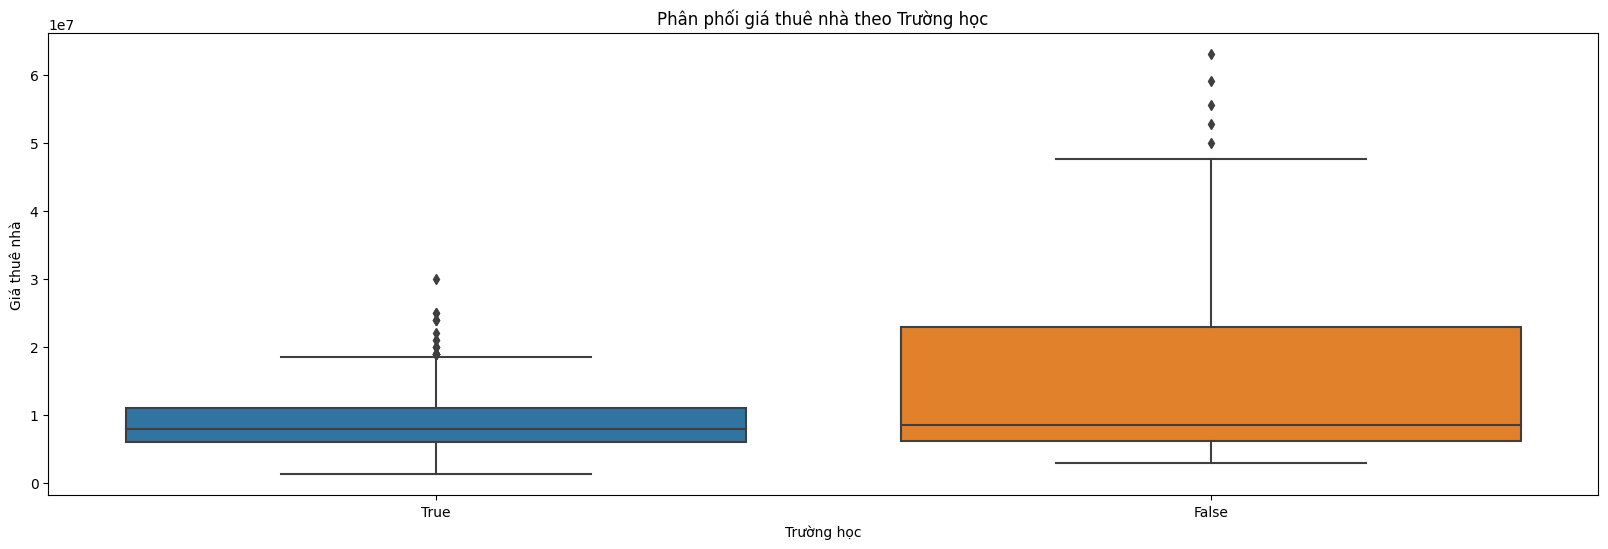

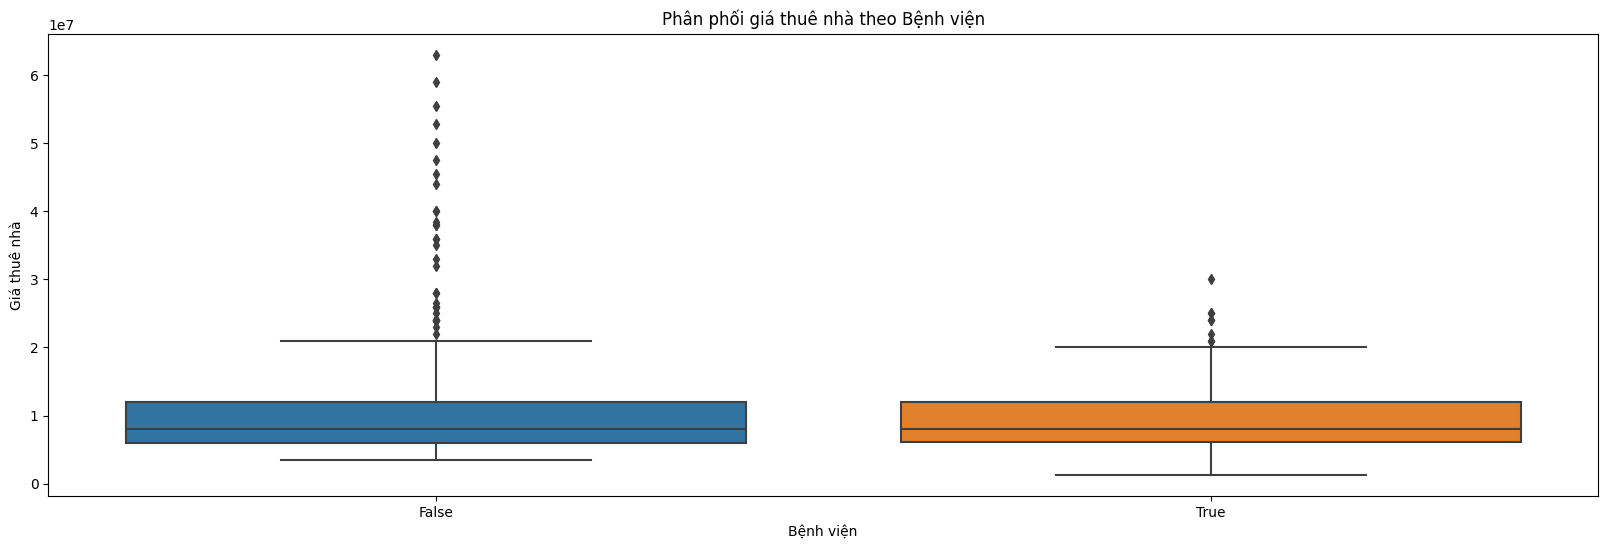

In [ ]:
for category in categorical_features:
    order = df_temp.groupby(category)['Giá cho thuê'].median().sort_values().index
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=category, y='Giá cho thuê', data=df_temp, order = order)
    plt.title(f'Phân phối giá thuê nhà theo {category}')
    plt.xlabel(category)
    plt.ylabel('Giá thuê nhà')
    plt.show()

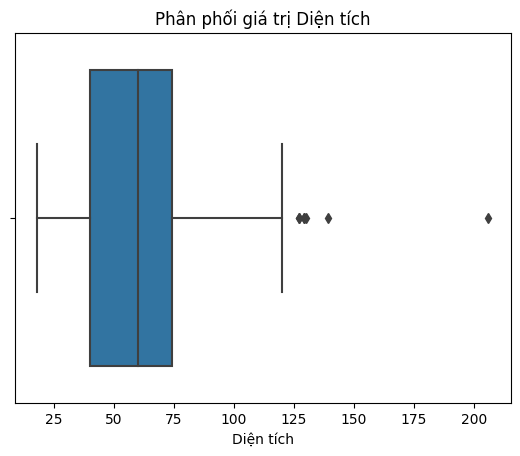

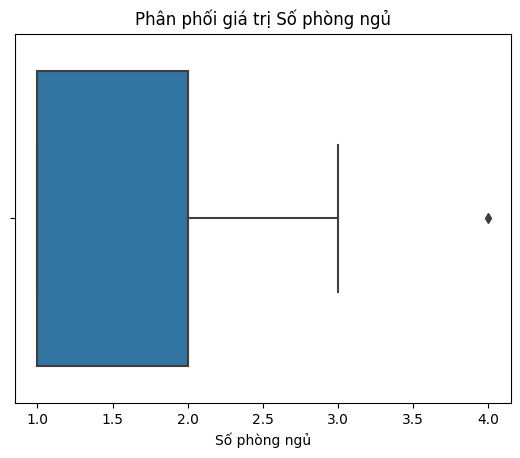

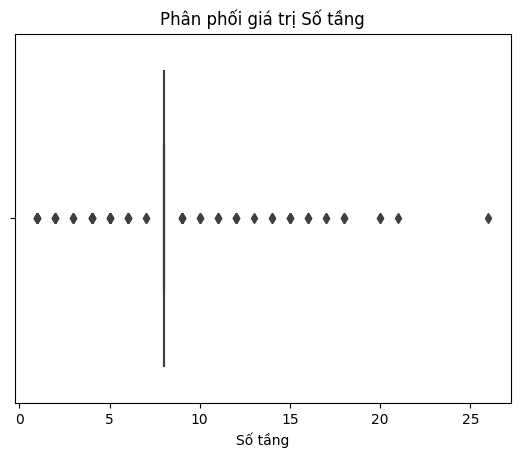

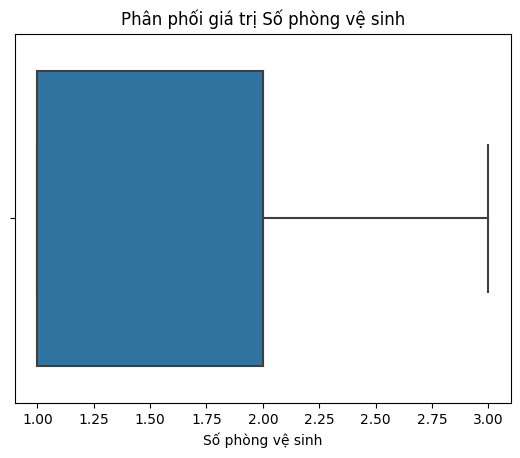

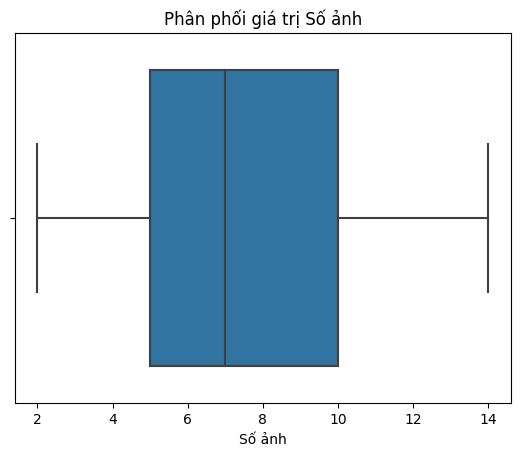

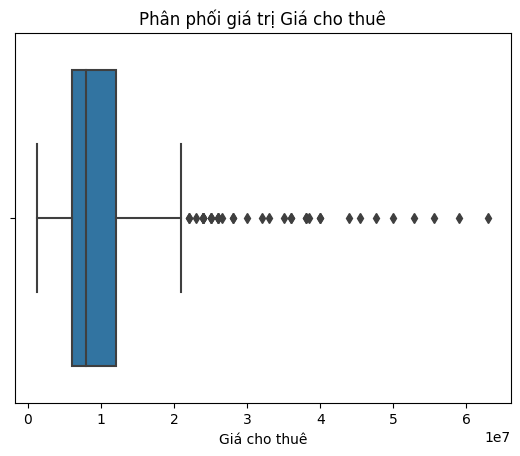

In [ ]:
for col in numeric_features:
    sns.boxplot(x=df_temp[col])
    plt.title(f'Phân phối giá trị {col}')
    plt.show()

In [ ]:
df = df_temp.copy()

## Numerical Data

Mean: 60.41752577319588
Median: 60.0
Mode: 40
mean_deviation 0.0069106731507550595
mode_deviation 0.3333333333333333


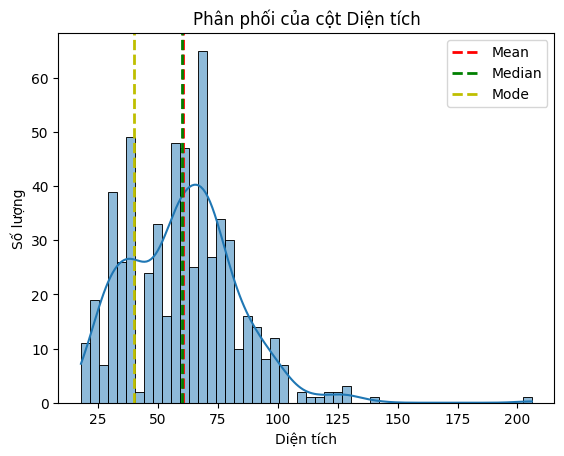

Mean: 1.7199312714776633
Median: 2.0
Mode: 2
mean_deviation 0.14003436426116833
mode_deviation 0.0


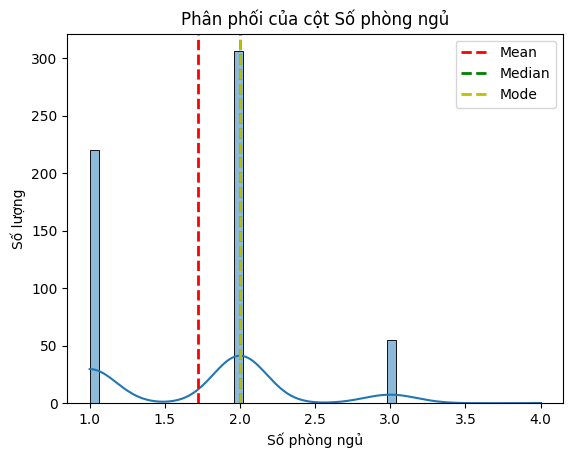

Mean: 8.080756013745704
Median: 8.0
Mode: 8.0
mean_deviation 0.009993621092919378
mode_deviation 0.0


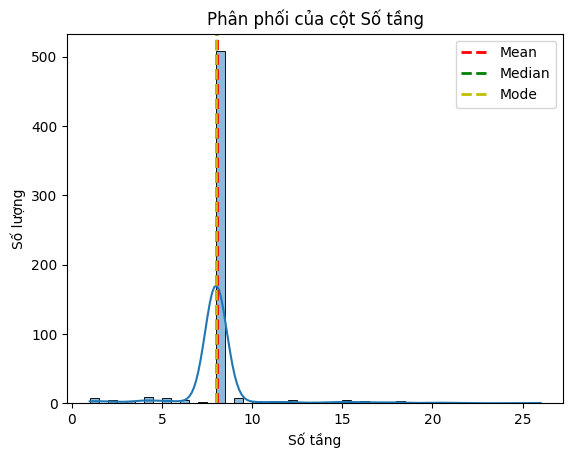

Mean: 1.529209621993127
Median: 2.0
Mode: 2
mean_deviation 0.23539518900343648
mode_deviation 0.0


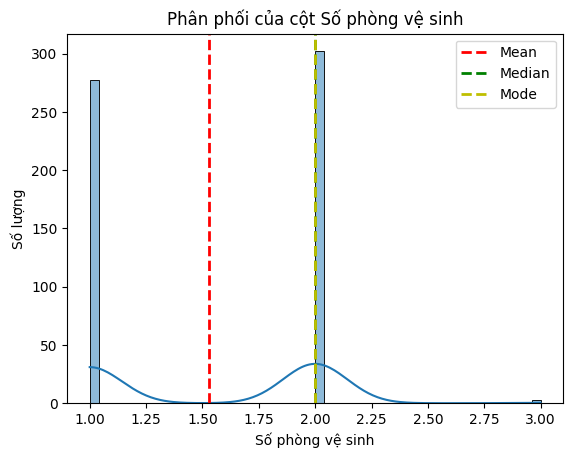

Mean: 7.302405498281787
Median: 7.0
Mode: 5
mean_deviation 0.04141176470588233
mode_deviation 0.2857142857142857


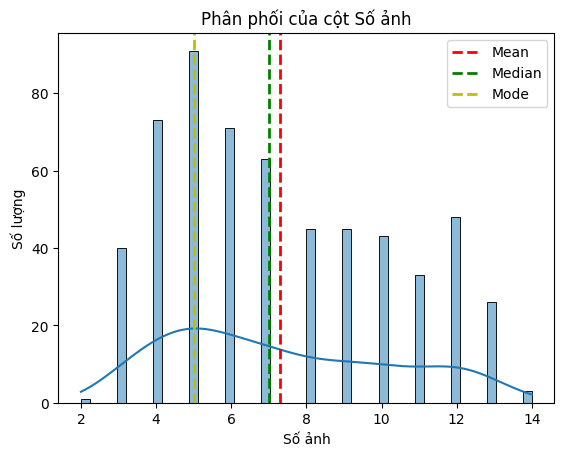

Mean: 10400807.560137456
Median: 8000000.0
Mode: 7000000
mean_deviation 0.23082895691089272
mode_deviation 0.125


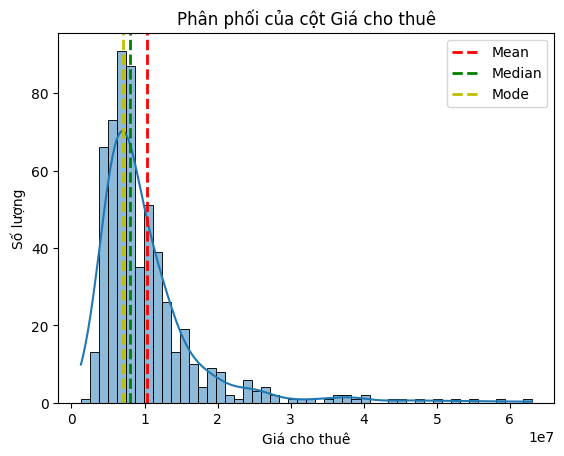

In [ ]:
column_name = ['Diện tích', 'Số phòng ngủ', 'Số tầng', 'Số phòng vệ sinh', 'Số ảnh', 'Giá cho thuê']

def kiemTraCacBien(array, data):
    d = {}

    #viết vòng lặp for duyệt qua từng biến
    for col in array:
        result = KiemTraMotBien(col, data, 0.2)
        d[col] = result

    #giá trị trả về của hàm là dict: {tên cột: True/False}
    return d

def KiemTraMotBien(col, df, percent):
    # Tạo một DataFrame với biến số cần kiểm tra
    data = df[col]

    # Tính trung bình và trung vị
    mean = data.mean()
    median = data.median()
    mode = data.mode()

    if len(mode)==1:
        mode = mode[0]
        # Vẽ biểu đồ phân phối
        print('Mean:', mean)
        print('Median:', median)
        print('Mode:', mode)

        sns.histplot(data, kde=True, bins=50)
        plt.title(f'Phân phối của cột {col}')
        plt.xlabel(col)
        plt.ylabel('Số lượng')

        # Đánh dấu mean, mode, median bằng đường thẳng dọc
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label='Median')
        plt.axvline(mode, color='y', linestyle='dashed', linewidth=2, label='Mode')

        plt.legend()

        # Tính độ lệch từ trung bình và mode so với trung vị
        mean_deviation = abs(median-mean)/max(median,mean)
        mode_deviation = abs(median - mode)/max(median,mode)
        print('mean_deviation', mean_deviation)
        print('mode_deviation', mode_deviation)

        # Kiểm tra xem biến số có bị mất đối xứng
        if ((1-percent)*mean <= median <= (1+percent)*mean) and ((1-percent)*mode <= median <= (1+percent)*mode):
            result = "True"
        else:
            result = "False"

        plt.show()
        return result
    else:
        print(col, "has more than 1 mode\n")
        return False
res_dict = kiemTraCacBien(column_name, df)

##### Phân tích phân bố của các biến số
##### Cột diện tích:
- 50% giá trị diện tích nhỏ hơn 60m2 (median=60): Một nửa số lượng các căn hộ cho thuê khu vực Thủ Đức có diện tích nhỏ hơn 60m2.
- mode = 40: căn hộ có diện tích 40m2 là phổ biến nhất trong khu vực đang xét

##### Cột Số phòng ngủ:
- Các căn hộ cho thuê có 1 đến 2 phòng ngủ chiếm đa số trong khu vực.

##### Cột Số phòng vệ sinh
- Khu vực Thủ Đức phổ biến cho thuê các căn hộ có 1 hoặc 2 phòng vệ sinh.

##### Cột giá cho thuê
- Giá cho thuê trung bình của khu vực Thủ Đức là khoảng 10tr4 (10400808)
- Các căn hộ cho thuê giá 7tr phổ biến nhất trong khu vực
- Một nửa các căn hộ cho thuê trong khu vực Thủ Đức có giá dưới 8tr


In [ ]:
print('Kết quả kiểm tra các biến số có đối xứng hay không:')
print('--------------------------------------------------\n')
for key, value in res_dict.items():
    print(f'{key}: {value}')

Kết quả kiểm tra các biến số có đối xứng hay không:
--------------------------------------------------

Diện tích: False
Số phòng ngủ: True
Số tầng: True
Số phòng vệ sinh: False
Số ảnh: False
Giá cho thuê: False


#### Phân tích độ tương quan của các biến số với biến Giá cho thuê

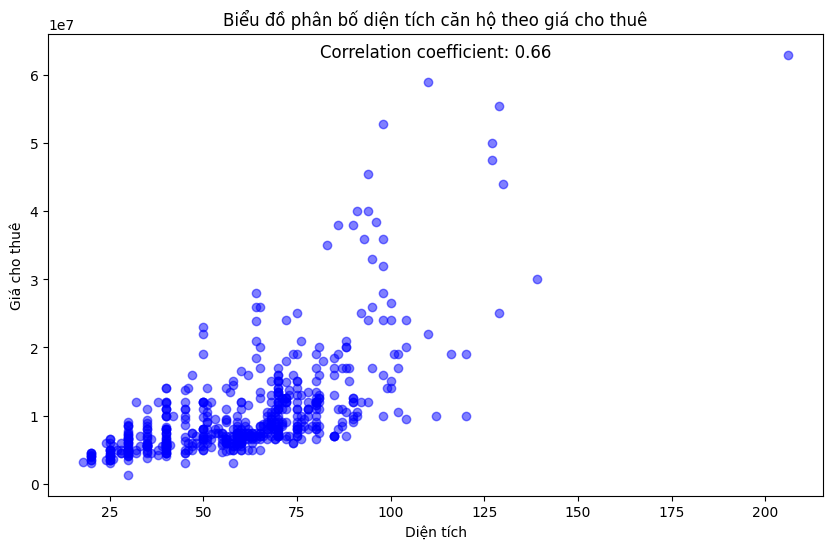

In [ ]:


# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Diện tích'], df['Giá cho thuê'], color='blue', alpha=0.5, label='Data points')

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(df['Diện tích'], df['Giá cho thuê'])[0, 1]

# Annotate the correlation coefficient on the plot
plt.annotate(f'Correlation coefficient: {correlation_coefficient:.2f}',
             xy=(0.5, 0.95),
             xycoords='axes fraction',
             ha='center',
             fontsize=12)

# Set labels and title
plt.xlabel("Diện tích")
plt.ylabel("Giá cho thuê")
plt.title("Biểu đồ phân bố diện tích căn hộ theo giá cho thuê")

# Show the plot
plt.show()


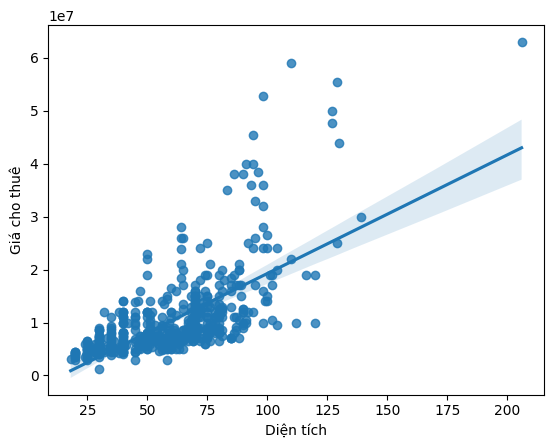

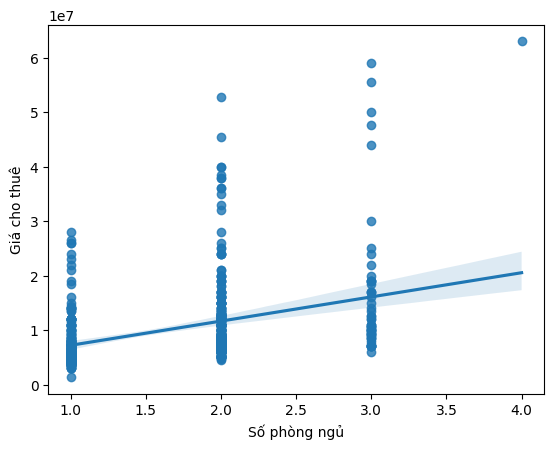

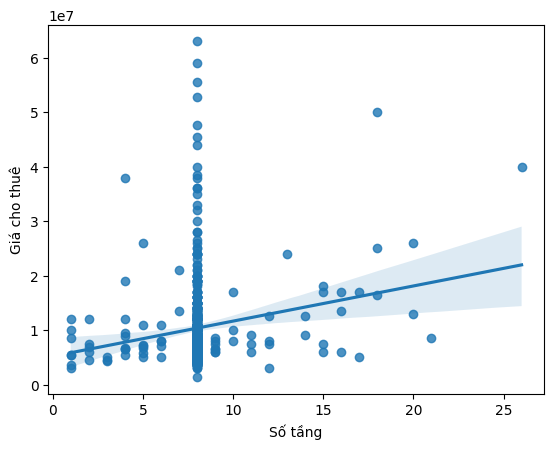

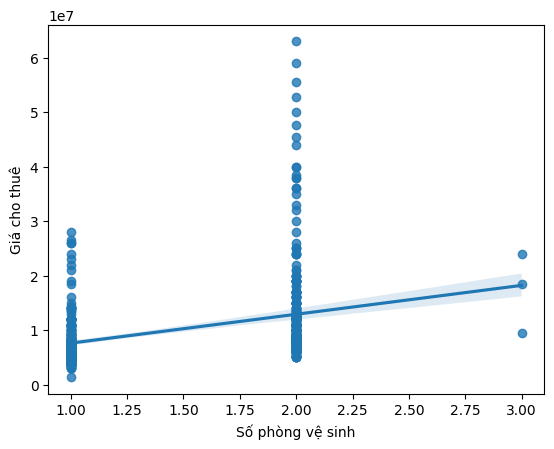

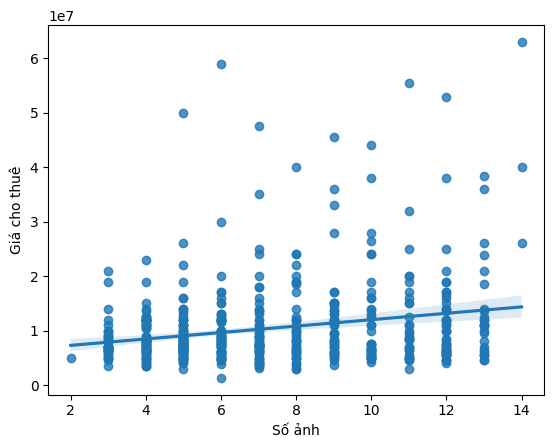

In [ ]:
column_name = ['Diện tích', 'Số phòng ngủ', 'Số tầng', 'Số phòng vệ sinh', 'Số ảnh']
for col in column_name:
    sns.regplot(x=col, y='Giá cho thuê', data=df)
    plt.show()

In [ ]:
from scipy import stats
for col in column_name:
    r, p = stats.pearsonr(df[col],df['Giá cho thuê']) #r: ảnh hưởng theo regplot, p_value
    print(col, "correlation coefficient:", r)
    print("P-Value:", p)
    print("---")

Diện tích correlation coefficient: 0.6586101314084409
P-Value: 1.1721279590788302e-73
---
Số phòng ngủ correlation coefficient: 0.36405597232656894
P-Value: 1.114117447165049e-19
---
Số tầng correlation coefficient: 0.1786562388457086
P-Value: 1.4530544623799514e-05
---
Số phòng vệ sinh correlation coefficient: 0.34969226697413824
P-Value: 3.497186044188543e-18
---
Số ảnh correlation coefficient: 0.22622351625481912
P-Value: 3.438121757527715e-08
---


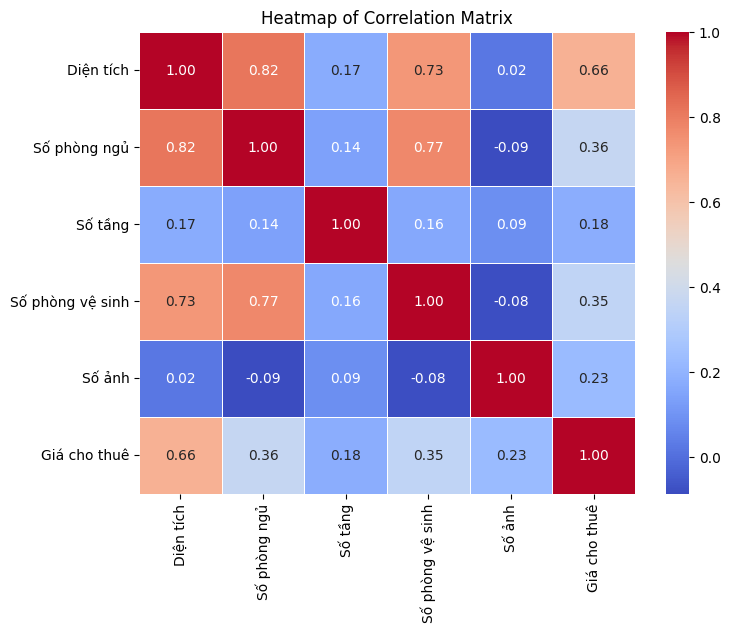

In [ ]:
correlation_matrix = df.select_dtypes(exclude=['object','bool']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Mức độ tương quan của các biến số đến giá cho thuê của căn hộ tại khu vực Thủ Đức được xếp theo thứ tự giảm dần:
- Diện tích - Tương quan mạnh (0.66)
- Số phòng ngủ - Tương quan yếu (0.36)
- Số phòng vệ sinh - Tương quan yếu (0.35)
- Số tầng và Số ảnh - Không tương quan.

#### Phân tích cột số phòng ngủ và số phòng vệ sinh

In [ ]:
df_test = df[['Số phòng ngủ', 'Số phòng vệ sinh', 'Giá cho thuê']]
df_test

Số phòng ngủ  Số phòng vệ sinh  Giá cho thuê
0               2                 2      12000000
1               2                 2      12000000
2               2                 2      11000000
3               2                 2      10000000
4               2                 2      10000000
..            ...               ...           ...
577             1                 1       7200000
578             1                 1       5500000
579             1                 1       5000000
580             1                 1       7400000
581             3                 2      12000000

[582 rows x 3 columns]

<ipython-input-39-e198a829e0b3>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df_group.pivot('Số phòng ngủ', 'Số phòng vệ sinh', 'Count')


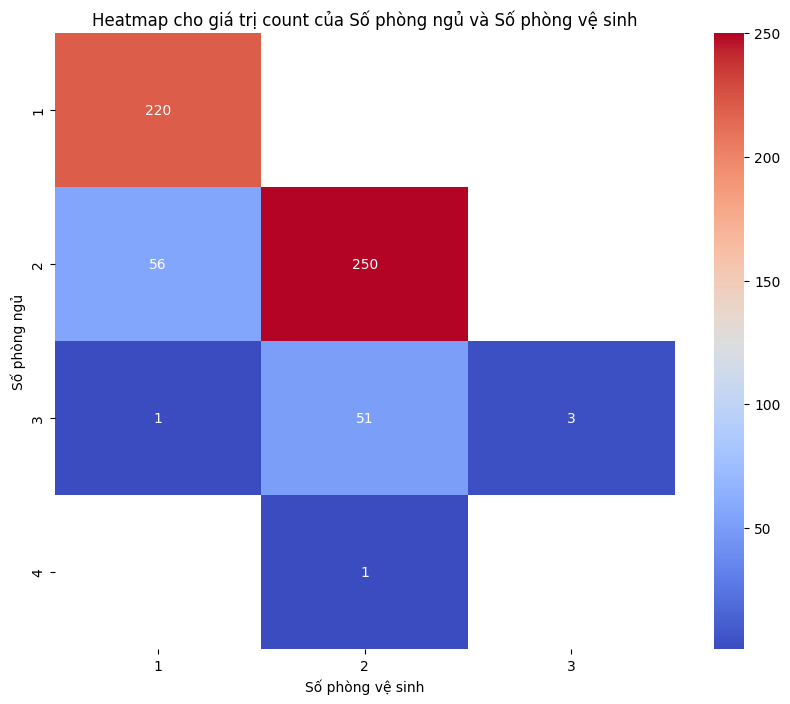

In [ ]:
df_group = df_test.groupby(['Số phòng ngủ', 'Số phòng vệ sinh'])['Giá cho thuê'].count().reset_index(name='Count')

# Chuyển dữ liệu thành dạng pivot để sử dụng cho heatmap
heatmap_data = df_group.pivot('Số phòng ngủ', 'Số phòng vệ sinh', 'Count')

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap cho giá trị count của Số phòng ngủ và Số phòng vệ sinh')
plt.show()

Từ heatmap ta thấy, căn hộ gồm 2 phòng ngủ, 2 nhà vệ sinh và căn hộ gồm 1 phòng ngủ, 1 nhà vệ sinh được cho thuê nhiều nhất trong khu vực

In [ ]:
mean_prices = df_test.groupby(['Số phòng ngủ', 'Số phòng vệ sinh'])['Giá cho thuê'].mean().reset_index(name='Mean')

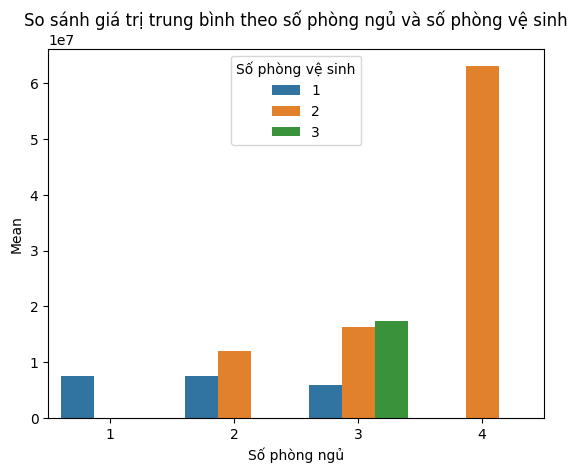

In [ ]:
sns.barplot(x='Số phòng ngủ', y='Mean', hue='Số phòng vệ sinh', data=mean_prices)
plt.title('So sánh giá trị trung bình theo số phòng ngủ và số phòng vệ sinh')
plt.show()

Cùng số phòng ngủ, giá cho thuê tăng lên theo số lượng phòng vệ sinh

## Categorical Data

In [ ]:
df2 = df.select_dtypes(exclude=['number'])
df2['Giá cho thuê'] = df['Giá cho thuê']
df2

Tên dự án       Tên phường Tình trạng nội thất  \
0    4S Riverside Garden  Hiệp Bình Chánh              Đầy Đủ   
1    4S Riverside Garden  Hiệp Bình Chánh              Đầy Đủ   
2    4S Riverside Garden  Hiệp Bình Chánh              Đầy Đủ   
3    4S Riverside Garden  Hiệp Bình Chánh              Đầy Đủ   
4    4S Riverside Garden  Hiệp Bình Chánh              Đầy Đủ   
..                   ...              ...                 ...   
577        Vạn Phúc City  Hiệp Bình Phước              Đầy Đủ   
578        Vạn Phúc City  Hiệp Bình Phước              Đầy Đủ   
579        Vạn Phúc City  Hiệp Bình Phước              Đầy Đủ   
580        Vạn Phúc City  Hiệp Bình Phước              Đầy Đủ   
581             Đức Khải           An Phú              Đầy Đủ   

         Loại hình căn hộ  Ban công  Khu mua sắm  Trường học  Bệnh viện  \
0                Chung Cư      True         True        True      False   
1                Chung Cư      True         True        True      False   
2                Chung Cư      True         True       False       True   
3                Chung Cư     False         True       False       True   
4                Chung Cư      True         True       False       True   
..                    ...       ...          ...         ...        ...   
577  Căn Hộ Dịch Vụ, Mini      True         True        True       True   
578  Căn Hộ Dịch Vụ, Mini      True         True        True       True   
579  Căn Hộ Dịch Vụ, Mini     False         True        True       True   
580  Căn Hộ Dịch Vụ, Mini      True         True        True       True   
581              Chung Cư      True         True       False       True   

     Giá cho thuê  
0        12000000  
1        12000000  
2        11000000  
3        10000000  
4        10000000  
..            ...  
577       7200000  
578       5500000  
579       5000000  
580       7400000  
581      12000000  

[582 rows x 9 columns]

#### Phân tích ANOVA

In [ ]:
from scipy.stats import f_oneway
categorical_columns = ['Tên dự án', 'Tên phường', "Tình trạng nội thất", 'Loại hình căn hộ',
                       'Ban công', 'Khu mua sắm', 'Trường học', 'Bệnh viện']
result_dict = { 'Variable': [],
                'F-statistic': [],
                'p-value': [],
                'Combined Score': []}


for col in categorical_columns:
    # Tạo một danh sách các giá trị unique của biến
    styles = df2[col].unique()

    # Tạo một từ điển để lưu trữ kết quả kiểm định Anova
    anova_results = {}

    # Thực hiện kiểm định Anova cho từng giá trị của biến
    for style in styles:
        group = df[df[col] == style]["Giá cho thuê"]
        anova_results[style] = group

    f_statistic, p_value = f_oneway(*anova_results.values())

    # Tính điểm tổng hợp
    w = 0.5  # Cân nhắc giữa F-statistic và p-value
    combined_score = w * f_statistic - (1 - w) * p_value
    result_dict['Variable'].append(col)
    result_dict['F-statistic'].append(f_statistic)
    result_dict['p-value'].append(p_value)
    result_dict['Combined Score'].append(combined_score)

    # In kết quả
    print(f"Phân tích ANOVA cho biến phân loại: {col}")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    print("---")

Phân tích ANOVA cho biến phân loại: Tên dự án
F-statistic: 27.279297186016
p-value: 1.397244944114369e-141
---
Phân tích ANOVA cho biến phân loại: Tên phường
F-statistic: 45.396634479947
p-value: 2.56097895243744e-128
---
Phân tích ANOVA cho biến phân loại: Tình trạng nội thất
F-statistic: 7.746220631284751
p-value: 0.0004787178339363634
---
Phân tích ANOVA cho biến phân loại: Loại hình căn hộ
F-statistic: 58.8303509312555
p-value: 7.297473039325031e-14
---
Phân tích ANOVA cho biến phân loại: Ban công
F-statistic: 15.077376897219123
p-value: 0.00011506201304395124
---
Phân tích ANOVA cho biến phân loại: Khu mua sắm
F-statistic: 7.818246806546773
p-value: 0.005343556714770932
---
Phân tích ANOVA cho biến phân loại: Trường học
F-statistic: 80.31424004509455
p-value: 4.352232042315712e-18
---
Phân tích ANOVA cho biến phân loại: Bệnh viện
F-statistic: 11.114965453317845
p-value: 0.0009109553810225812
---


In [ ]:
# Sắp xếp biến phân loại theo điểm tổng hợp giảm dần
results = pd.DataFrame(result_dict)
results = results.sort_values(by='Combined Score', ascending=False)

# In kết quả
print(results)

              Variable  F-statistic        p-value  Combined Score
6           Trường học    80.314240   4.352232e-18       40.157120
3     Loại hình căn hộ    58.830351   7.297473e-14       29.415175
1           Tên phường    45.396634  2.560979e-128       22.698317
0            Tên dự án    27.279297  1.397245e-141       13.639649
4             Ban công    15.077377   1.150620e-04        7.538631
7            Bệnh viện    11.114965   9.109554e-04        5.557027
5          Khu mua sắm     7.818247   5.343557e-03        3.906452
2  Tình trạng nội thất     7.746221   4.787178e-04        3.872871


Điểm tổng hợp (combined score) trong phân tích ANOVA ở đoạn code trên có ý nghĩa để kết hợp cả hai yếu tố chính khi xác định biến phân loại nào ảnh hưởng nhiều nhất tới giá thuê nhà. Hai yếu tố chính này là F-statistic và p-value:

* F-statistic: Là một thước đo của sự khác biệt giữa các phân nhóm dựa trên biến phân loại. Giá trị F-statistic cao hơn cho thấy sự khác biệt lớn giữa các phân nhóm và cơ hội rằng biến phân loại này ảnh hưởng đến biến phụ thuộc.

* p-value: Là giá trị xác suất đo lường mức độ mà biến phân loại ảnh hưởng đến biến phụ thuộc. Giá trị p-value thấp hơn cho thấy có một khác biệt có ý nghĩa thống kê giữa các phân nhóm.

Do vậy giá trị Combine Score càng cao thì biến phân loại ảnh hưởng tới giá thuê nhà càng nhiều. Sắp xếp theo thứ tự giảm dần của Combine Score ta thấy 3 biến: Trường học, Loại hình căn hộ và Tên phường có ảnh hưởng đến giá thuê nhà nhiều nhất.


#### So sánh giá thuê nhà theo loại hình căn hộ ở từng phường

<ipython-input-45-ba62d82c4c74>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tên phường', y='Giá cho thuê', hue='Loại hình căn hộ', data=df, palette='Set2', ci=None)


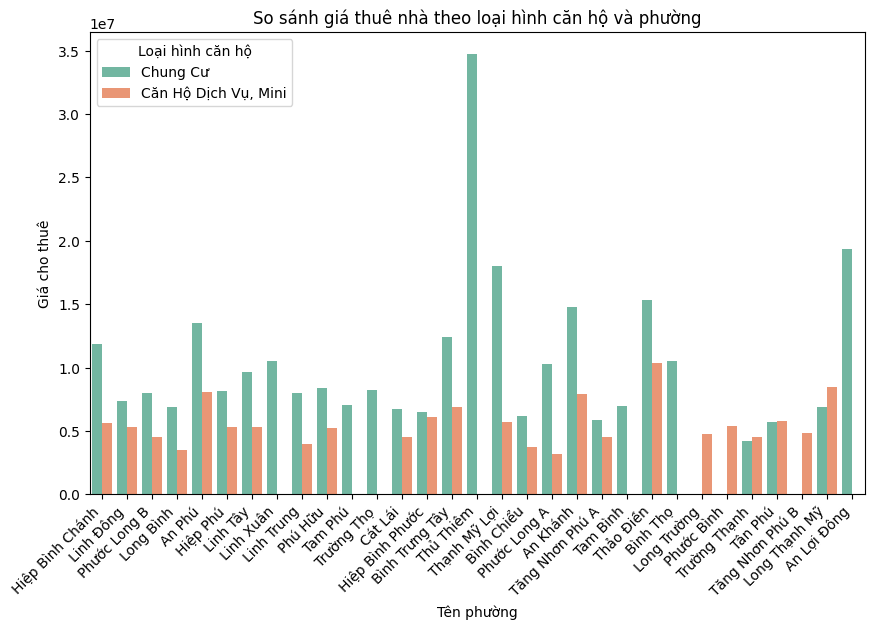

In [ ]:
# Vẽ biểu đồ cột nhóm
plt.figure(figsize=(10, 6))
sns.barplot(x='Tên phường', y='Giá cho thuê', hue='Loại hình căn hộ', data=df, palette='Set2', ci=None)
plt.title('So sánh giá thuê nhà theo loại hình căn hộ và phường')
plt.xlabel('Tên phường')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Giá cho thuê')
plt.show()

## Visualize Data

Biểu đồ số lượng căn hộ theo loại hình căn hộ

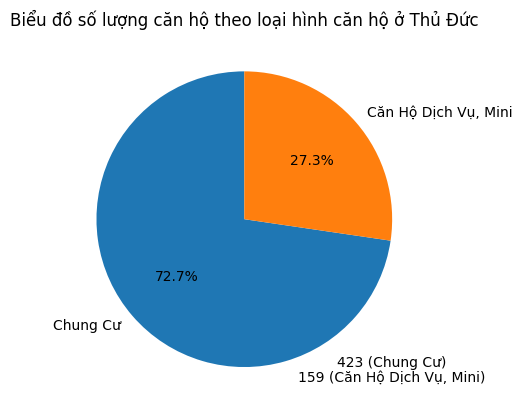

In [ ]:
dftest0=df.copy()

count_by_type = dftest0['Loại hình căn hộ'].value_counts()

# Create a pie chart
plt.pie(count_by_type, labels=count_by_type.index, autopct='%1.1f%%', startangle=90)
for i, count in enumerate(count_by_type):
    plt.text(x=1, y=-1 - i * 0.1, s=f'{count} ({count_by_type.index[i]})', ha='center')
# Add value counts as labels

plt.title('Biểu đồ số lượng căn hộ theo loại hình căn hộ ở Thủ Đức')
plt.show()

Biểu đồ số lượng căn hộ theo phường

<ipython-input-124-3041fe8ad3ca>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(average_prices.index, rotation=45, ha='right')


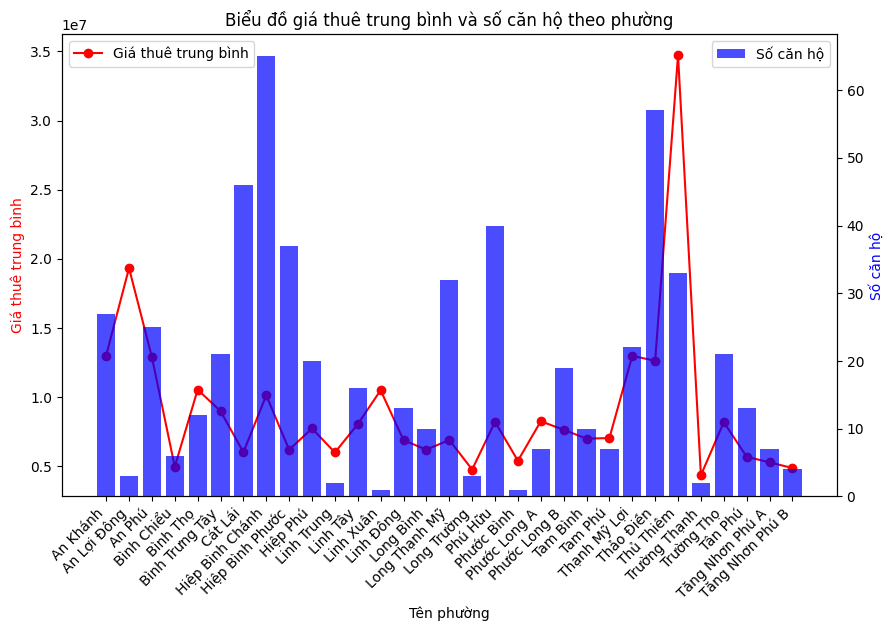

In [ ]:
dftest=df.copy()
average_prices = dftest.groupby('Tên phường')['Giá cho thuê'].mean().sort_index()
apartment_counts = dftest['Tên phường'].value_counts().sort_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
# Line plot for average rent prices
ax1.plot(average_prices.index, average_prices, marker='o', linestyle='-', color='red', label='Giá thuê trung bình')
ax1.set_xlabel("Tên phường")
ax1.set_ylabel("Giá thuê trung bình", color='red')
ax1.legend(loc='upper left')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Bar plot for the number of apartments
ax2.bar(apartment_counts.index, apartment_counts, color='blue', alpha=0.7, label='Số căn hộ')
ax2.set_ylabel("Số căn hộ", color='blue')
ax2.legend(loc='upper right')
ax1.set_xticklabels(average_prices.index, rotation=45, ha='right')
# Adding labels and title
ax1.set_title("Biểu đồ giá thuê trung bình và số căn hộ theo phường")

# Show the plot
plt.show()

Biểu đồ phân bố diện tích của 1 phường cụ thể

In [ ]:
condition = df['Tên phường'] == 'Hiệp Bình Chánh'
dftest1 = dftest[condition].copy()

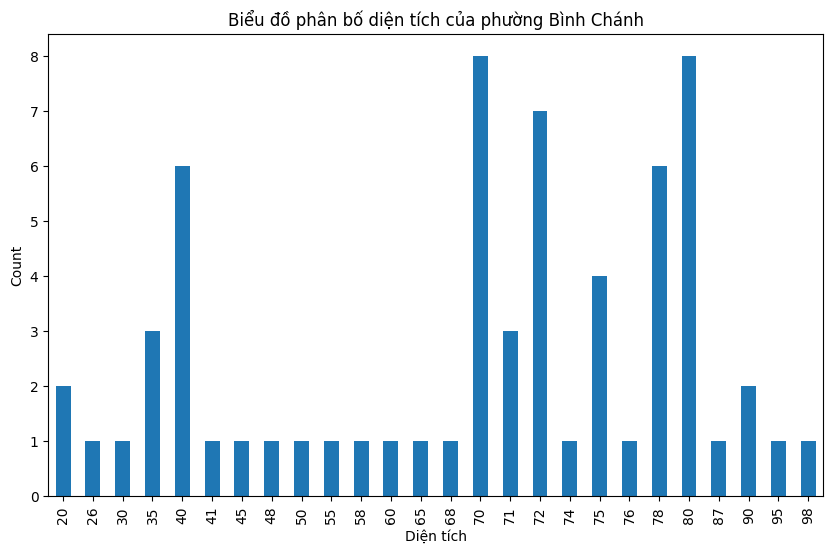

In [ ]:
top_values_counts = dftest1['Diện tích'].value_counts().sort_index()
# Plot the top 10 value counts
plt.figure(figsize=(10, 6))
top_values_counts.plot(kind='bar')
plt.xlabel('Diện tích')
plt.ylabel('Count')
plt.title('Biểu đồ phân bố diện tích của phường Bình Chánh')
plt.show()

Biểu đồ diện tích phân bố theo loại hình căn hộ

In [ ]:
dftest2=df.copy()
dftest2['Loại hình căn hộ'].value_counts()

Chung Cư                423
Căn Hộ Dịch Vụ, Mini    159
Name: Loại hình căn hộ, dtype: int64

In [ ]:
condition = df['Loại hình căn hộ'] == 'Chung Cư'
dftest2 = dftest2[condition].copy()


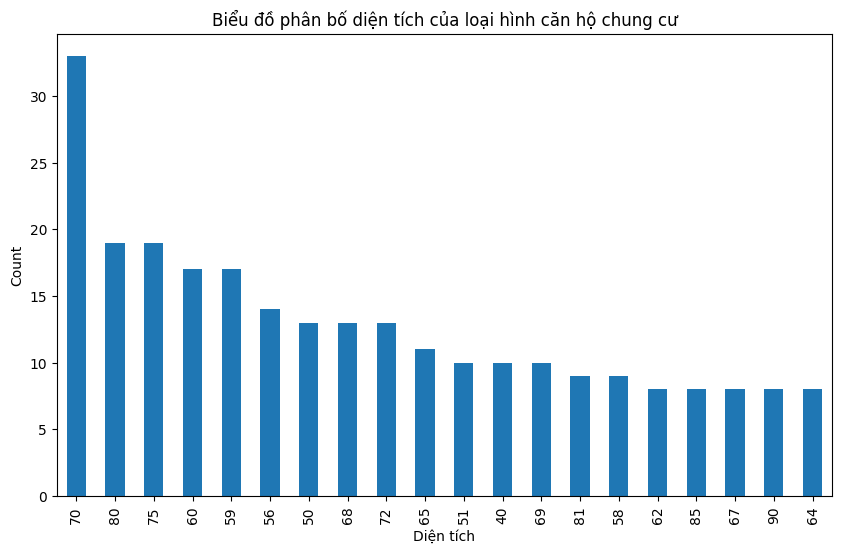

In [ ]:
top_values_counts = dftest2['Diện tích'].value_counts().head(20)
# Plot the top 10 value counts
plt.figure(figsize=(10, 6))
top_values_counts.plot(kind='bar')
plt.xlabel('Diện tích')
plt.ylabel('Count')
plt.title('Biểu đồ phân bố diện tích của loại hình căn hộ chung cư')
plt.show()

Biểu đồ phân bố số phòng ngủ và số phòng vệ sinh của loại phòng có diện tích cụ thể

In [ ]:
dftest4=df.copy()

In [ ]:
column_to_search = 'Số phòng ngủ'
value_to_find = 3
dftest4[dftest4[column_to_search] == value_to_find]

Diện tích  Số phòng ngủ  Số tầng                Tên dự án  \
5           80             3      8.0   4S Riverside Linh Đông   
14          88             3      8.0         9 View Apartment   
15          87             3      8.0         9 View Apartment   
19         120             3      8.0                 Cantavil   
20          80             3      8.0    Centum Wealth Complex   
24          87             3      8.0    Centum Wealth Complex   
25          90             3     11.0    Centum Wealth Complex   
28          80             3      8.0     Chung Cư Flora Novia   
29          80             3      7.0     Chung Cư Flora Novia   
38         102             3      8.0  Chung Cư Opal Boulevard   
51          75             3      8.0           Chung Cư Sky 9   
78          85             3      8.0                Citi Home   
79          85             3      8.0                Citi Home   
80          85             3      8.0                Citi Home   
82          85             3      8.0                Citi Home   
102        130             3      8.0    Empire City Thủ Thiêm   
103        127             3     18.0    Empire City Thủ Thiêm   
119        127             3      8.0    Empire City Thủ Thiêm   
157         99             3      8.0        Jamila Khang Điền   
167         86             3      8.0             Lavita Charm   
201        100             3     13.0        Masteri Thảo Điền   
209         89             3      8.0     Moonlight Residences   
214        102             3      8.0       New City Thủ Thiêm   
218         89             3      8.0       New City Thủ Thiêm   
220         85             3      8.0       New City Thủ Thiêm   
221         86             3      8.0       New City Thủ Thiêm   
223        102             3      8.0       New City Thủ Thiêm   
272         55             3      8.0                     None   
381        110             3      8.0   One Verandah Mapletree   
390         87             3     15.0              Opal Garden   
396         98             3      8.0           Opal Riverside   
411         81             3      8.0          Paris Hoàng Kim   
421         90             3      8.0        Safira Khang Điền   
427         90             3      8.0        Safira Khang Điền   
430         77             3      8.0            Saigon Avenue   
432         77             3      8.0            Saigon Avenue   
433         87             3      8.0           Saigon Gateway   
437         91             3      8.0           Saigon Gateway   
442         91             3      8.0           Saigon Gateway   
465         70             3      8.0                St Moritz   
490         90             3      8.0              The Eastern   
491         98             3      8.0              The Eastern   
492        104             3      8.0              The Eastern   
494        112             3      8.0              The Eastern   
499        101             3      8.0                The Manor   
504        110             3      8.0  The Metropole Thủ Thiêm   
506        129             3      8.0  The Metropole Thủ Thiêm   
507        120             3      8.0               The Navita   
515         64             3      8.0             Topaz Home 2   
529         81             3      5.0      Vinhomes Grand Park   
532         81             3      8.0      Vinhomes Grand Park   
550         81             3      8.0      Vinhomes Grand Park   
551        129             3      8.0              Vista Verde   
552        139             3      8.0              Vista Verde   
581         94             3      4.0                 Đức Khải   

          Tên phường Tình trạng nội thất  Số phòng vệ sinh Loại hình căn hộ  \
5          Linh Đông            Một Phần                 2         Chung Cư   
14      Phước Long B            Một Phần                 2         Chung Cư   
15      Phước Long B              Đầy Đủ                 2         Chun

In [ ]:
condition = (df['Loại hình căn hộ'] == 'Chung Cư') & (df['Diện tích']>50) & (df['Diện tích']<70)
dftest4 = dftest4[condition].copy()


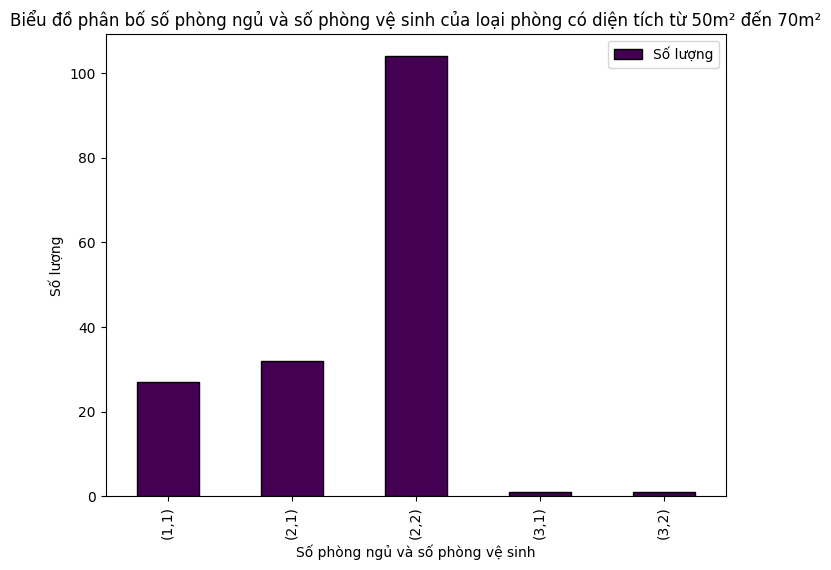

In [ ]:
combined_counts = dftest4.groupby(['Số phòng ngủ', 'Số phòng vệ sinh']).size().reset_index(name='Số lượng')

# Convert the combination of values to a string for plotting
combined_counts['Combination'] = combined_counts.apply(lambda row: f'({row["Số phòng ngủ"]},{row["Số phòng vệ sinh"]})', axis=1)

# Plotting combined value counts
combined_counts.plot(kind='bar', x='Combination', y='Số lượng', figsize=(8, 6), colormap='viridis', edgecolor='black')


plt.title('Biểu đồ phân bố số phòng ngủ và số phòng vệ sinh của loại phòng có diện tích từ 50m² đến 70m²')
plt.xlabel('Số phòng ngủ và số phòng vệ sinh')
plt.ylabel('Số lượng')
plt.show()

Biểu đồ phân bố giá cho thuê của các căn hộ Chung cư có diện tích cụ thể

In [ ]:
condition = (df['Loại hình căn hộ'] == 'Chung Cư') & (df['Diện tích']>50) & (df['Diện tích']<70)
dftest5 = df[condition].copy()


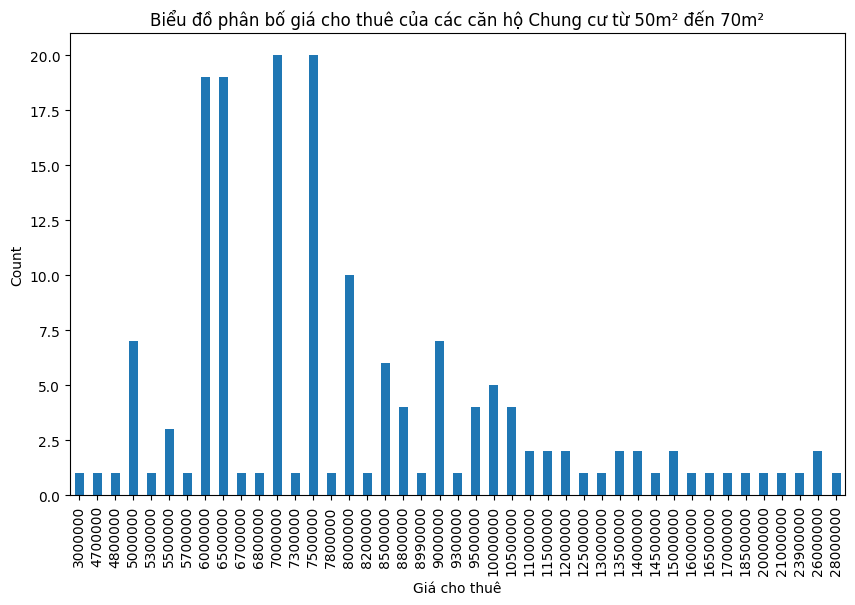

In [ ]:
top_values_counts = dftest5['Giá cho thuê'].value_counts()
# Plot the top 10 value counts
top_values_counts=top_values_counts.sort_index()
plt.figure(figsize=(10, 6))
top_values_counts.plot(kind='bar')
plt.xlabel('Giá cho thuê')
plt.ylabel('Count')
plt.title('Biểu đồ phân bố giá cho thuê của các căn hộ Chung cư từ 50m² đến 70m²')
plt.show()

Biểu đồ phân bố giá cho thuê ở một phường cụ thể

In [ ]:
condition = df['Tên phường'] == 'Hiệp Bình Chánh'
dftest6 = df[condition].copy()


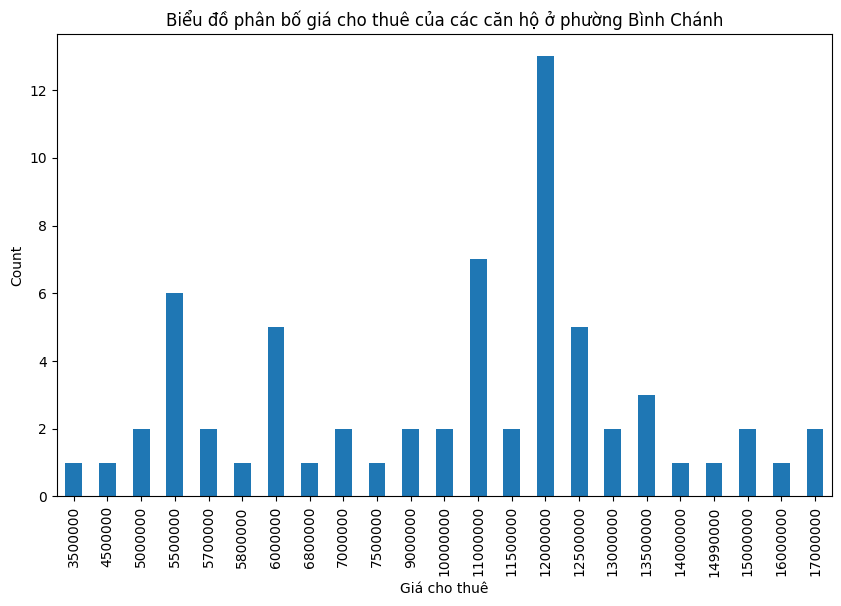

In [ ]:
top_values_counts = dftest6['Giá cho thuê'].value_counts()
# Plot the top 10 value counts
plt.figure(figsize=(10, 6))
top_values_counts = top_values_counts.sort_index()
top_values_counts.plot(kind='bar')
plt.xlabel('Giá cho thuê')
plt.ylabel('Count')
plt.title('Biểu đồ phân bố giá cho thuê của các căn hộ ở phường Bình Chánh')
plt.show()

Biểu đồ giá cho thuê trung bình của căn hộ chung cư theo phường

<ipython-input-138-099ff20c2ffe>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tên phường', y='Giá cho thuê', data=df_chung_cu, ci=None)  # ci=None để không hiển thị khoảng tin cậy


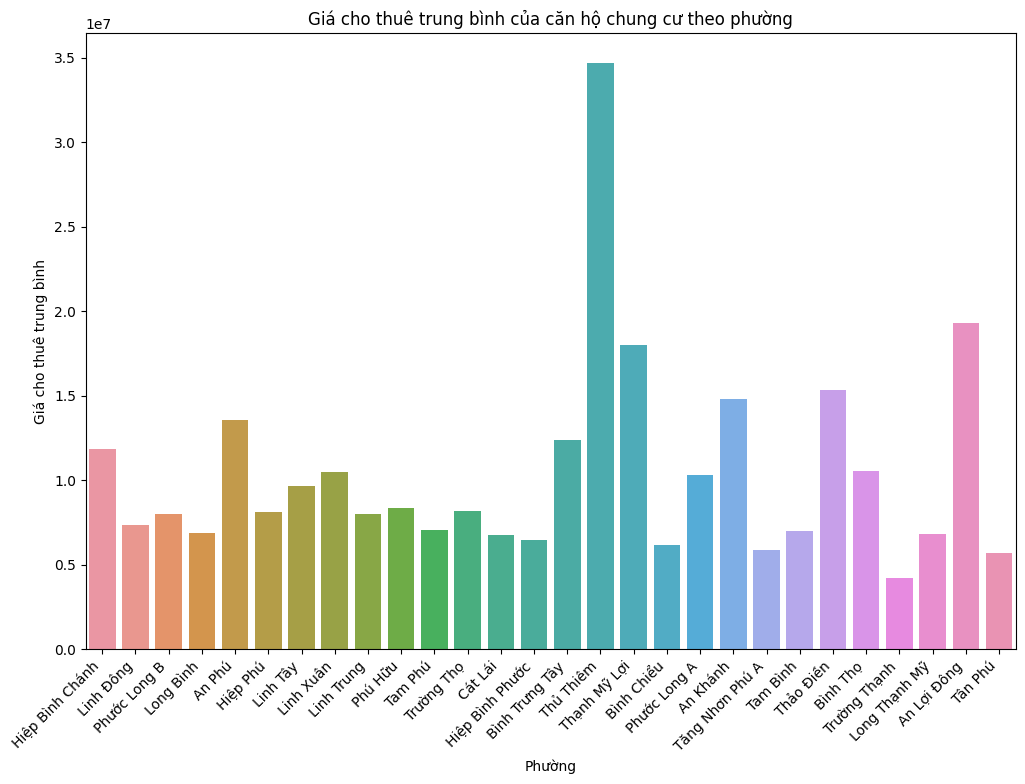

In [ ]:
df_chung_cu = df[df['Loại hình căn hộ'] == 'Chung Cư']
# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(x='Tên phường', y='Giá cho thuê', data=df_chung_cu, ci=None)  # ci=None để không hiển thị khoảng tin cậy
plt.title('Giá cho thuê trung bình của căn hộ chung cư theo phường')
plt.xlabel('Phường')
plt.ylabel('Giá cho thuê trung bình')
plt.xticks(rotation=45, ha='right')  # Đặt góc và hướng của nhãn phường
plt.show()

Biểu đồ phân phối giá thuê nhà của các nhà có và không có tất cả các tiện ích

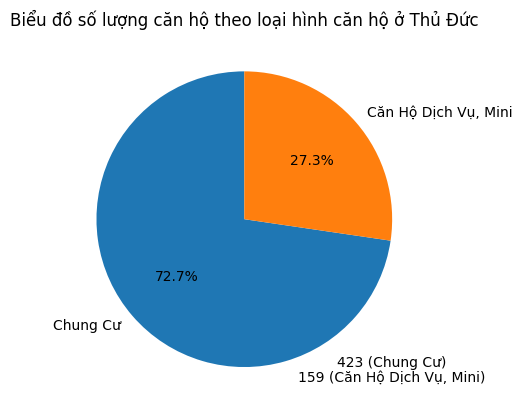

In [ ]:
dftest0=df.copy()

count_by_type = dftest0['Loại hình căn hộ'].value_counts()

# Create a pie chart
plt.pie(count_by_type, labels=count_by_type.index, autopct='%1.1f%%', startangle=90)
for i, count in enumerate(count_by_type):
    plt.text(x=1, y=-1 - i * 0.1, s=f'{count} ({count_by_type.index[i]})', ha='center')
# Add value counts as labels

plt.title('Biểu đồ số lượng căn hộ theo loại hình căn hộ ở Thủ Đức')
plt.show()

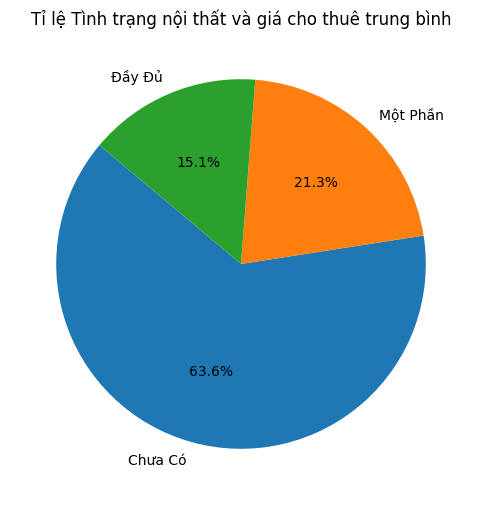

Tình trạng nội thất: Chưa Có, Giá cho thuê trung bình: 8607954.55, Số lượng: 370
Tình trạng nội thất: Một Phần, Giá cho thuê trung bình: 8861290.32, Số lượng: 124
Tình trạng nội thất: Đầy Đủ, Giá cho thuê trung bình: 11343162.16, Số lượng: 88


In [ ]:
avg_rental_by_furniture = df.groupby('Tình trạng nội thất')['Giá cho thuê'].mean()
count_by_furniture = df['Tình trạng nội thất'].value_counts()

# Vẽ biểu đồ pie chart
plt.figure(figsize=(12, 6))
plt.pie(count_by_furniture, labels=avg_rental_by_furniture.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ Tình trạng nội thất và giá cho thuê trung bình')
plt.show()

# Hiển thị giá cho thuê trung bình và số lượng cho mỗi giá trị trong 'Tình trạng nội thất'
for furniture_type, avg_rental, count in zip(avg_rental_by_furniture.index, avg_rental_by_furniture, count_by_furniture):
    print(f"Tình trạng nội thất: {furniture_type}, Giá cho thuê trung bình: {avg_rental:.2f}, Số lượng: {count}")


Bảng phân phối giá thuê nhà của các nhà có và không có tất cả các tiện ích

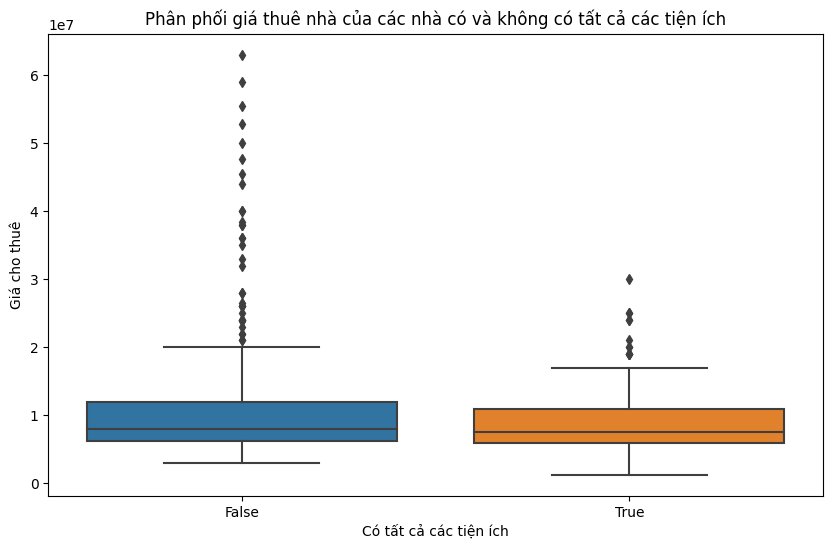

In [ ]:
df_conv = df.copy()
df_conv['All_Features'] = df_conv[['Ban công', 'Trường học', 'Bệnh viện', 'Khu mua sắm']].all(axis=1)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='All_Features', y='Giá cho thuê', data=df_conv)
plt.title('Phân phối giá thuê nhà của các nhà có và không có tất cả các tiện ích')
plt.xlabel('Có tất cả các tiện ích')
plt.ylabel('Giá cho thuê')
plt.show()

Biểu đồ giá cho thuê cao nhất theo số phòng ngủ và số phòng vệ sinh

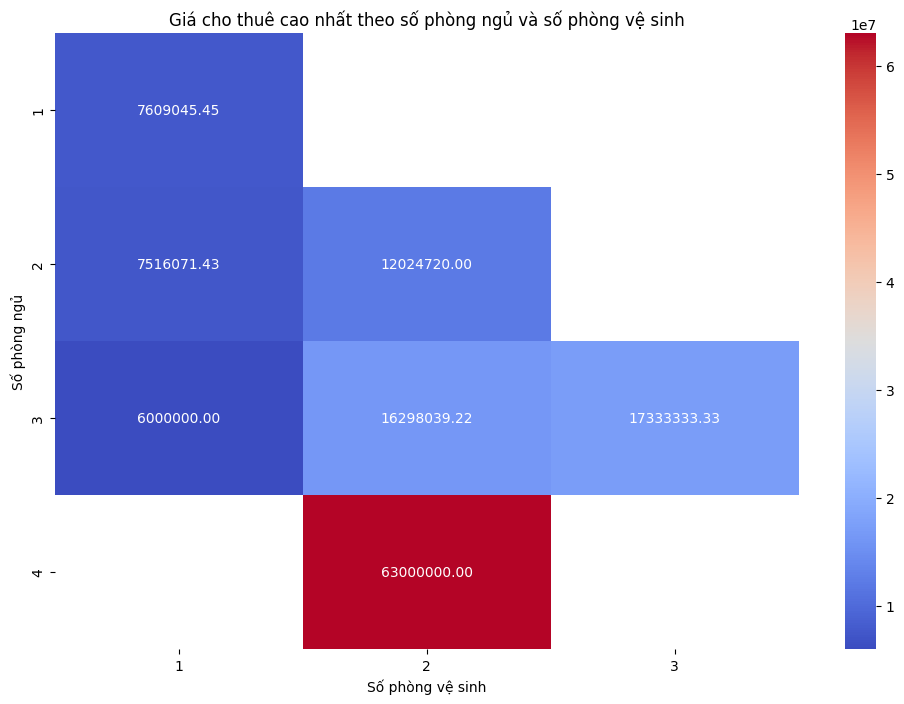

In [ ]:
heatmap_data = df_test.pivot_table(index='Số phòng ngủ', columns='Số phòng vệ sinh', values='Giá cho thuê', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Giá cho thuê cao nhất theo số phòng ngủ và số phòng vệ sinh')
plt.xlabel('Số phòng vệ sinh')
plt.ylabel('Số phòng ngủ')
plt.show()

## Mô hình đơn biến

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Best degree for column Diện tích: 2
R-squared train score for best degree: 0.5187562299316384
R-squared test score for best degree: 0.4472441589442002


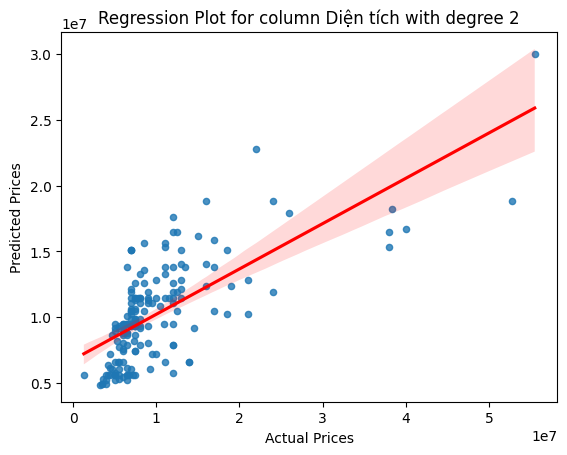

Best degree for column Số phòng ngủ: 2
R-squared train score for best degree: 0.18909552244825334
R-squared test score for best degree: 0.041769511482139365


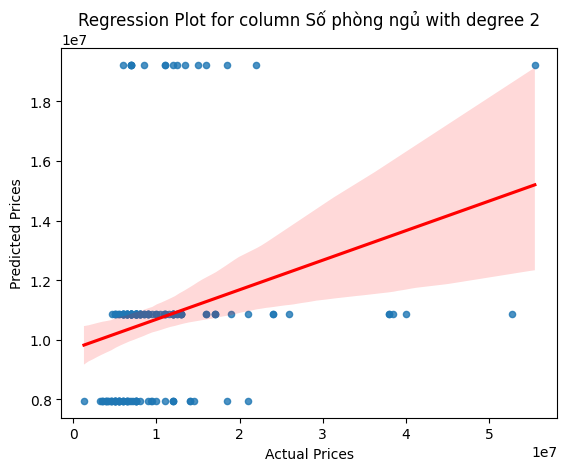

Best degree for column Số tầng: 3
R-squared train score for best degree: 0.021988109316188553
R-squared test score for best degree: 0.08481782200773968


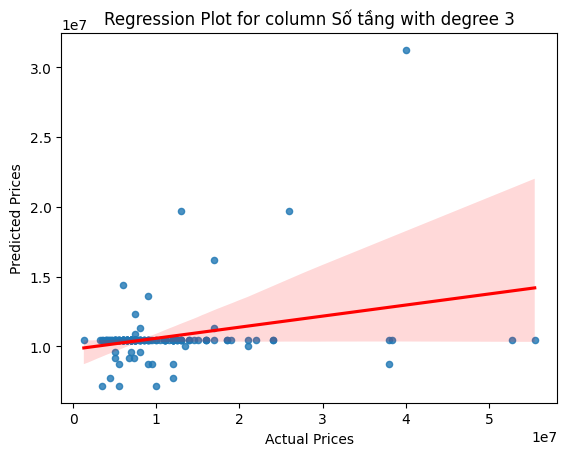

Best degree for column Tên dự án: 2
R-squared train score for best degree: 0.8297670055552001
R-squared test score for best degree: 0.7977076119212064


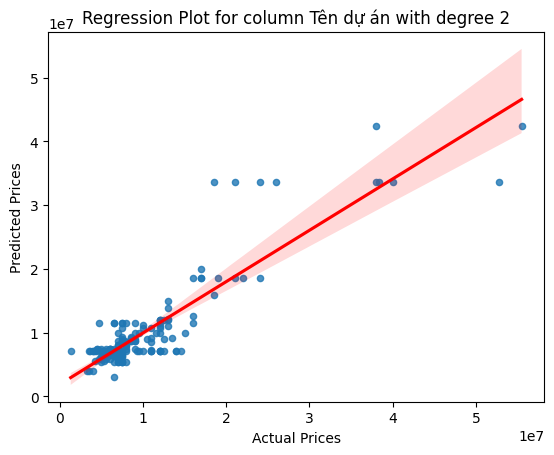

Best degree for column Tên phường: 1
R-squared train score for best degree: 0.7050526179870757
R-squared test score for best degree: 0.7172869263947979


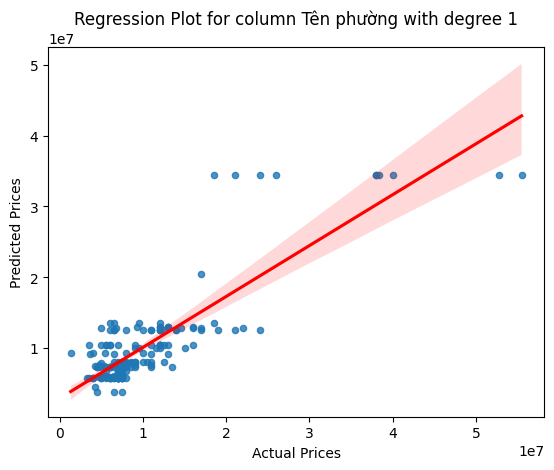

Best degree for column Tình trạng nội thất: 3
R-squared train score for best degree: 0.024832620695478536
R-squared test score for best degree: 0.025061084655558674


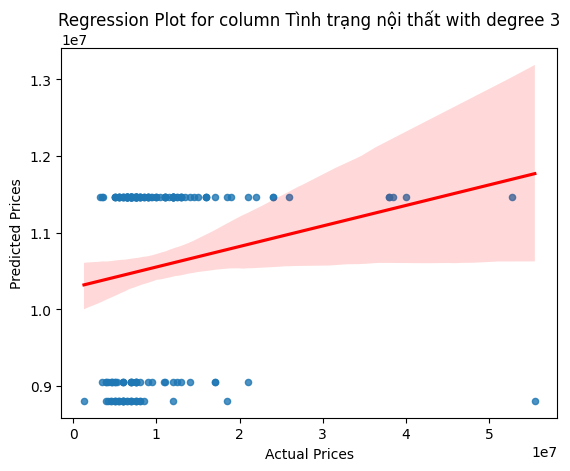

Best degree for column Số phòng vệ sinh: 1
R-squared train score for best degree: 0.13514125866487925
R-squared test score for best degree: 0.08526003702602936


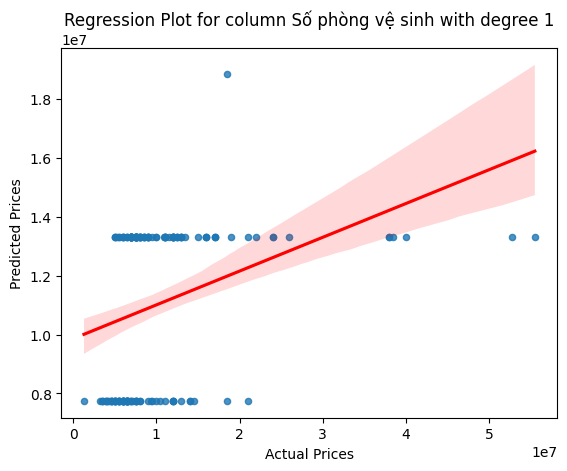

Best degree for column Loại hình căn hộ: 3
R-squared train score for best degree: 0.1085319544800013
R-squared test score for best degree: 0.028086693723269995


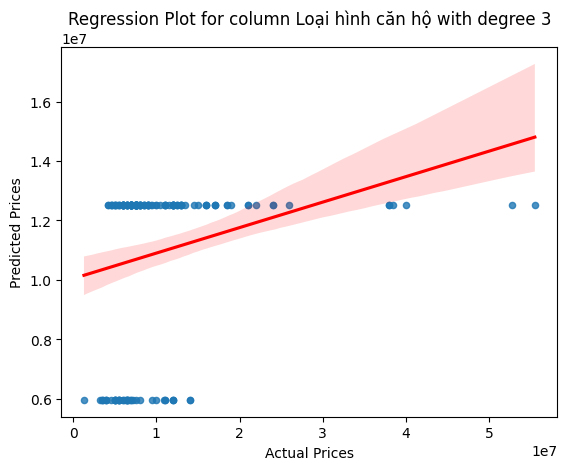

Best degree for column Ban công: 3
R-squared train score for best degree: 0.023439352482128695
R-squared test score for best degree: 0.02603909076705313


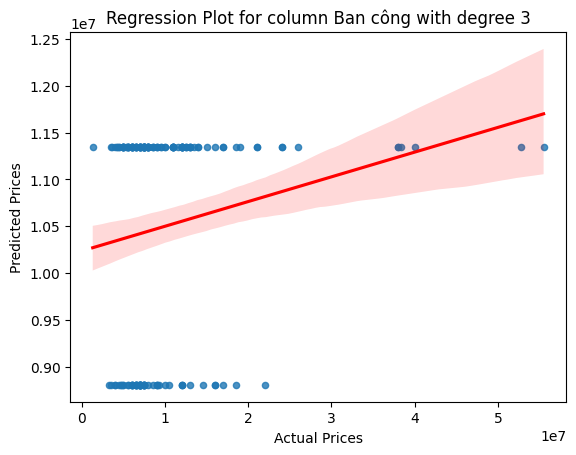

Best degree for column Khu mua sắm: 1
R-squared train score for best degree: 0.01495653258571572
R-squared test score for best degree: 0.0059393622472633245


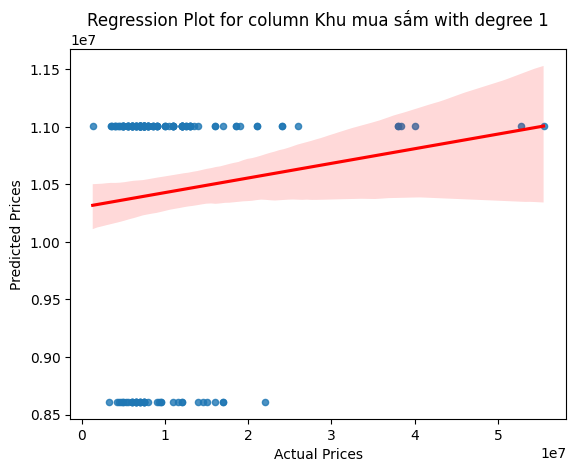

Best degree for column Trường học: 2
R-squared train score for best degree: 0.16436237635703765
R-squared test score for best degree: -0.011316525203449945


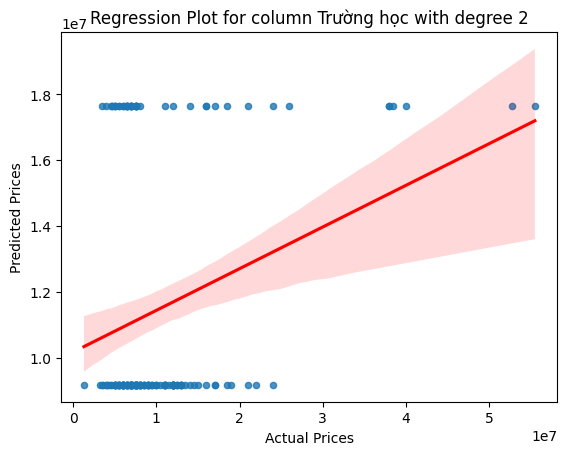

Best degree for column Bệnh viện: 2
R-squared train score for best degree: 0.018565598150017903
R-squared test score for best degree: 0.015548946420918197


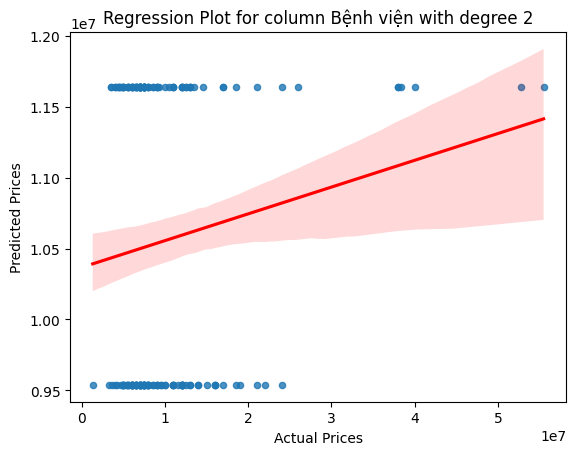

Best degree for column Số ảnh: 1
R-squared train score for best degree: 0.03239032359677052
R-squared test score for best degree: 0.08419982807101178


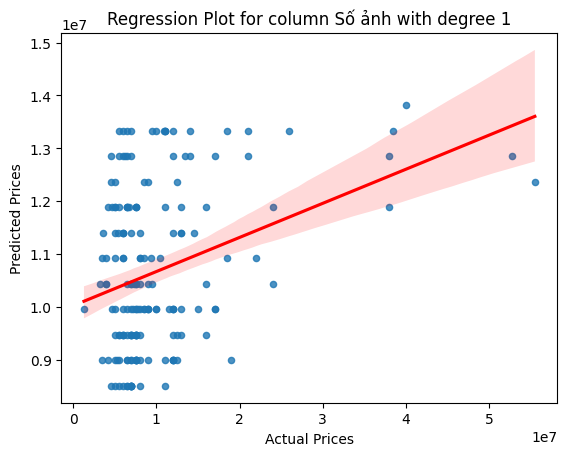

In [ ]:
#Tách X và y từ dataframe
X = df.drop('Giá cho thuê', axis=1)
y = df['Giá cho thuê']

# Tách dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Tạo danh sách các cột kiểu số và phân loại
numeric_features = list(X.select_dtypes(include=['int', 'float']).columns)
categorical_features = list(X.select_dtypes(include=['object','bool']).columns)

# Dùng vòng lặp để huấn luyện mô hình cho từng cột
for column in X.columns:
    if column in numeric_features:
        degrees = range(1, 4)  # Các bậc đa thức để thử nghiệm
        r2_array = []

        for degree in degrees:
            numeric_transformer = Pipeline(steps=[
                ('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))
            ])

            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, [column])
                ]
            )

            model = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('regressor', LinearRegression())
            ])

            # Sử dụng K-fold cross-validation
            cv = KFold(n_splits=5, shuffle=True, random_state=42)
            r2_scores = cross_val_score(model, X[[column]], y, scoring='r2', cv=cv)

            # Lưu trung bình R-squared score của từng fold
            r2_array.append(r2_scores.mean())
        best_degree = degrees[r2_array.index(max(r2_array))]
        print(f'Best degree for column {column}: {best_degree}')

#         Kiểm tra xem degree nào cho R-squared score tốt nhất
#         plt.plot(order, r2_array, label=column)
#         plt.xlabel("order")
#         plt.ylabel("R^2")
#         plt.title("R^2 using test data")
#         plt.text(3,0.75,'Maximum R^2')
#         plt.legend()



        # Sau khi xác định được degree tốt nhất, bạn có thể huấn luyện lại mô hình và vẽ đồ thị
        numeric_transformer = Pipeline(steps=[
            ('scale', StandardScaler()),
            ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, [column])
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

    elif column in categorical_features:
        degrees = range(1, 4)  # Các bậc đa thức để thử nghiệm
        r2_array = []

        for degree in degrees:
            categorical_transformer = Pipeline(steps=[
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))
            ])

            preprocessor = ColumnTransformer(
                transformers=[
                    ('cat', categorical_transformer, [column])
                ]
            )

            model = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('regressor', LinearRegression())
            ])

            # Sử dụng K-fold cross-validation
            cv = KFold(n_splits=5, shuffle=True, random_state=42)
            r2_scores = cross_val_score(model, X[[column]], y, scoring='r2', cv=cv)

            # Lưu trung bình R-squared score của từng fold
            r2_array.append(r2_scores.mean())

        best_degree = degrees[r2_array.index(max(r2_array))]
        print(f'Best degree for column {column}: {best_degree}')

        # Sau khi xác định được degree tốt nhất, bạn có thể huấn luyện lại mô hình và vẽ đồ thị
        categorical_transformer = Pipeline(steps=[
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
            ])

        preprocessor = ColumnTransformer(
            transformers=[('cat', categorical_transformer, [column])])

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())])

    model.fit(X_train[[column]], y_train)
    y_train_pred = model.predict(X_train[[column]])
    y_test_pred = model.predict(X_test[[column]])

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R-squared train score for best degree: {r2_train}')
    print(f'R-squared test score for best degree: {r2_test}')


    sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})
    plt.title(f'Regression Plot for column {column} with degree {best_degree}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.show()

#         residuals = y_train - y_train_pred
#         sns.residplot(x=y_train_pred, y=residuals, scatter_kws={'s': 20})
#         plt.title(f'Residual Plot for column {column} with degree {best_degree}')
#         plt.xlabel('Predicted Prices')
#         plt.ylabel('Residuals')
#         plt.show()
#         sns.distplot(y_train, hist=False, color='r', label='Actual Value')
#         sns.distplot(y_train_pred, hist=False, color='b', label='Predicted Value')

## Mô hình 2 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Tên dự án"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 1)
Best test R-squared score: 0.8414311671572163
R-squared score on train set: 0.9026
Mean Squared Error (MSE) on test set: 9112866897451.4902
R-squared score on test set: 0.8492


<ipython-input-70-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-70-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

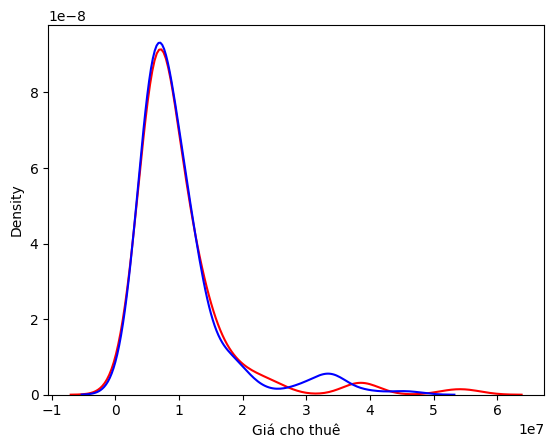

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

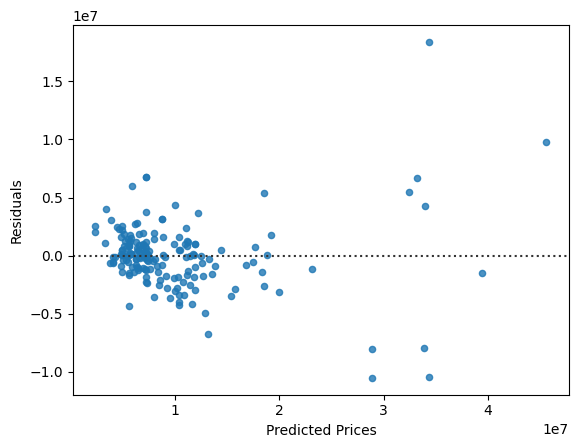

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 3 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Tên dự án"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", 'Số phòng ngủ']
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 2)
Best test R-squared score: 0.8396754105613347
R-squared score on train set: 0.9030
Mean Squared Error (MSE) on test set: 9285389857202.8887
R-squared score on test set: 0.8464


<ipython-input-74-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-74-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

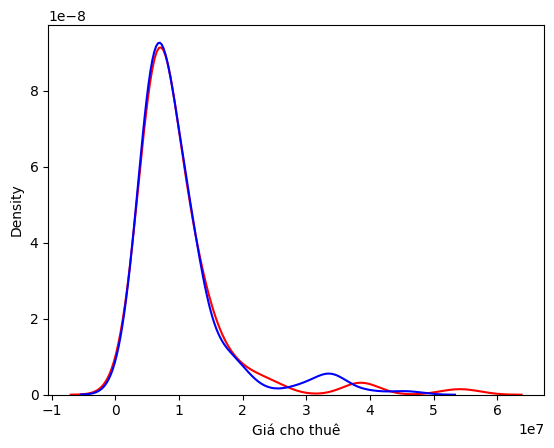

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

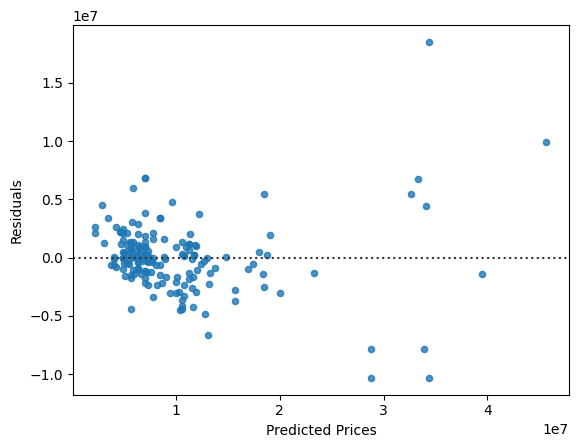

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 4 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Tên dự án", "Tình trạng nội thất"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", 'Số phòng ngủ']
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 3)
Best test R-squared score: 0.852171045317942
R-squared score on train set: 0.9329
Mean Squared Error (MSE) on test set: 8714785140066.8115
R-squared score on test set: 0.8558


<ipython-input-78-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-78-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

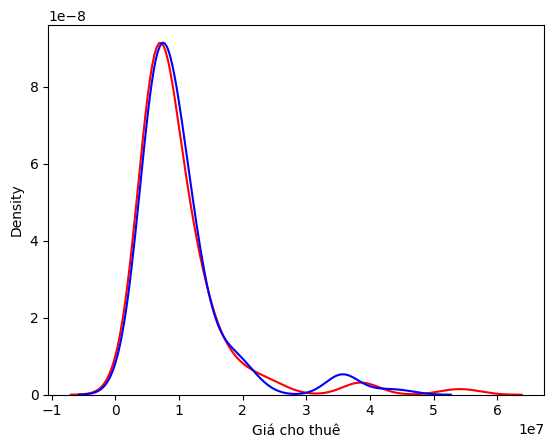

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

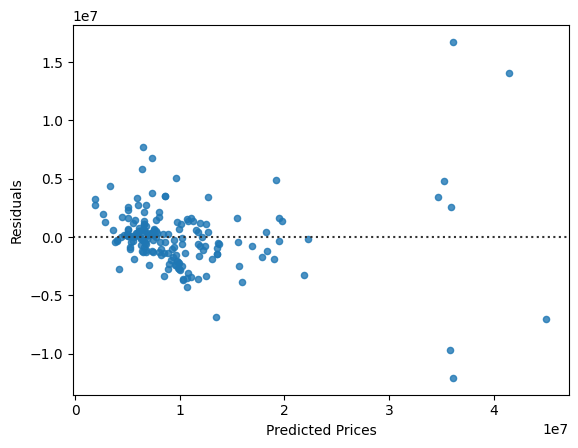

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 5 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 3)
Best test R-squared score: 0.8522227164279629
R-squared score on train set: 0.9332
Mean Squared Error (MSE) on test set: 8711895279648.1328
R-squared score on test set: 0.8559


<ipython-input-82-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-82-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

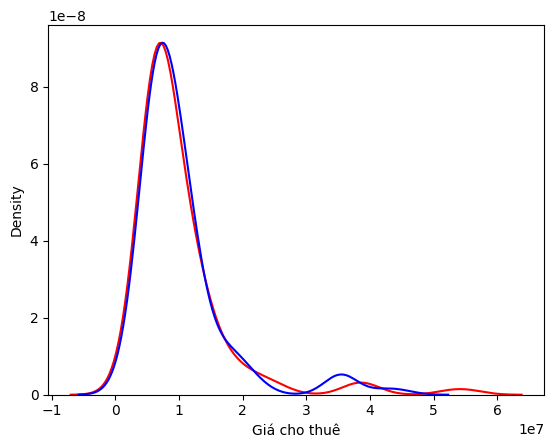

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

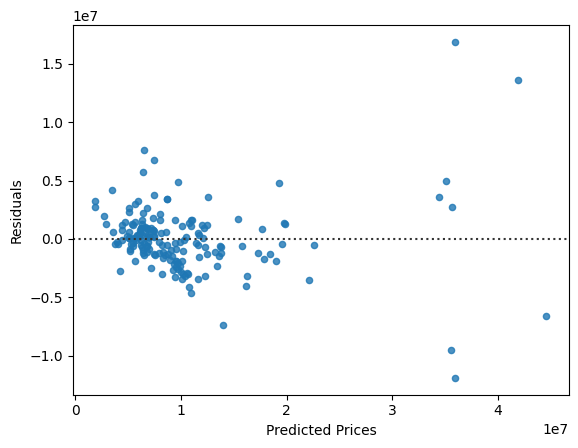

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 6 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất", "Tên phường"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        modelx = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(modelx, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 3)
Best test R-squared score: 0.8734757329674852
R-squared score on train set: 0.9470
Mean Squared Error (MSE) on test set: 8057193519873.6973
R-squared score on test set: 0.8667


<ipython-input-170-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-170-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

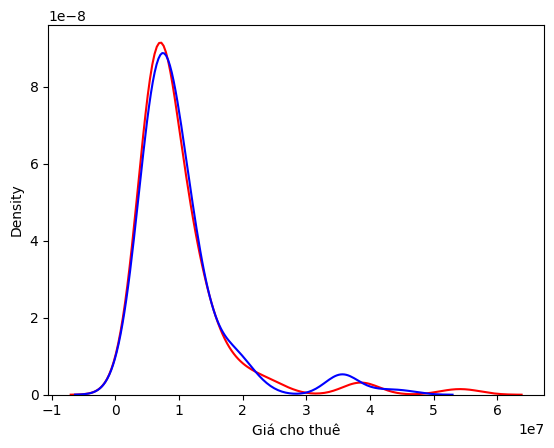

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

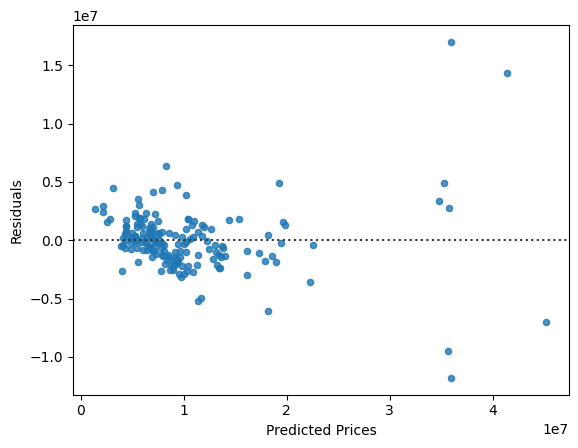

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 7 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường", "Loại hình căn hộ"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất", "Tên phường", "Loại hình căn hộ"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 3)
Best test R-squared score: 0.8692990990290864
R-squared score on train set: 0.9493
Mean Squared Error (MSE) on test set: 8195796509005.3115
R-squared score on test set: 0.8644


<ipython-input-90-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-90-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

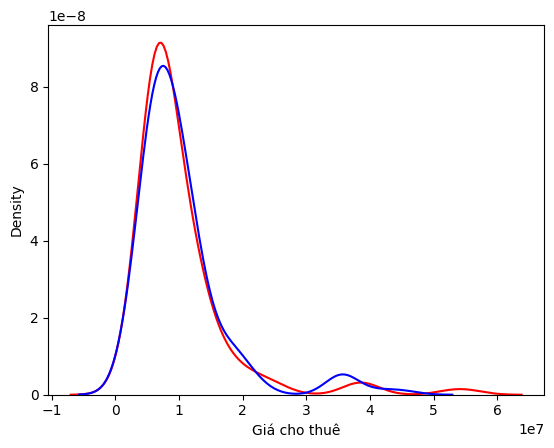

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

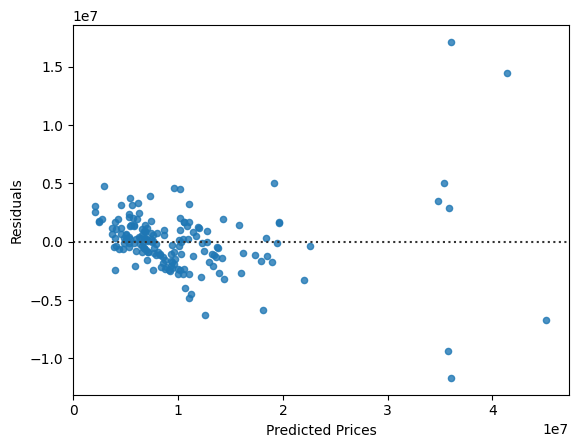

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 8 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường", "Loại hình căn hộ", "Số ảnh"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Số ảnh"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất", "Tên phường", "Loại hình căn hộ"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 3)
Best test R-squared score: 0.8676970458679362
R-squared score on train set: 0.9494
Mean Squared Error (MSE) on test set: 8256937259440.7510
R-squared score on test set: 0.8634


<ipython-input-94-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-94-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

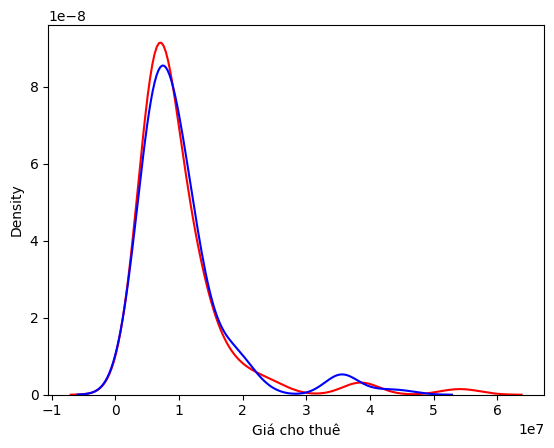

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

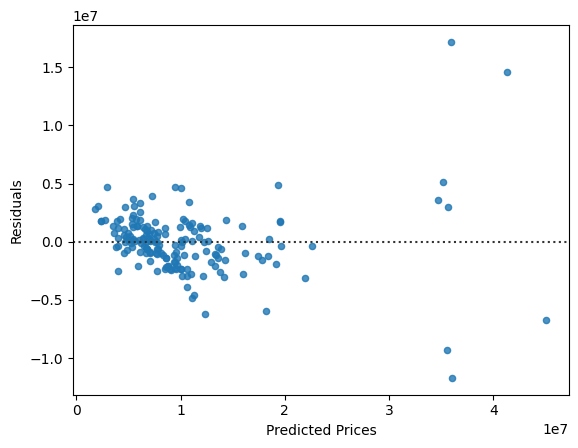

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 9 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường", "Loại hình căn hộ", "Số ảnh", "Số tầng"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh","Số tầng", "Số ảnh"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất","Tên phường","Loại hình căn hộ"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 3)
Best test R-squared score: 0.8672115872686914
R-squared score on train set: 0.9494
Mean Squared Error (MSE) on test set: 8290450178431.0625
R-squared score on test set: 0.8628


<ipython-input-98-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-98-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

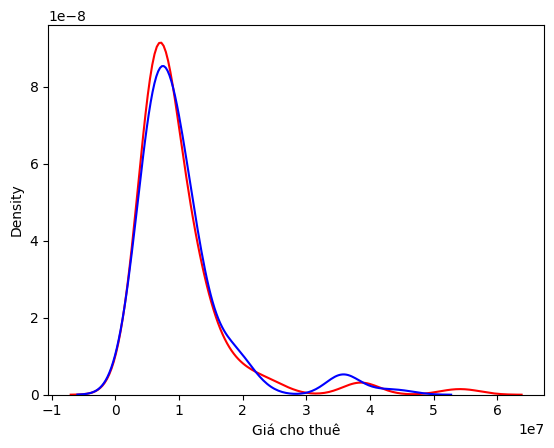

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

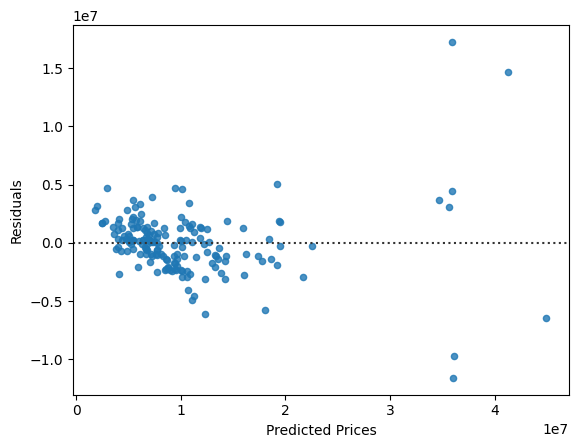

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 10 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường", "Loại hình căn hộ", "Số ảnh", "Số tầng", "Bệnh viện"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh","Số tầng", "Số ảnh"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất","Tên phường","Loại hình căn hộ", "Bệnh viện"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 1)
Best test R-squared score: 0.8671632108528403
R-squared score on train set: 0.9245
Mean Squared Error (MSE) on test set: 8411705267145.8369
R-squared score on test set: 0.8608


<ipython-input-102-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-102-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

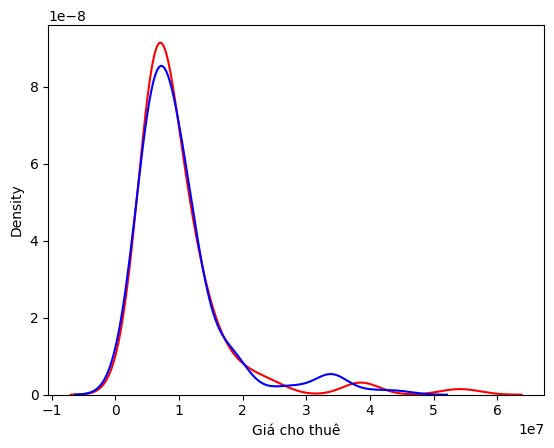

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

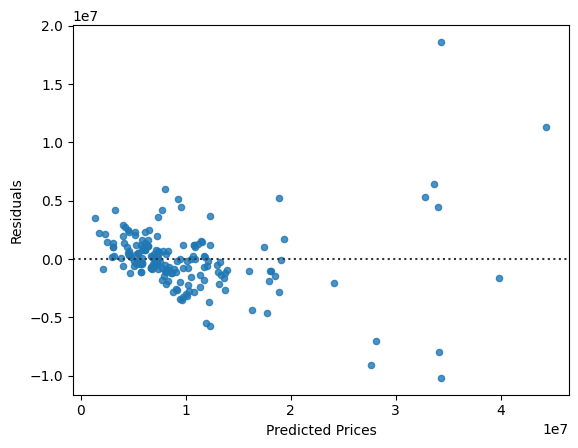

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 11 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường", "Loại hình căn hộ", "Số ảnh", "Số tầng", "Bệnh viện", "Trường học"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh","Số tầng", "Số ảnh"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất","Tên phường","Loại hình căn hộ","Bệnh viện","Trường học"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 1)
Best test R-squared score: 0.8669862557062485
R-squared score on train set: 0.9246
Mean Squared Error (MSE) on test set: 8425554618876.5928
R-squared score on test set: 0.8606


<ipython-input-106-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-106-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

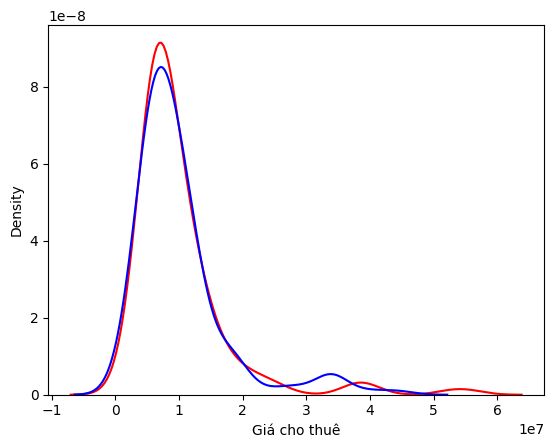

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

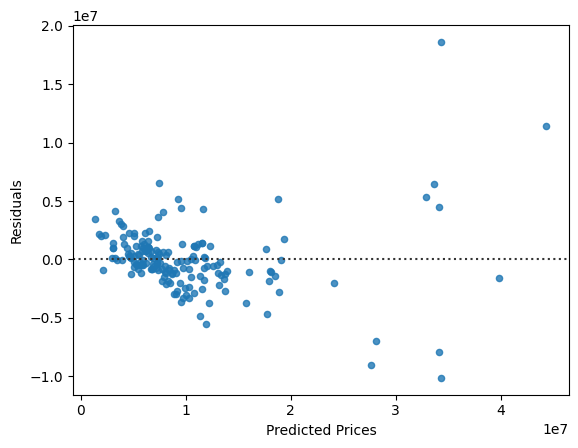

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Mô hình 12 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường", "Loại hình căn hộ", "Số ảnh", "Số tầng", "Bệnh viện", "Trường học","Ban công"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh","Số tầng", "Số ảnh"]
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features = ["Tên dự án","Tình trạng nội thất","Tên phường","Loại hình căn hộ","Ban công","Trường học","Bệnh viện"]
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 1)
Best test R-squared score: 0.8666732258088791
R-squared score on train set: 0.9248
Mean Squared Error (MSE) on test set: 8505639122030.7188
R-squared score on test set: 0.8593


<ipython-input-110-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-110-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

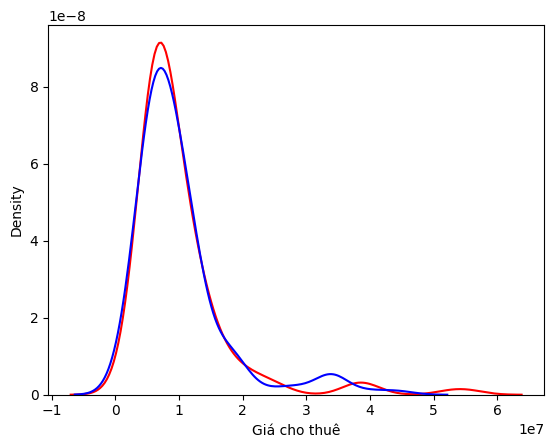

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

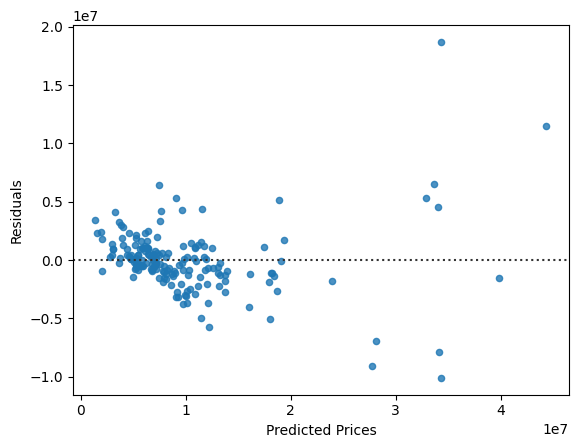

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

#Mô hình 13 biến

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df.drop('Giá cho thuê',axis = 1)
y = df['Giá cho thuê']
# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
# Tạo danh sách các bậc đa thức để thử nghiệm
degrees_to_try = range(1, 4)

# Lưu trữ R-squared scores cho từng bậc đa thức
train_scores = []
test_scores = []
tuple_degree = []
r2_array = []

for degree in degrees_to_try:
    # Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
    numeric_features = ['Diện tích', 'Số phòng ngủ', 'Số tầng', 'Số phòng vệ sinh','Số ảnh']
    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=degree, include_bias=False))])

    for de in degrees_to_try:
        categorical_features =  ['Tên dự án','Tên phường', 'Tình trạng nội thất', 'Loại hình căn hộ','Ban công', 'Khu mua sắm']
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('polynomial', PolynomialFeatures(degree=de, include_bias=False))])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        #Đánh giá Kfold
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        # Lưu trung bình R-squared score của từng fold
        r2_array.append(r2_scores.mean())
        tuple_degree.append((degree, de))

# Tìm vị trí của giá trị tối đa trong mảng test_scores
#best_degree = degrees[r2_array.index(max(r2_array))]
best_model_index = np.argmax(r2_array)

# Lấy bậc đa thức tốt nhất từ tuple_degree ứng với vị trí tối đa
best_degree_tuple = tuple_degree[best_model_index]

# In ra thông tin về mô hình tốt nhất
print(f"Best degree combination: {best_degree_tuple}")
print(f"Best test R-squared score: {r2_array[best_model_index]}")

# Sử dụng bậc đa thức tốt nhất để huấn luyện lại mô hình
best_degree = best_degree_tuple[0]
best_categorical_degree = best_degree_tuple[1]

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=best_degree, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=best_categorical_degree, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập train
score = best_model.score(X_train, y_train)
print(f'R-squared score on train set: {score:.4f}')

# Đánh giá mô hình trên tập kiểm tra
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

score = best_model.score(X_test, y_test)
print(f'R-squared score on test set: {score:.4f}')


Best degree combination: (1, 1)
Best test R-squared score: 0.8656960150015293
R-squared score on train set: 0.9249
Mean Squared Error (MSE) on test set: 8617188074058.9570
R-squared score on test set: 0.8574


<ipython-input-114-818e0402c598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-114-818e0402c598>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')


<Axes: xlabel='Giá cho thuê', ylabel='Density'>

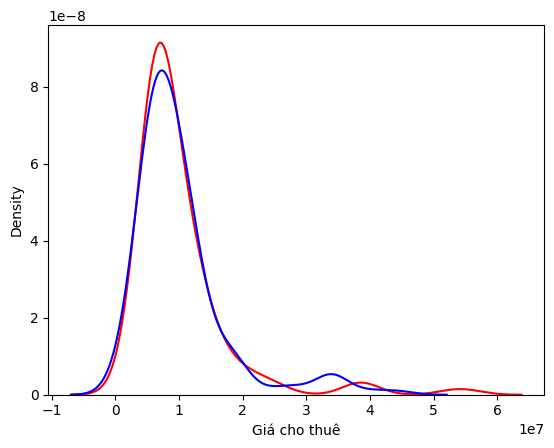

In [ ]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_test_pred, hist=False, color='b', label='Predicted Value')

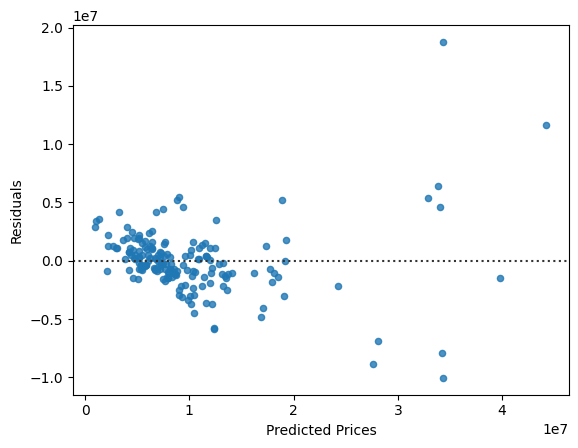

In [ ]:
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, scatter_kws={'s': 20})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường"]]
y = df["Giá cho thuê"]
new_row_data = {'Diện tích': 120, 'Số phòng ngủ': 3, 'Số phòng vệ sinh': 2, 'Tên dự án': 'None', 'Tình trạng nội thất': 'Đầy Đủ', 'Tên phường': 'Hiệp Bình Chánh'}
new_row = pd.DataFrame([new_row_data], columns=X.columns)
X = X.append(new_row, ignore_index=True)
last_row = X.iloc[-1]
print("Last row in X:")
print(last_row)

Last row in X:
Diện tích                          120
Số phòng ngủ                         3
Số phòng vệ sinh                     2
Tên dự án                         None
Tình trạng nội thất             Đầy Đủ
Tên phường             Hiệp Bình Chánh
Name: 582, dtype: object


<ipython-input-201-6df6239fc649>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X.append(new_row, ignore_index=True)


###Dự đoán

In [ ]:
# Tạo Pipeline cho các bước tiền xử lý và mô hình hồi quy tuyến tính
numeric_features = ["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh"]
numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=1, include_bias=False))])

categorical_features = ["Tên dự án","Tình trạng nội thất", "Tên phường"]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=3, include_bias=False))])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]
)
X_transformed = preprocessor.fit_transform(X)

# columns = numeric_features + list(preprocessor.named_transformers_['cat']
#                                   .named_steps['onehot']
#                                   .get_feature_names_out(categorical_features))

last_row = X_transformed[-1, :]

print("Last row of X_transformed:")
print(last_row)

Last row of X_transformed:
  (0, 0)	1.4781016803790135
  (0, 1)	2.021584956049144
  (0, 2)	0.9242631859208575
  (0, 90)	1.0
  (0, 93)	1.0
  (0, 96)	1.0
  (0, 6998)	1.0
  (0, 7001)	1.0
  (0, 7004)	1.0
  (0, 7100)	1.0
  (0, 7103)	1.0
  (0, 7193)	1.0
  (0, 309982)	1.0
  (0, 309985)	1.0
  (0, 309988)	1.0
  (0, 310084)	1.0
  (0, 310087)	1.0
  (0, 310177)	1.0
  (0, 311768)	1.0
  (0, 311771)	1.0
  (0, 311861)	1.0
  (0, 313257)	1.0


In [ ]:
def Xuligiatri(input):
  a=[0]*6
  if input[0] != np.nan:
    a[0]=input[0]
  else:
    a[0]=60
  print(a[0])
  if input[1]!=np.nan:
    a[1]=input[1]
  else:
    a[1]=2

  if input[6]!=np.nan:
    a[2]=input[6]
  else:
    a[2]=2

  if input[3]!=np.nan:
    a[3]=input[3]
  else:
    a[3]="None"

  if input[5]!=np.nan:
    a[4]=input[5]
  else:
    a[4]="Đầy đủ"

  if input[4]!=np.nan:
    a[5]=input[4]
  else:
    a[5]="Hiệp Bình Chánh"

  return a
def tinhgia(Xuligiatri):
      # Chia dữ liệu thành features (X) và target variable (y)
    X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường"]]
    y = df["Giá cho thuê"]

    # Tạo tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Lưu trữ R-squared scores cho từng bậc đa thức

    numeric_transformer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=1, include_bias=False))
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
        ('polynomial', PolynomialFeatures(degree=3, include_bias=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    best_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    best_model.fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # # Đánh giá mô hình trên tập train
    # score = best_model.score(X_train, y_train)
    # print(f'R-squared score on train set: {score:.4f}')

    # # Đánh giá mô hình trên tập kiểm tra
    # mse = mean_squared_error(y_test, y_test_pred)
    # print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

    # score = best_model.score(X_test, y_test)
    # print(f'R-squared score on test set: {score:.4f}')
    new_row = pd.DataFrame([new_row_data], columns=X.columns)
    predictions = best_model.predict(new_row)
    return predictions
input=[np.nan,	2	,np.nan,	'Empire City Thủ Thiêm',	'Thủ Thiêm',	'Đầy Đủ'	,2,	'Chung Cư',	True,	True	,False	,False,	8]
new_row_data = Xuligiatri(input)
#print(tinhgia(new_row_data))
print((new_row_data))

nan
[nan, 2, 2, 'Empire City Thủ Thiêm', 'Đầy Đủ', 'Thủ Thiêm']


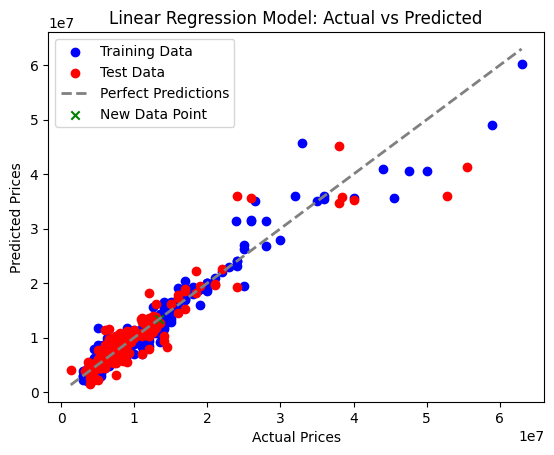

[13430880.05950817]


In [ ]:
# Chia dữ liệu thành features (X) và target variable (y)
X = df[["Diện tích", "Số phòng ngủ", "Số phòng vệ sinh", "Tên dự án","Tình trạng nội thất", "Tên phường"]]
y = df["Giá cho thuê"]

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lưu trữ R-squared scores cho từng bậc đa thức

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=1, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('polynomial', PolynomialFeatures(degree=3, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# # Đánh giá mô hình trên tập train
# score = best_model.score(X_train, y_train)
# print(f'R-squared score on train set: {score:.4f}')

# # Đánh giá mô hình trên tập kiểm tra
# mse = mean_squared_error(y_test, y_test_pred)
# print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')

# score = best_model.score(X_test, y_test)
# print(f'R-squared score on test set: {score:.4f}')
new_row = pd.DataFrame([new_row_data], columns=X.columns)
predictions = best_model.predict(new_row)
# print(predictions)
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
# Scatter plot for test set
plt.scatter(y_test, y_test_pred, color='red', label='Test Data')

# Plotting the diagonal line (perfect predictions)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         linestyle='--', color='gray', linewidth=2, label='Perfect Predictions')
plt.scatter(predictions, predictions, color='green', marker='x', label='New Data Point')
plt.title('Linear Regression Model: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()
print(predictions)